<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Chemical-Equilibrium-Models-(Courtesy-of-Laura-Schaefer)" data-toc-modified-id="Chemical-Equilibrium-Models-(Courtesy-of-Laura-Schaefer)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Chemical Equilibrium Models (Courtesy of Laura Schaefer)</a></span></li><li><span><a href="#ICP-MS-Main-Data-Calibration" data-toc-modified-id="ICP-MS-Main-Data-Calibration-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ICP-MS Main Data Calibration</a></span><ul class="toc-item"><li><span><a href="#Raw-Data-Counts-Normalized-to-Vanadium" data-toc-modified-id="Raw-Data-Counts-Normalized-to-Vanadium-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Raw Data Counts Normalized to Vanadium</a></span></li><li><span><a href="#Calculate-Relative-Differences" data-toc-modified-id="Calculate-Relative-Differences-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Calculate Relative Differences</a></span></li><li><span><a href="#Braukmuller-Comparison" data-toc-modified-id="Braukmuller-Comparison-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Braukmuller Comparison</a></span></li><li><span><a href="#Plot-Results-(No-Uncertainties)" data-toc-modified-id="Plot-Results-(No-Uncertainties)-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Plot Results (No Uncertainties)</a></span></li><li><span><a href="#Raw-Data-Uncertainty-Analysis" data-toc-modified-id="Raw-Data-Uncertainty-Analysis-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Raw Data Uncertainty Analysis</a></span></li><li><span><a href="#Plots-with-Uncertainties" data-toc-modified-id="Plots-with-Uncertainties-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Plots with Uncertainties</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd 
import glob 
import os 
import scipy.integrate as integrate
from scipy.interpolate import interp1d

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
plt.rc("savefig", dpi=300)
plt.rc('figure', dpi=300)
plt.rc('text', usetex=True)
plt.rc('font', size=15)
plt.rc('xtick', direction='in') 
plt.rc('ytick', direction='in')
plt.rc('xtick.major', pad=5) 
plt.rc('xtick.minor', pad=5)
plt.rc('ytick.major', pad=5) 
plt.rc('ytick.minor', pad=5)
plt.rc('lines', dotted_pattern = [0.5, 1.1])

font={'weight':'bold',
     'size': 15}
matplotlib.rc('font', **font)
plt.rcParams["figure.figsize"] = (7,5)

## Load Data

In [2]:
#ICPMS Data:
datafile = '/Users/maggiethompson/Desktop/UCSantaCruz/1stYearProjects/Experiments/HeatingExperiments/Data/ICPMS/210210_MurchisonSteppedHeating_ICPMSData.csv'
                      
RawData = pd.read_csv(datafile, skiprows=1, names=['Sample', 'Isotope', 'unit', 'Na23', 'Mg26', 'Al27', 'P31', 'S32', 'Ca43', 'Ti47', 'V51', 'Cr52', 'Mn55', 'Fe57', 'Co59', 'Ni61', 'Zn66', 'In115', 'K39_HR', 'In115_HR'])   

print('Raw Data:', RawData)


Raw Data:                     Sample        Isotope   unit         Na23        Mg26  \
0                  Blank_T  Intensity AVG  [cps]     132961.4      6576.7   
1                    BIR_S  Intensity AVG  [cps]   95330739.0  30615111.9   
2                    WPR_R  Intensity AVG  [cps]    3045944.9  74789536.6   
3                    WMS_Q  Intensity AVG  [cps]    2373671.1   1707192.4   
4                    BCR_P  Intensity AVG  [cps]  139546029.0  10503786.7   
5                   BHVO_O  Intensity AVG  [cps]  269037780.6  57284698.6   
6       Murchison_1000_3_N  Intensity AVG  [cps]     945020.2  30183350.1   
7        Murchison_800_3_M  Intensity AVG  [cps]    3277021.8  26867054.5   
8        Murchison_600_3_L  Intensity AVG  [cps]    4357075.8  34325811.7   
9        Murchison_400_3_K  Intensity AVG  [cps]    2235304.0  17478014.1   
10      Murchison_1000_2_J  Intensity AVG  [cps]    3088991.6  28321135.1   
11       Murchison_800_2_I  Intensity AVG  [cps]    2604986.2  222

In [3]:
#Mass Data:
#Sample Masses (g):
#Standards:
BIR = 8.10E-3
WPR = 5.50E-3
WMS = 7.90E-3
BCR = 5.20E-3
BHVO = 2.29E-2

#Samples:
M_1000_3 = 1.30E-3
M_800_3 = 2.10E-3
M_600_3 = 4.10E-3
M_400_3 = 2.30E-3

M_1000_2 = 4.10E-3
M_800_2 = 2.80E-3
M_600_2 = 3.00E-3
M_400_2 = 4.50E-3

M_1000_1 = 4.00E-3
M_800_1 = 3.90E-3
M_600_1 = 4.70E-3
M_400_1 = 4.50E-3

M_UH_2 = 7.10E-3
M_UH_1 = 6.30E-3

Mass_arr = [M_1000_3, M_800_3, M_600_3, M_400_3, M_1000_2, M_800_2, M_600_2, M_400_2, M_1000_1, M_800_1, M_600_1, M_400_1, M_UH_2, M_UH_1]

#Empty Beaker Mass (g):
BIR_B = 14.5985
WPR_B = 16.0337 
WMS_B = 15.6417 
BCR_B = 15.1441
BHVO_B = 15.5367

M_1000_3_B = 15.4447
M_800_3_B = 15.5530
M_600_3_B = 14.9515
M_400_3_B = 15.4542

M_1000_2_B = 15.0368
M_800_2_B = 14.7925
M_600_2_B = 15.5552
M_400_2_B = 14.9680

M_1000_1_B = 15.2450
M_800_1_B = 16.9910
M_600_1_B = 15.3346
M_400_1_B = 15.5224

M_UH_1_B = 15.1776
M_UH_2_B = 15.4786

#Total Solution Mass with Beaker (g):
BIR_BS = 19.5803
WPR_BS = 21.0047
WMS_BS = 20.5932
BCR_BS = 20.1236
BHVO_BS = 20.5445

M_1000_3_BS = 20.4193
M_800_3_BS = 20.5285
M_600_3_BS = 19.9264
M_400_3_BS = 20.4159

M_1000_2_BS = 20.0234
M_800_2_BS = 19.7663
M_600_2_BS = 20.5458
M_400_2_BS = 19.9392

M_1000_1_BS = 20.2266
M_800_1_BS = 21.9662
M_600_1_BS = 20.3114
M_400_1_BS = 20.5009

M_UH_2_BS = 20.4782
M_UH_1_BS = 20.1548

#Total Solution Mass (g):
BIR_S = BIR_BS - BIR_B
WPR_S = WPR_BS - WPR_B
WMS_S = WMS_BS - WMS_B
BCR_S = BCR_BS - BCR_B
BHVO_S = BHVO_BS - BHVO_B

M_1000_3_S = M_1000_3_BS - M_1000_3_B
M_800_3_S = M_800_3_BS - M_800_3_B
M_600_3_S = M_600_3_BS - M_600_3_B
M_400_3_S = M_400_3_BS - M_400_3_B

M_1000_2_S = M_1000_2_BS - M_1000_2_B
M_800_2_S = M_800_2_BS - M_800_2_B
M_600_2_S = M_600_2_BS - M_600_2_B
M_400_2_S = M_400_2_BS - M_400_2_B

M_1000_1_S = M_1000_1_BS - M_1000_1_B
M_800_1_S = M_800_1_BS - M_800_1_B
M_600_1_S = M_600_1_BS - M_600_1_B
M_400_1_S = M_400_1_BS - M_400_1_B

M_UH_2_S = M_UH_2_BS - M_UH_2_B
M_UH_1_S = M_UH_1_BS - M_UH_1_B

SolnMass_arr = [M_1000_3_S, M_800_3_S, M_600_3_S, M_400_3_S, M_1000_2_S, M_800_2_S, M_600_2_S, M_400_2_S, M_1000_1_S, M_800_1_S, M_600_1_S, M_400_1_S, M_UH_2_S, M_UH_1_S]


#Internal Spike Mass:
BIR_Int = 9.80E-2
WPR_Int = 9.44E-2
WMS_Int = 9.75E-2
BCR_Int = 9.73E-2
BHVO_Int = 9.59E-2

M_1000_3_Int = 9.19E-2
M_800_3_Int = 9.27E-2
M_600_3_Int = 9.78E-2
M_400_3_Int = 9.81E-2

M_1000_2_Int = 9.90E-2
M_800_2_Int = 9.64E-2
M_600_2_Int = 9.82E-2
M_400_2_Int = 9.94E-2

M_1000_1_Int = 9.88E-2
M_800_1_Int = 9.79E-2
M_600_1_Int = 9.92E-2
M_400_1_Int = 9.82E-2

M_UH_2_Int = 9.87E-2
M_UH_1_Int = 9.60E-2

#Mass of Solution (no internal standard):
BIR_SolnNoInt = 19.4823 - BIR_B
WPR_SolnNoInt = 20.9103 - WPR_B
WMS_SolnNoInt = 20.4957 - WMS_B
BCR_SolnNoInt = 20.0263 - BCR_B
BHVO_SolnNoInt = 20.4486 - BHVO_B

M_1000_3_SolnNoInt = 20.3274 - M_1000_3_B
M_800_3_SolnNoInt = 20.4358 - M_800_3_B
M_600_3_SolnNoInt = 19.8286 - M_600_3_B
M_400_3_SolnNoInt = 20.3178 - M_400_3_B

M_1000_2_SolnNoInt = 19.9244 - M_1000_2_B
M_800_2_SolnNoInt = 19.6699 - M_800_2_B
M_600_2_SolnNoInt = 20.4476 - M_600_2_B
M_400_2_SolnNoInt = 19.8398 - M_400_2_B

M_1000_1_SolnNoInt = 20.1278 - M_1000_1_B
M_800_1_SolnNoInt = 21.8683 - M_800_1_B
M_600_1_SolnNoInt = 20.2122 - M_600_1_B
M_400_1_SolnNoInt = 20.4027 - M_400_1_B

M_UH_2_SolnNoInt = 20.3795 - M_UH_2_B
M_UH_1_SolnNoInt = 20.0588 - M_UH_1_B

#Initial Sample Masses Pre-Degassing: (g)
M_1000_1_Bulk = 5.073E-3 
M_800_1_Bulk = 5.041E-3
M_600_1_Bulk = 5.075E-3
M_400_1_Bulk = 5.001E-3

M_1000_2_Bulk = 5.005E-3
M_800_2_Bulk = 5.077E-3
M_600_2_Bulk = 5.022E-3
M_400_2_Bulk = 5.011E-3

M_1000_3_Bulk = 4.1E-3
M_800_3_Bulk = 4.0E-3
M_600_3_Bulk = 4.9E-3
M_400_3_Bulk = 5.0E-3

#Degassed Mass (g):
M_1000_1_Outgas = 0.885E-3
M_800_1_Outgas = 0.788E-3
M_600_1_Outgas = 0.404E-3
M_400_1_Outgas = 0.201E-3

M_1000_2_Outgas = 0.723E-3
M_800_2_Outgas = 0.557E-3
M_600_2_Outgas = 0.16E-3
M_400_2_Outgas = 0.073E-3

M_1000_3_Outgas = 0.7E-3 
M_800_3_Outgas = 0.5E-3
M_600_3_Outgas = 0.4E-3
M_400_3_Outgas = 0.4E-3

#Mass after degassing (g):
M_1000_1_PostHeat = M_1000_1_Bulk-M_1000_1_Outgas
M_800_1_PostHeat = M_800_1_Bulk-M_800_1_Outgas
M_600_1_PostHeat = M_600_1_Bulk-M_600_1_Outgas
M_400_1_PostHeat = M_400_1_Bulk-M_400_1_Outgas

M_1000_2_PostHeat = M_1000_2_Bulk-M_1000_2_Outgas
M_800_2_PostHeat = M_800_2_Bulk-M_800_2_Outgas
M_600_2_PostHeat = M_600_2_Bulk-M_600_2_Outgas
M_400_2_PostHeat = M_400_2_Bulk-M_400_2_Outgas

M_1000_3_PostHeat = M_1000_3_Bulk-M_1000_3_Outgas
M_800_3_PostHeat = M_800_3_Bulk-M_800_3_Outgas
M_600_3_PostHeat = M_600_3_Bulk-M_600_3_Outgas
M_400_3_PostHeat = M_400_3_Bulk-M_400_3_Outgas

## Chemical Equilibrium Models (Courtesy of Laura Schaefer)

In [5]:
LS_murchison_vac = pd.read_csv('LS_NewModels/Murchison-vacc-Zn-GAS.csv', skiprows=1, names=['T_K', 'P', 'H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'O2', 'H2S','NaOH', 'KH', 'CO2', 'N2', 'Fe', 'H', 'SO2', 'Ni', 'SiO', 'Na', 'OH', 'O', 'SO', 'S2', 'KCl', 'HF', 'NaCl', 'Co', 'K','CrO2', 'FeO', 'Mg', 'Mn', 'PO2', 'PO', 'Ar', 'Zn', 'ZnS', 'ZnOH', 'ZnO'])
LS_murchison_vac['T_C'] = LS_murchison_vac['T_K']-273.15
#print(LS_murchison_vac)

LS_murchison_50air = pd.read_csv('LS_NewModels/Murch-50airZn-GAS.csv', skiprows=1, names=['T_K', 'P', 'H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'O2', 'H2S','NaOH', 'KH', 'CO2', 'N2', 'Fe', 'H', 'SO2', 'Ni', 'SiO', 'Na', 'OH', 'O', 'SO', 'S2', 'KCl', 'HF', 'NaCl', 'Co', 'K','CrO2', 'FeO', 'Mg', 'Mn', 'PO2', 'PO', 'Ar', 'Zn', 'ZnS', 'ZnOH', 'ZnO'])
LS_murchison_50air['T_C'] = LS_murchison_50air['T_K']-273.15
print(LS_murchison_50air)

LS_murchison_100air = pd.read_csv('LS_NewModels/Murch-100airZn-GAS.csv', skiprows=1, names=['T_K', 'P', 'H2', 'C', 'N', 'CH4', 'H2O', 'CO', 'O2', 'H2S','NaOH', 'KH', 'CO2', 'N2', 'Fe', 'H', 'SO2', 'Ni', 'SiO', 'Na', 'OH', 'O', 'SO', 'S2', 'KCl', 'HF', 'NaCl', 'Co', 'K','CrO2', 'FeO', 'Mg', 'Mn', 'PO2', 'PO', 'Ar', 'Zn', 'ZnS', 'ZnOH', 'ZnO'])
LS_murchison_100air['T_C'] = LS_murchison_100air['T_K']-273.15
print(LS_murchison_100air)


     T_K    P            H2             C             N           CH4    H2O  \
0   2000  0.1  7.440000e-04  1.140000e-20  7.040000e-10  9.040000e-20  0.251   
1   1950  0.1  5.150000e-04  2.130000e-21  3.360000e-10  2.780000e-20  0.253   
2   1900  0.1  3.460000e-04  3.550000e-22  1.540000e-10  7.760000e-21  0.253   
3   1850  0.1  2.260000e-04  5.330000e-23  6.800000e-11  1.980000e-21  0.254   
4   1800  0.1  1.440000e-04  7.150000e-24  2.860000e-11  4.610000e-22  0.254   
5   1750  0.1  8.920000e-05  8.520000e-25  1.150000e-11  9.820000e-23  0.255   
6   1700  0.1  5.370000e-05  8.940000e-26  4.350000e-12  1.910000e-23  0.255   
7   1650  0.1  3.130000e-05  8.190000e-27  1.560000e-12  3.360000e-24  0.255   
8   1600  0.1  1.770000e-05  6.480000e-28  5.230000e-13  5.360000e-25  0.255   
9   1550  0.1  9.660000e-06  4.340000e-29  1.640000e-13  7.570000e-26  0.255   
10  1500  0.1  6.470000e-06  3.970000e-30  4.760000e-14  2.520000e-26  0.256   
11  1450  0.1  6.530000e-06  7.380000e-3

In [6]:
print(LS_murchison_vac)

     T_K             P        H2             C             N           CH4  \
0   2000  1.000000e-10  0.000021  6.420000e-14  8.700000e-07  3.910000e-34   
1   1950  1.000000e-10  0.000042  1.200000e-14  4.150000e-07  1.030000e-33   
2   1900  1.000000e-10  0.000087  2.050000e-15  1.910000e-07  2.850000e-33   
3   1850  1.000000e-10  0.000190  3.230000e-16  8.400000e-08  8.470000e-33   
4   1800  1.000000e-10  0.000437  4.680000e-17  3.550000e-08  2.780000e-32   
5   1750  1.000000e-10  0.001100  6.430000e-18  1.450000e-08  1.120000e-31   
6   1700  1.000000e-10  0.002830  8.180000e-19  5.610000e-09  4.860000e-31   
7   1650  1.000000e-10  0.007190  9.720000e-20  2.070000e-09  2.100000e-30   
8   1600  1.000000e-10  0.015400  1.080000e-20  7.340000e-10  6.780000e-30   
9   1550  1.000000e-10  0.021400  1.030000e-21  2.440000e-10  8.850000e-30   
10  1500  1.000000e-10  0.039500  1.990000e-22  9.270000e-11  4.700000e-29   
11  1450  1.000000e-10  0.050800  3.570000e-23  2.840000e-11  1.

In [7]:
def plotlogmolefrac_LS_vac(file, title, title2):
    fig, ax = plt.subplots()
    #plt.plot(file.T_C, np.log10(file.H2O), linewidth=2.0, color='dodgerblue', label=r'H$_2$O')
    #plt.plot(file.T_C, np.log10(file.CO2), linewidth=2.0, color='forestgreen', label=r'CO$_2$')
    #plt.plot(file.T_C, np.log10(file.CO), linewidth=2.0, color='darkorange', label=r'CO')
    #plt.plot(file.T_C, np.log10(file.H2), linewidth=2.0, color='purple', label=r'H$_2$')
    #plt.plot(file.T_C, np.log10(file.H2S), linewidth=2.0, color='deeppink', label=r'H$_2$S')
    #plt.plot(file.T_C, np.log10(file.N2), linewidth=2.0, color='magenta', label=r'N$_2$')
    #plt.plot(file.T_C, np.log10(file.O2), linewidth=2.0, color='gold', label=r'O$_2$')

    plt.plot(file.T_C, np.log10(file.Fe), linewidth=1.0, color='#004949', label=r'Fe')
    plt.plot(file.T_C, np.log10(file.SO2), linewidth=1.0, color='#009292', label=r'SO$_2$')
    plt.plot(file.T_C, np.log10(file.Ni), linewidth=1.0, color='#ff6db6', label=r'Ni')
    #plt.plot(file.T_C, np.log10(file.Na), linewidth=1.0, color='magenta', label=r'Na')
    plt.plot(file.T_C, np.log10(file.SO), linewidth=1.0, color='#490092', label=r'SO')
    plt.plot(file.T_C, np.log10(file.S2), linewidth=1.0, color='#006ddb', label=r'S$_2$')
    #plt.plot(file.T_C, np.log10(file.NaCl), linewidth=1.0, color='#b66dff', label=r'NaCl')
    plt.plot(file.T_C, np.log10(file.Co), linewidth=1.0, color='#6db6ff', label=r'Co')
    plt.plot(file.T_C, np.log10(file.CrO2), linewidth=1.0, color='#b6dbff', label=r'CrO$_2$')
    plt.plot(file.T_C, np.log10(file.FeO), linewidth=1.0, color='#920000', label=r'FeO')
    plt.plot(file.T_C, np.log10(file.Mg), linewidth=1.0, color='#924900', label=r'Mg')
    plt.plot(file.T_C, np.log10(file.Mn), linewidth=1.0, color='#db6d00', label=r'Mn')
    plt.plot(file.T_C, np.log10(file.PO2), linewidth=1.0, color='#24ff24', label=r'PO$_2$')
    plt.plot(file.T_C, np.log10(file.PO), linewidth=1.0, color='gold', label=r'PO')
    plt.plot(file.T_C, np.log10(file.Zn), linewidth=1.0, color='#000000', label=r'Zn')
    #plt.yscale('log')
    ax.tick_params(top=True, right=True)
    plt.ylim(-4, 0)
    plt.xlim(400,1250)
    plt.xlabel(r'Temperature ($^o$C)', fontsize=18)
    plt.ylabel(r'$log_{10}(\chi_{i})$', fontsize=18)
    plt.title(title)
    #plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left', fontsize='small')
    plt.savefig(title2, dpi=1000, bbox_inches='tight')
    plt.show()

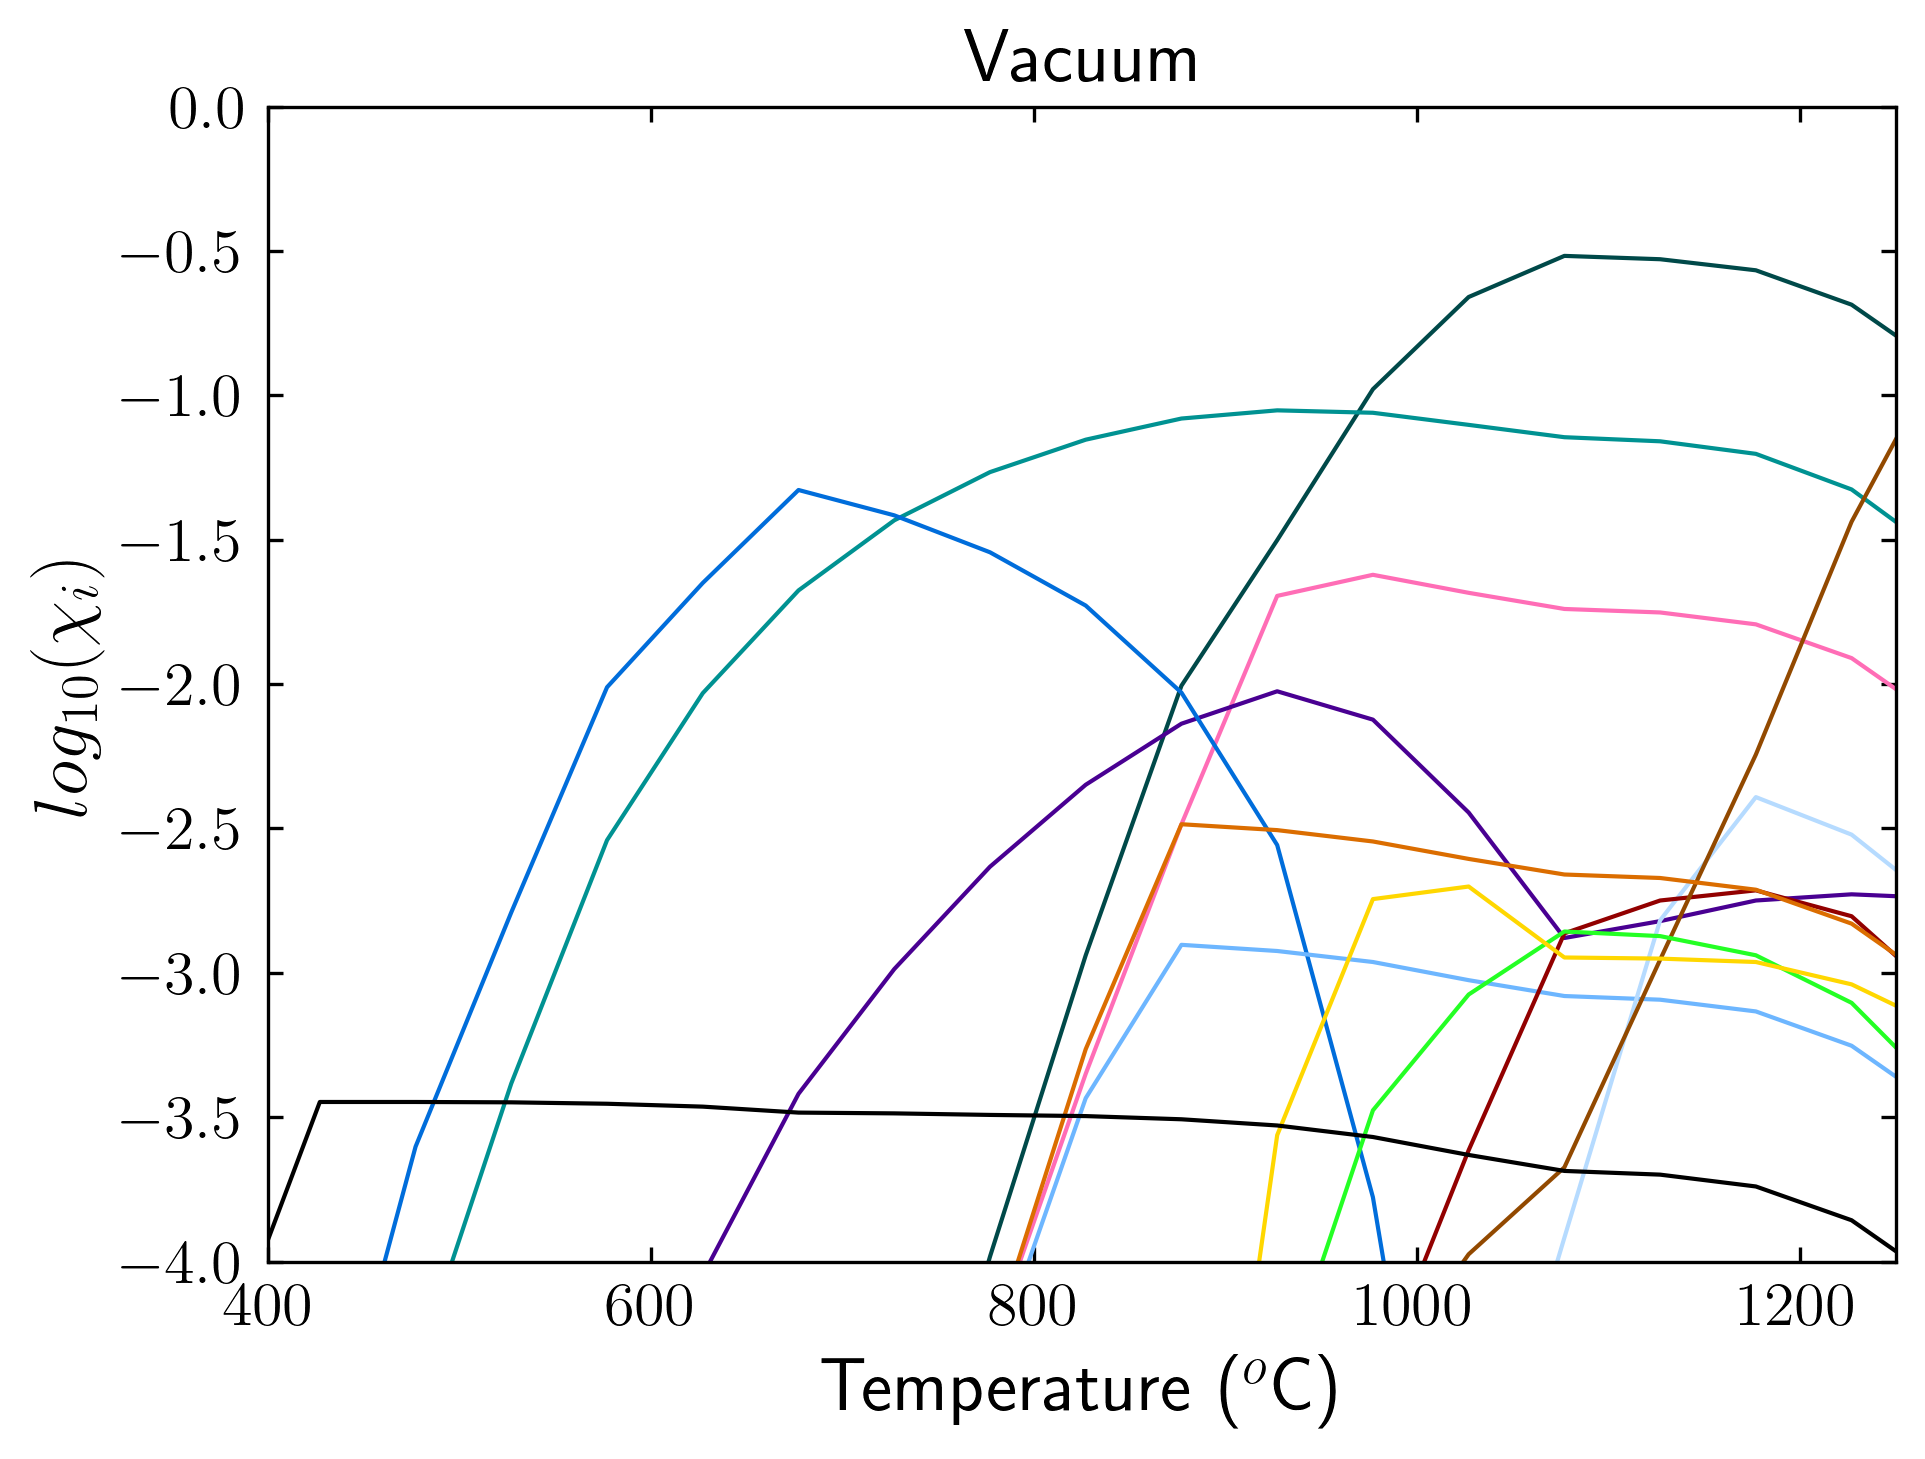

In [8]:
plotlogmolefrac_LS_vac(LS_murchison_vac, 'Vacuum', 'LS_Murch_NewVacc_Update.jpg')

In [9]:
def plotlogmolefrac_LS_air(file, title, title2):
    fig, ax = plt.subplots()
    #plt.plot(file.T_C, np.log10(file.H2), linewidth=0.5, color='lime', label=r'H$_2$')
    #plt.plot(file.T_C, np.log10(file.C), linewidth=0.2, color='orchid', label=r'C')
    #plt.plot(file.T_C, np.log10(file.N), linewidth=0.2, color='navy', label=r'N')
    #plt.plot(file.T_C, np.log10(file.CH4), linewidth=0.5, color='violet', label=r'CH$_4$')
    plt.plot(file.T_C, np.log10(file.H2O), linewidth=1.0, color='dodgerblue', label=r'H$_2$O')
    #plt.plot(file.T_C, np.log10(file.CO), linewidth=0.5, color='darkorange', label=r'CO')
    #plt.plot(file.T_C, np.log10(file.N2), linewidth=0.5, color='magenta', label=r'N$_2$')
    #plt.plot(file.T_C, np.log10(file.O2), linewidth=0.5, color='goldenrod', label=r'O$_2$')
    plt.plot(file.T_C, np.log10(file.H2S), linewidth=1.0, color='deeppink', label=r'H$_2$S')
    #plt.plot(file.T_C, np.log10(file.KH), linewidth=0.2, color='darkviolet', label=r'KH')
    #plt.plot(file.T_C, np.log10(file.NaOH), linewidth=1.0, color='purple', label=r'NaOH')
    #plt.plot(file.T_C, np.log10(file.CO2), linewidth=0.5, color='forestgreen', label=r'CO$_2$')
    plt.plot(file.T_C, np.log10(file.Fe), linewidth=1.0, color='#004949', label=r'Fe')
    #plt.plot(file.T_C, np.log10(file.H), linewidth=0.5, label=r'H')
    plt.plot(file.T_C, np.log10(file.SO2), linewidth=1.0, color='#009292', label=r'SO$_2$')
    plt.plot(file.T_C, np.log10(file.Ni), linewidth=1.0, color='#ff6db6', label=r'Ni')
    #plt.plot(file.T_C, np.log10(file.SiO), linewidth=0.5, label=r'SiO')
    #plt.plot(file.T_C, np.log10(file.Na), linewidth=1.0, color='magenta', label=r'Na')
    #plt.plot(file.T_C, np.log10(file.OH), linewidth=0.2, label=r'OH')
    #plt.plot(file.T_C, np.log10(file.O), linewidth=0.2, label=r'O')
    plt.plot(file.T_C, np.log10(file.SO), linewidth=1.0, color='#490092', label=r'SO')
    plt.plot(file.T_C, np.log10(file.S2), linewidth=1.0, color='#006ddb', label=r'S$_2$')
    #plt.plot(file.T_C, np.log10(file.KCl), linewidth=0.5, label=r'KCl')
    #plt.plot(file.T_C, np.log10(file.HF), linewidth=0.2, label=r'HF')
    #plt.plot(file.T_C, np.log10(file.NaCl), linewidth=1.0, color='#b66dff', label=r'NaCl')
    plt.plot(file.T_C, np.log10(file.Co), linewidth=1.0, color='#6db6ff', label=r'Co')
    #plt.plot(file.T_C, np.log10(file.K), linewidth=0.2, label=r'K')
    plt.plot(file.T_C, np.log10(file.CrO2), linewidth=1.0, color='#b6dbff', label=r'CrO$_2$')
    plt.plot(file.T_C, np.log10(file.FeO), linewidth=1.0, color='#920000', label=r'FeO')
    plt.plot(file.T_C, np.log10(file.Mg), linewidth=1.0, color='#924900', label=r'Mg')
    plt.plot(file.T_C, np.log10(file.Mn), linewidth=1.0, color='#db6d00', label=r'Mn')
    plt.plot(file.T_C, np.log10(file.PO2), linewidth=1.0, color='#24ff24', label=r'PO$_2$')
    plt.plot(file.T_C, np.log10(file.PO), linewidth=1.0, color='gold', label=r'PO')
    #plt.plot(file.T_C, np.log10(file.Ar), linewidth=1.0, label=r'Ar')
    plt.plot(file.T_C, np.log10(file.Zn), linewidth=1.0, color='#000000', label=r'Zn')
    plt.plot(file.T_C, np.log10(file.ZnS), linewidth=1.0, color='violet', label=r'ZnS')
    plt.plot(file.T_C, np.log10(file.ZnOH), linewidth=1.0, color='forestgreen', label=r'ZnOH')
    plt.plot(file.T_C, np.log10(file.ZnO), linewidth=1.0, color='gray', label=r'ZnO')
    #plt.yscale('log')
    ax.tick_params(top=True, right=True)
    plt.ylim(-9, 0)
    plt.xlim(400,1250)
    plt.xlabel(r'Temperature ($^o$C)', fontsize=18)
    plt.ylabel(r'$log_{10}(\chi_{i})$', fontsize=18)
    plt.title(title)
    plt.legend(bbox_to_anchor=(1.05, 1.0, 0.3, 0.2), loc='upper left', fontsize='small')
    plt.savefig(title2, dpi=1000)
    plt.show()

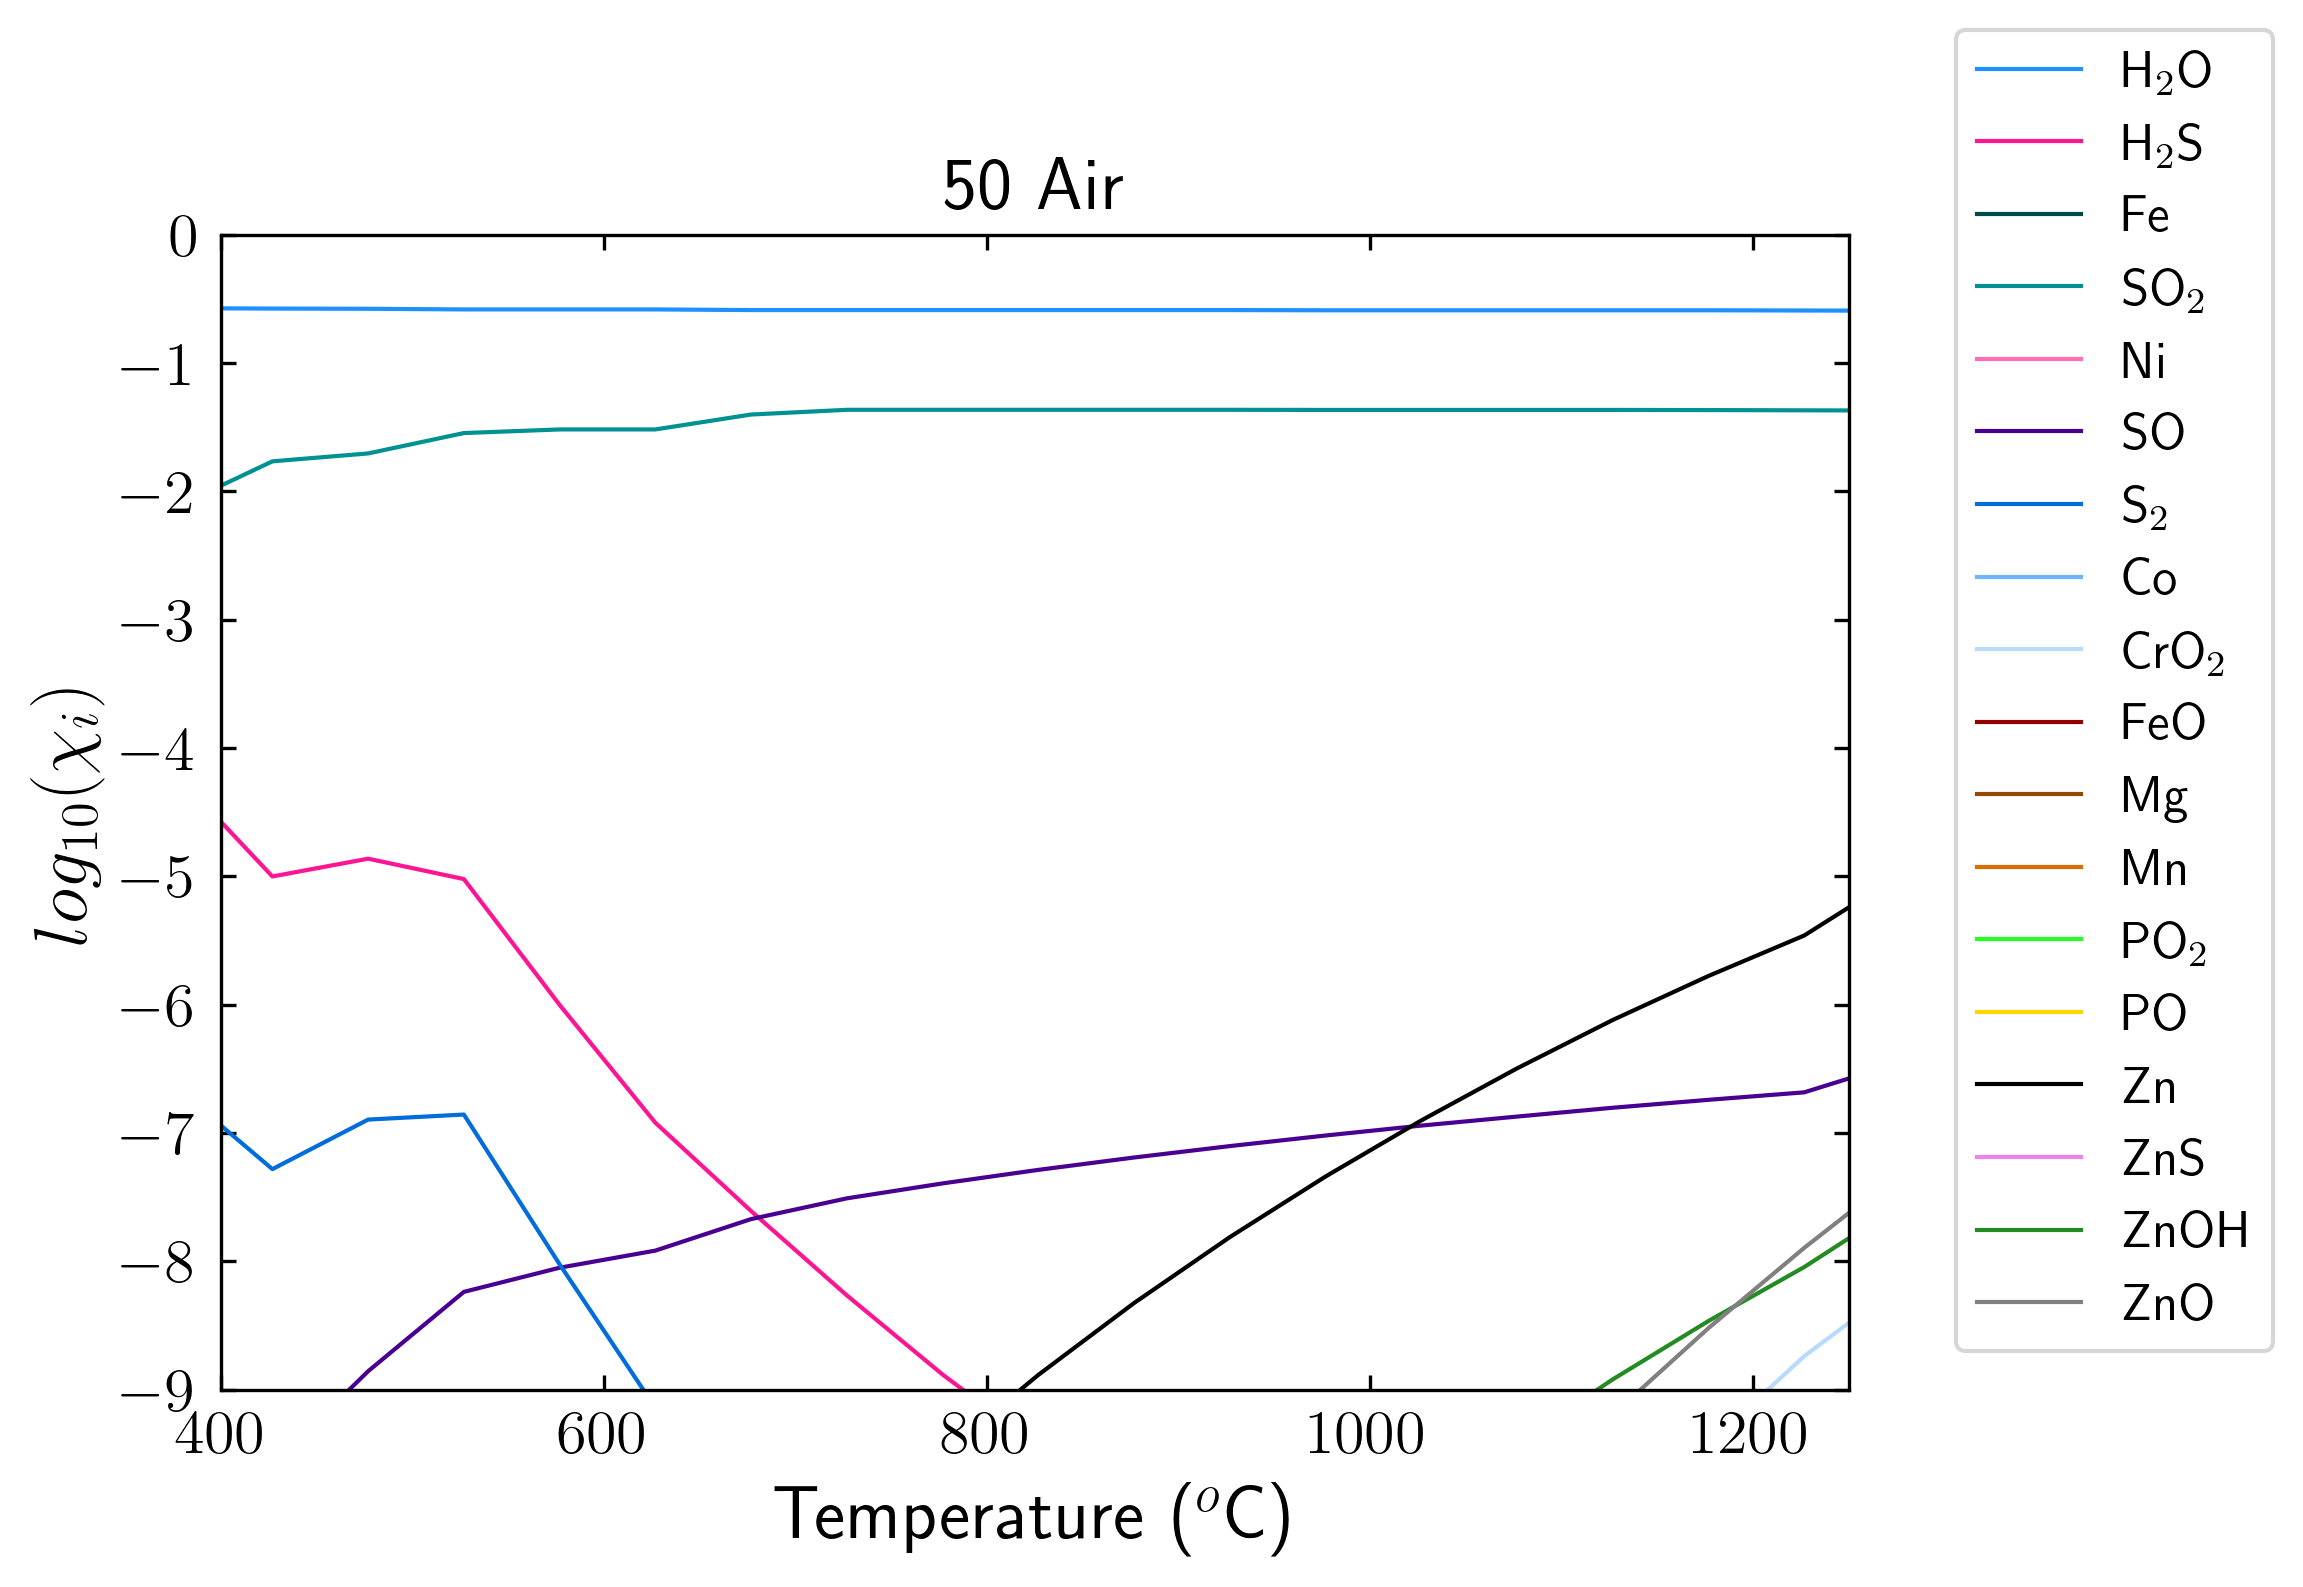

In [10]:
plotlogmolefrac_LS_air(LS_murchison_50air, '50 Air', 'LS_Murch_50Air_update.jpg')

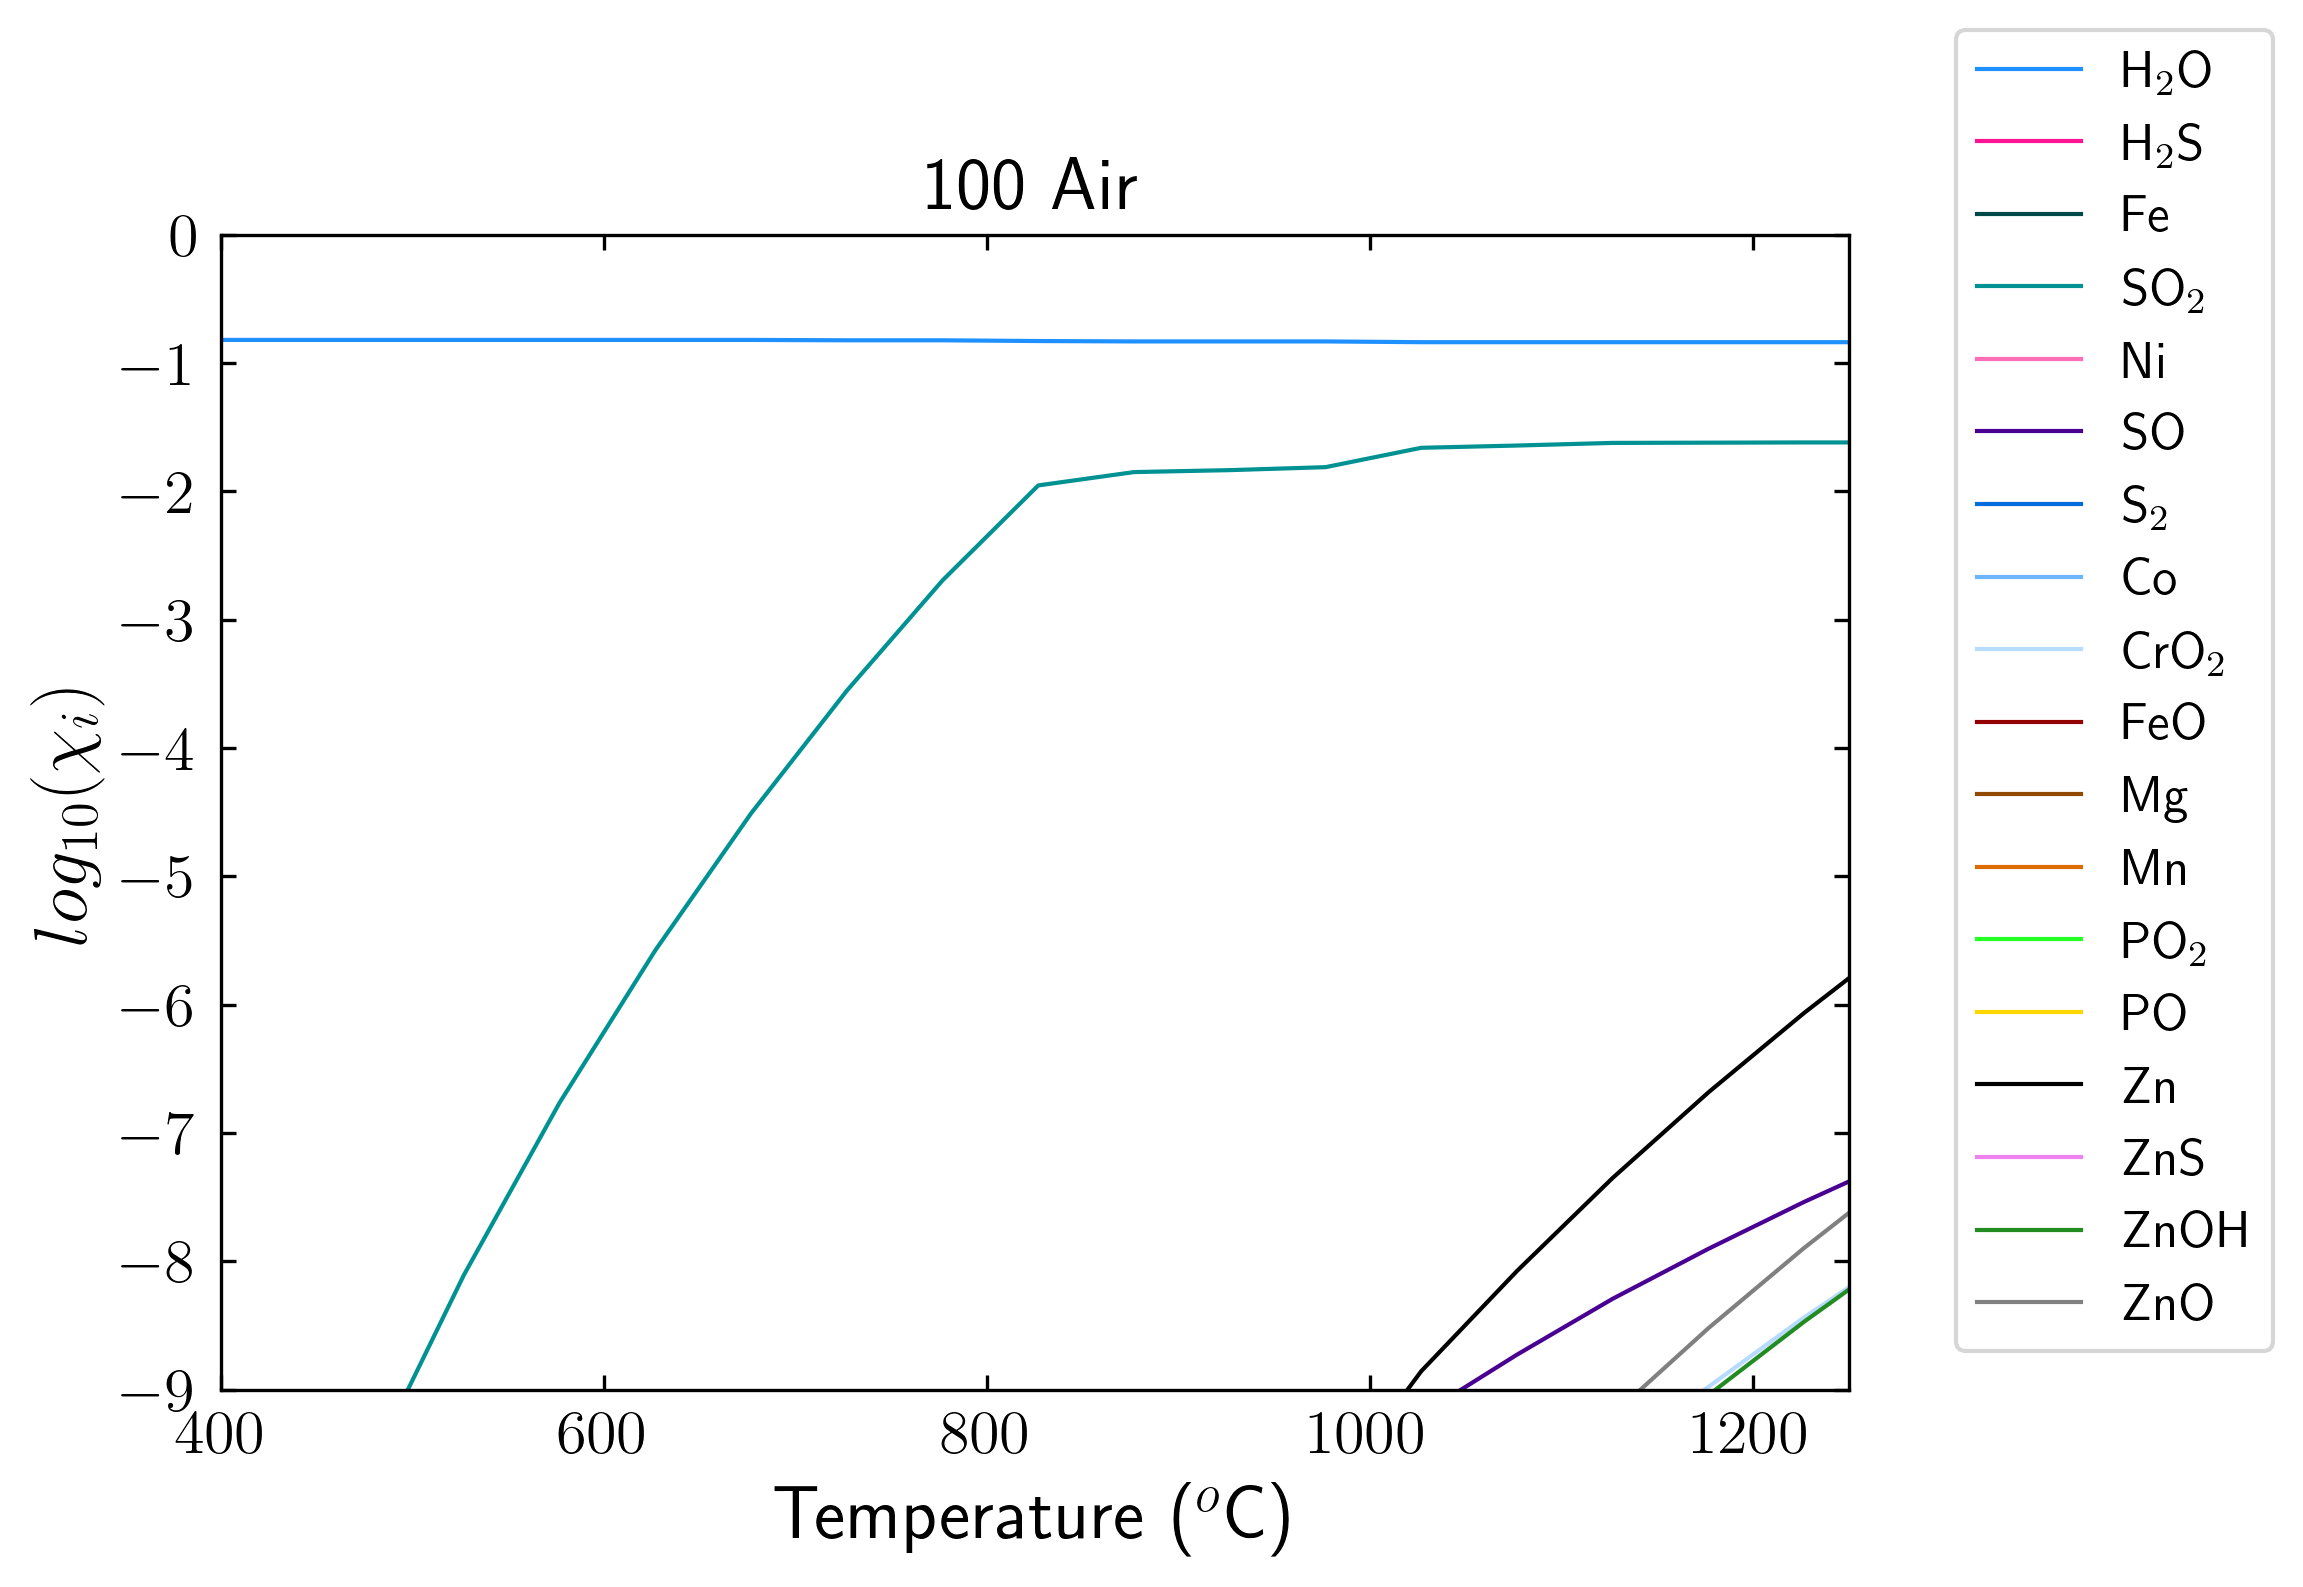

In [11]:
plotlogmolefrac_LS_air(LS_murchison_100air, '100 Air', 'LS_Murch_100Air_update.jpg')

## ICP-MS Main Data Calibration

### Raw Data Counts Normalized to Vanadium

In [13]:
raw_dataframe = raw_df.T
raw_data_Snorm = raw_dataframe.S32/raw_dataframe.V51
raw_data_Znnorm = raw_dataframe.Zn66/raw_dataframe.V51

raw_data_Snorm = raw_data_Snorm
raw_data_Znnorm = raw_data_Znnorm

In [14]:
raw_df_norm_val = []

for i in raw_df:
    norm = (raw_df[i]/raw_df[i]['V51'])
    raw_df_norm_val.append(norm)
raw_df_norm = pd.DataFrame(data=raw_df_norm_val)
raw_df_norm.columns=X

print(raw_df_norm)

                Na23       Mg26        Al27       P31         S32      Ca43  \
Blank     432.535459  21.394600  392.338321  1.263826  365.366949  9.999675   
BIR        24.785780   7.959861  100.885942  0.010605    0.017119  0.598997   
WPR         2.108429  51.769958   83.774572  0.086100    7.361214  0.380991   
WMS         1.666218   1.198378   42.546760  0.040364   91.933657  0.480992   
BCR        32.115190   2.417346   69.807414  0.150030    0.063917  0.256099   
BHVO       27.063413   5.762460   81.864794  0.125604    0.036714  0.530636   
M_1000_3    2.676791  85.495020   77.271174  0.542135    0.461115  0.334363   
M_800_3    10.500196  86.087107   76.259157  0.585873   12.257513  0.333115   
M_600_3    10.743161  84.636516   74.752890  0.578103   17.628715  0.328196   
M_400_3    11.684406  91.361271   80.275648  0.601795   20.237515  0.342517   
M_1000_2    9.353548  85.757148   80.975390  0.596062    0.693857  0.333580   
M_800_2    10.638715  90.864097   78.086407  0.57405

In [15]:
def rawresults_dataframe_atm(data):
    UH_avg = (data['M_UH_1']+data['M_UH_2'])/2.0
    Avg1000 = (data['M_1000_1']+data['M_1000_2'])/2.0
    Avg800 = (data['M_800_1']+data['M_800_2'])/2.0
    Avg600 = (data['M_600_1']+data['M_600_2'])/2.0
    Avg400 = (data['M_400_1']+data['M_400_2'])/2.0
    d = {'UH': UH_avg, '400': Avg400, '600': Avg600, '800': Avg800, '1000':Avg1000}
    Data_Avg = pd.DataFrame(data=d)
    Samples_Data = Data_Avg.T
    return Samples_Data

def rawresults_dataframe_atm_normUH(data):
    UH_avg = (data['M_UH_1']+data['M_UH_2'])/2.0
    Avg1000 = (data['M_1000_1']+data['M_1000_2'])/2.0
    Avg800 = (data['M_800_1']+data['M_800_2'])/2.0
    Avg600 = (data['M_600_1']+data['M_600_2'])/2.0
    Avg400 = (data['M_400_1']+data['M_400_2'])/2.0
    Avg400_UH = Avg400/UH_avg
    Avg600_UH = Avg600/UH_avg
    Avg800_UH = Avg800/UH_avg
    Avg1000_UH = Avg1000/UH_avg
    d = {'400': Avg400_UH, '600': Avg600_UH, '800': Avg800_UH, '1000':Avg1000_UH}
    Data_Avg = pd.DataFrame(data=d)
    Samples_Data = Data_Avg.T
    return Samples_Data

def rawresults_dataframe_vac(data):
    UH_avg = (data['M_UH_1']+data['M_UH_2'])/2.0
    M1000 = data['M_1000_3']
    M800 = data['M_800_3']
    M600 = data['M_600_3']
    M400 = data['M_400_3']
    d = {'UH': UH_avg, '400': M400, '600': M600, '800': M800, '1000':M1000}
    Data_Avg = pd.DataFrame(data=d)
    Samples_Data = Data_Avg.T
    return Samples_Data

def rawresults_dataframe_vac_normUH(data):
    UH_avg = (data['M_UH_1']+data['M_UH_2'])/2.0
    M1000 = data['M_1000_3']
    M800 = data['M_800_3']
    M600 = data['M_600_3']
    M400 = data['M_400_3']
    M400_UH = M400/UH_avg
    M600_UH = M600/UH_avg
    M800_UH = M800/UH_avg
    M1000_UH = M1000/UH_avg
    d = {'400': M400_UH, '600': M600_UH, '800': M800_UH, '1000':M1000_UH}
    Data_Avg = pd.DataFrame(data=d)
    Samples_Data = Data_Avg.T
    return Samples_Data

rawdat_atm = rawresults_dataframe_atm(raw_df)
rawdat_atm = rawdat_atm.T
rawdat_vac = rawresults_dataframe_vac(raw_df)
rawdat_vac = rawdat_vac.T

rawdat_normV_atm = rawresults_dataframe_atm(raw_df_norm.T)
rawdat_normV_vac = rawresults_dataframe_vac(raw_df_norm.T)

rawdat_normVUH_atm = rawresults_dataframe_atm_normUH(raw_df_norm.T)
rawdat_normVUH_vac = rawresults_dataframe_vac_normUH(raw_df_norm.T)
print(rawdat_normV_vac)

           Na23       Mg26       Al27       P31        S32      Ca43  \
UH    15.496338  89.529137  87.400377  0.619142  19.767557  0.351941   
400   11.684406  91.361271  80.275648  0.601795  20.237515  0.342517   
600   10.743161  84.636516  74.752890  0.578103  17.628715  0.328196   
800   10.500196  86.087107  76.259157  0.585873  12.257513  0.333115   
1000   2.676791  85.495020  77.271174  0.542135   0.461115  0.334363   

          Ti47  V51       Cr52       Mn55        Fe57       Co59      Ni61  \
UH    0.753585  1.0  36.649052  25.479110  113.938954  13.737031  2.517623   
400   0.740837  1.0  37.273432  25.198305  109.360464  13.668040  2.671089   
600   0.739808  1.0  36.240106  24.212161  103.831685  13.127067  2.447717   
800   0.744814  1.0  37.084377  24.678042  105.353864  13.436588  2.566384   
1000  0.766638  1.0  37.714971  24.819852  105.055189  13.439251  2.538216   

          Zn66     In115    K39_HR  In115_HR  
UH    0.257762  0.669363  0.137271  0.153518  
400 

In [18]:
X_compare_up = ['V51', 'Ni61', 'Co59', 'Mg26', 'Fe57', 'Cr52', 'P31', 'Mn55', 'Zn66', 'S32']

print(X_compare_up)
rawdat_normVUH_atm_select = rawdat_normVUH_atm[['V51','Ni61','Co59','Mg26','Fe57','Cr52','P31','Mn55','Zn66','S32']]
rawdat_normVUH_vac_select = rawdat_normVUH_vac[['V51','Ni61','Co59','Mg26','Fe57','Cr52','P31','Mn55','Zn66','S32']]
#print(rawdat_normVUH_atm_select)

raw_df_norm_select = raw_df_norm[['V51','Ni61','Co59','Mg26','Fe57','Cr52','P31','Mn55','Zn66','S32']]
print(raw_df_norm_select)

rawdat_normV_atm_select =rawdat_normV_atm[['V51','Ni61','Co59','Mg26','Fe57','Cr52','P31','Mn55','Zn66','S32']]
print(rawdat_normV_atm_select)


['V51', 'Ni61', 'Co59', 'Mg26', 'Fe57', 'Cr52', 'P31', 'Mn55', 'Zn66', 'S32']
          V51      Ni61       Co59       Mg26        Fe57       Cr52  \
Blank     1.0  0.429083   2.552375  21.394600   24.109954  44.760573   
BIR       1.0  0.007350   0.255321   7.959861    7.890507   1.027089   
WPR       1.0  0.422588   2.425214  51.769958   27.519032  18.485218   
WMS       1.0  3.184680  18.034801   1.198378  101.022763   0.617117   
BCR       1.0  0.000443   0.146239   2.417346    7.688887   0.034258   
BHVO      1.0  0.004388   0.198191   5.762460    7.949316   0.758475   
M_1000_3  1.0  2.538216  13.439251  85.495020  105.055189  37.714971   
M_800_3   1.0  2.566384  13.436588  86.087107  105.353864  37.084377   
M_600_3   1.0  2.447717  13.127067  84.636516  103.831685  36.240106   
M_400_3   1.0  2.671089  13.668040  91.361271  109.360464  37.273432   
M_1000_2  1.0  2.519383  13.522963  85.757148  107.345293  37.714906   
M_800_2   1.0  2.462328  12.971422  90.864097  104.417499 

### Calculate Relative Differences

In [19]:


def reldiff(val1, val2): #reldiff = Percent Difference 
    top = np.abs(val1-val2)
    bottom = (val1+val2)/2.0
    #print('average:', bottom)
    reldiff = top/bottom
    return reldiff
#print(rawdat_normV_atm)
UH_reldiff = reldiff(raw_df_norm_select.T['M_UH_1'], raw_df_norm_select.T['M_UH_2'])
print('')
UH_reldiff_2 = reldiff(np.mean(raw_df_norm_select.T['M_UH_1']), np.mean(raw_df_norm_select.T['M_UH_2']))
#print(rawdat_normV_atm_select.loc['UH'])
#print(np.mean(rawdat_normV_atm_select.loc['UH']))
print(UH_reldiff)
print(UH_reldiff_2*100)
print(np.max(UH_reldiff)*100)
print(np.mean(UH_reldiff)*100)


V51     0.000000
Ni61    0.013863
Co59    0.009524
Mg26    0.003793
Fe57    0.002443
Cr52    0.005692
P31     0.014330
Mn55    0.001558
Zn66    0.014560
S32     0.020447
dtype: float64
0.3399137707291939
2.0447264948642534
0.8621080890550202


In [20]:
print(reldiff(rawdat_normVUH_atm.Zn66, 1.0)*100)
#print(rawdat_normVUH_atm.S32 )

400     16.012197
600     12.993635
800     14.051601
1000    15.256497
Name: Zn66, dtype: float64


In [21]:
print(raw_df_norm_select.T['M_UH_1'])
print(np.mean(raw_df_norm_select.T['M_UH_1']))

V51       1.000000
Ni61      2.535073
Co59     13.802443
Mg26     89.698944
Fe57    114.078146
Cr52     36.544743
P31       0.623578
Mn55     25.498959
Zn66      0.259639
S32      19.969653
Name: M_UH_1, dtype: float64
30.401117863077104


In [22]:
print(rawdat_normV_atm['S32']['400']/raw_df_norm['S32']['M_UH_1'])
print(rawdat_normV_atm['S32']['400']/raw_df_norm['S32']['M_UH_2'])
print('')
print(rawdat_normV_atm['Zn66']['400']/raw_df_norm['Zn66']['M_UH_1'])
print(rawdat_normV_atm['Zn66']['400']/raw_df_norm['Zn66']['M_UH_2'])
print('')
print(rawdat_normV_atm['Zn66']['600']/raw_df_norm['Zn66']['M_UH_1'])
print(rawdat_normV_atm['Zn66']['600']/raw_df_norm['Zn66']['M_UH_2'])
print('')
print(rawdat_normV_atm['Zn66']['800']/raw_df_norm['Zn66']['M_UH_1'])
print(rawdat_normV_atm['Zn66']['800']/raw_df_norm['Zn66']['M_UH_2'])
print('')
print(rawdat_normV_atm['Zn66']['1000']/raw_df_norm['Zn66']['M_UH_1'])
print(rawdat_normV_atm['Zn66']['1000']/raw_df_norm['Zn66']['M_UH_2'])


1.0617207725113262
1.0836542987595705

1.1655717080579315
1.1826670568489688

1.130732814507519
1.147317183980321

1.1428146379659188
1.1595762105954421

1.1567429271931817
1.1737087849479841


In [23]:
rawdat_normVUH_vac.to_csv('ICPMS_RawDat_NormVUH_Vac.csv')


In [27]:
X_compare = ['Al27', 'Ti47', 'Ca43', 'V51', 'Ni61', 'Co59', 'Mg26', 'Fe57', 'Cr52', 'P31', 'Mn55', 'Na23', 'Zn66', 'S32']


def reldiff(val1, val2): #reldiff = Percent Difference 
    top = np.abs(val1-val2)
    bottom = (val1+val2)/2.0
    #print('average:', bottom)
    reldiff = top/bottom
    return reldiff

def reldiff_dataframe(data):
    RD_UH = []
    RD_1000 = []
    RD_800 = []
    RD_600 = []
    RD_400 = []
    for i in X_compare:
        UH_reldiff = reldiff(data['M_UH_1'][i], data['M_UH_2'][i])
        Avg1000_reldiff = reldiff(data['M_1000_1'][i], data['M_1000_2'][i])
        Avg800_reldiff = reldiff(data['M_800_1'][i],data['M_800_2'][i])
        Avg600_reldiff = reldiff(data['M_600_1'][i],data['M_600_2'][i])
        Avg400_reldiff = reldiff(data['M_400_1'][i],data['M_400_2'][i])
        RD_UH.append(UH_reldiff)
        RD_1000.append(Avg1000_reldiff)
        RD_800.append(Avg800_reldiff)
        RD_600.append(Avg600_reldiff)
        RD_400.append(Avg400_reldiff)
    d = {'UH': RD_UH, '400': RD_400, '600': RD_600, '800': RD_800, '1000': RD_1000}
    RelDiff = pd.DataFrame(data=d)
    RelDiff.index=X_compare
    Samples_RelDiff = RelDiff.T
    return Samples_RelDiff

In [28]:
RawDat_NormV_RelDiff = reldiff_dataframe(raw_df_norm.T)


In [29]:
print(RawDat_NormV_RelDiff*100)

           Al27      Ti47      Ca43  V51      Ni61      Co59      Mg26  \
UH     3.612027  2.108059  1.684069  0.0  1.386254  0.952353  0.379333   
400   14.377409  2.966318  0.983102  0.0  7.265246  7.418180  0.645249   
600   12.572253  0.160374  3.054638  0.0  4.222928  5.661045  3.666505   
800   16.889648  0.033163  1.627640  0.0  6.947320  8.907287  2.236030   
1000  10.526273  5.196376  1.284666  0.0  6.262622  4.831343  2.797115   

           Fe57      Cr52        P31      Mn55       Na23       Zn66  \
UH     0.244328  0.569231   1.433033  0.155807   1.747075   1.456015   
400   10.364980  5.549297  10.761395  7.490776  18.286655  33.142905   
600    8.641371  3.878459   9.921436  7.418654  20.776513  19.933950   
800   12.524066  5.253582  13.434588  9.272052  16.819377  26.372302   
1000   9.123231  3.060951   8.527842  7.366048   1.447739  15.879227   

            S32  
UH     2.044726  
400    5.401284  
600   14.052617  
800   38.503261  
1000   6.595811  


In [30]:
print(rawdat_normVUH_atm)

          Na23      Mg26      Al27       P31       S32      Ca43      Ti47  \
400   0.638375  1.013198  0.991933  1.011977  1.072575  0.969150  0.984747   
600   0.640570  1.016389  0.981837  0.997623  0.962926  0.973569  0.970601   
800   0.633274  1.003690  0.975841  0.993939  0.308439  0.945077  0.981700   
1000  0.607998  0.971455  0.977959  1.005601  0.033980  0.953956  0.999209   

      V51      Cr52      Mn55      Fe57      Co59      Ni61      Zn66  \
400   1.0  1.030912  1.006746  0.988198  0.989002  1.018879  1.174057   
600   1.0  1.029303  1.009344  0.984341  0.980512  1.024744  1.138965   
800   1.0  1.035544  1.010542  0.977655  0.988281  1.013233  1.151134   
1000  1.0  1.045077  1.015968  0.987160  1.008786  1.033047  1.165164   

         In115    K39_HR  In115_HR  
400   1.416021  1.334215  1.353144  
600   1.657271  1.550797  1.540665  
800   1.599457  1.489720  1.425770  
1000  1.423456  1.308321  1.263412  


In [36]:
def calc_percerr(val1,val2):
    top = np.abs(val2-val1) #val1: accepted/published value; val2: calculated/experimental value
    bottom = val1
    diff = top/bottom
    return(diff*100)

def std(val1, val2, mean):
    s1=(val1-mean)**2
    s2=(val2-mean)**2
    vsum = s1+s2
    STD = np.sqrt(vsum)
    return STD

def ConfidenceInterval95(val1, val2, mean):
    interval = (12.706*std(val1, val2, mean))/(np.sqrt(2.0))
    int_up = mean + interval
    int_down = mean - interval
    return interval
#, int_down, int_up

X_mod = ['Na23', 'Mg26', 'Al27', 'P31', 'S32', 'Ca43', 'Ti47', 'V51', 'Cr52', 'Mn55', 'Fe57', 'Co59', 'Ni61', 'Zn66']

def calc_std(file1, file2):
    collect_std=[]
    for i in X_mod:
        std_dat = std(file1[i], file2[i], (file1[i]+file2[i])/2.0)
        collect_std.append(std_dat)
    Std_df = pd.DataFrame(data=collect_std)
    STD_df=Std_df.T
    STD_df.columns=X_mod
    return(STD_df)

def calc_unc(file1, file2):
    collect_unc = []
    for i in X_mod:
        confidenceint = ConfidenceInterval95(file1[i], file2[i], (file1[i]+file2[i])/2.0)
        collect_unc.append(confidenceint)
    Unc_df = pd.DataFrame(data=collect_unc)
    UNC_df = Unc_df.T
    UNC_df.columns=X_mod
    return(UNC_df)

### Braukmuller Comparison

In [37]:
## Load Braukmuller et al 2018 heating experiment results:

B_O2_400 = {'Na23': [942], 'Mg26': [124638], 'Al27': [12805], 'P31': [1116], 'Ca43': [12481], 'Ti47': [611], 'V51': [74.3], 'Cr52':[3500], 'Mn55': [1957], 'Fe57':[239744], 'Co59':[627], 'Zn66':[201], 'Ni61': [14109], 'S32':[26659] }
df_B_O2_400 = pd.DataFrame(data=B_O2_400)

B_Ar_400 = {'Na23': [957], 'Mg26': [135975], 'Al27': [12586], 'P31': [1157], 'Ca43': [12647], 'Ti47': [630], 'V51': [76.4], 'Cr52':[3531], 'Mn55': [1984], 'Fe57':[241646], 'Co59':[641], 'Zn66':[203], 'Ni61': [14253], 'S32':[27498] }
df_B_Ar_400 = pd.DataFrame(data=B_Ar_400)

B_O2_600 = {'Na23': [981], 'Mg26': [130679], 'Al27': [8154], 'P31': [1134], 'Ca43': [12713], 'Ti47': [619], 'V51': [76.3], 'Cr52':[3579], 'Mn55': [2009], 'Fe57':[241974], 'Co59':[640], 'Zn66':[202], 'Ni61': [14366], 'S32':[24890] }
df_B_O2_600 = pd.DataFrame(data=B_O2_600)

B_Ar_600 = {'Na23': [1008], 'Mg26': [142288], 'Al27': [10882], 'P31': [1178], 'Ca43': [13351], 'Ti47': [645], 'V51': [79.5], 'Cr52':[3697], 'Mn55': [2106], 'Fe57':[254361], 'Co59':[666], 'Zn66':[211], 'Ni61': [14914], 'S32':[25868] }
df_B_Ar_600 = pd.DataFrame(data=B_Ar_600)

B_O2_800 = {'Na23': [996], 'Mg26': [136321], 'Al27': [13461], 'P31': [1189], 'Ca43': [13062], 'Ti47': [654], 'V51': [79.1], 'Cr52':[3657], 'Mn55': [2020], 'Fe57':[246229], 'Co59':[662], 'Zn66':[208], 'Ni61': [14758], 'S32':[9089] }
df_B_O2_800 = pd.DataFrame(data=B_O2_800)

B_Ar_800 = {'Na23': [1041], 'Mg26': [147386], 'Al27': [12177], 'P31': [1218], 'Ca43': [14121], 'Ti47': [674], 'V51': [81.8], 'Cr52':[3952], 'Mn55': [2218], 'Fe57':[270428], 'Co59':[700], 'Zn66':[135], 'Ni61': [15901], 'S32':[14104] }
df_B_Ar_800 = pd.DataFrame(data=B_Ar_800)

B_O2_1000 = {'Na23': [1058], 'Mg26': [139584], 'Al27': [9496], 'P31': [1188], 'Ca43': [13449], 'Ti47': [661], 'V51': [80.7], 'Cr52':[3797], 'Mn55': [2120], 'Fe57':[252860], 'Co59':[674], 'Zn66':[214], 'Ni61': [15247], 'S32':[2225] }
df_B_O2_1000 = pd.DataFrame(data=B_O2_1000)

B_Ar_1000 = {'Na23': [941], 'Mg26': [144832], 'Al27': [9990], 'P31': [1261], 'Ca43': [13918], 'Ti47': [691], 'V51': [84.9], 'Cr52':[3876], 'Mn55': [2158], 'Fe57':[256946], 'Co59':[705], 'Zn66':[5], 'Ni61': [15664], 'S32':[27691] }
df_B_Ar_1000 = pd.DataFrame(data=B_Ar_1000)


B_BHVO = {'Na23': [14638], 'Mg26': [42960], 'Al27': [67873], 'P31': [1062], 'Ca43': [73752], 'Ti47': [15109], 'V51': [309], 'Cr52':[286], 'Mn55': [1284], 'Fe57':[83902], 'Co59':[44], 'Zn66':[105], 'Ni61': [124], 'S32':[166] }


In [38]:
#Normalize Braukmuller's results to CI and Mg:


def normV_B(file):
    data_norm = []
    for i in X_compare:
        d_norm = file[i][0]/(file['V51'][0])
        data_norm.append(d_norm)
    Norm_Data = pd.DataFrame(data=data_norm)
    Norm_Data.index=X_compare
    Samples_Norm = Norm_Data.T
    return Samples_Norm


def normUH_B(file, UHfile):
    data_norm = []
    for i in X_compare:
        d_norm = file[i][0]/UHfile[i][0]
        data_norm.append(d_norm)
    Norm_Data=pd.DataFrame(data=data_norm)
    Norm_Data.index = X_compare
    Samples_Norm = Norm_Data.T
    return Samples_Norm
    
# Data from Braukmuller for Unheated Murchison:

data_B_Murch = {'Na23': [875], 'Mg26': [121196], 'Al27': [11438], 'P31': [996], 'Ca43': [11759], 'Ti47': [564], 'V51': [68.6], 'Cr52':[3202], 'Mn55': [1761], 'Fe57':[218752], 'Co59':[600], 'Zn66':[192], 'Ni61': [12944], 'S32':[24536] }
df_B_Murch = pd.DataFrame(data=data_B_Murch)


data_B_MurchNC = {'Na23': [871], 'Mg26': [123113], 'Al27': [12091], 'P31': [1108], 'Ca43': [11525], 'Ti47': [579], 'V51': [70.2], 'Cr52':[3300], 'Mn55': [1860], 'Fe57':[226411], 'Co59':[612], 'Zn66':[201], 'Ni61':[13376], 'S32':[26347] }
df_B_MurchNC = pd.DataFrame(data=data_B_MurchNC)

B_Murch_Unc = calc_unc(df_B_Murch, df_B_MurchNC)
B_Murch_Std = calc_std(df_B_Murch, df_B_MurchNC)
df_B_MurchAvg = (df_B_Murch+df_B_MurchNC)/2.0
    
#Normalize B to V:

B_O2_400_normV =normV_B(B_O2_400)
B_O2_600_normV =normV_B(B_O2_600)
B_O2_800_normV =normV_B(B_O2_800)
B_O2_1000_normV =normV_B(B_O2_1000)

B_MurchNC_normV = normV_B(df_B_MurchNC)

B_Ar_400_normV =normV_B(B_Ar_400)
B_Ar_600_normV =normV_B(B_Ar_600)
B_Ar_800_normV =normV_B(B_Ar_800)
B_Ar_1000_normV =normV_B(B_Ar_1000)

#Normalize B to V and UH:

B_O2_400_normVUH =normUH_B(B_O2_400_normV, B_MurchNC_normV)
B_O2_600_normVUH =normUH_B(B_O2_600_normV, B_MurchNC_normV)
B_O2_800_normVUH =normUH_B(B_O2_800_normV, B_MurchNC_normV)
B_O2_1000_normVUH =normUH_B(B_O2_1000_normV, B_MurchNC_normV)

B_Ar_400_normVUH =normUH_B(B_Ar_400_normV, B_MurchNC_normV)
B_Ar_600_normVUH =normUH_B(B_Ar_600_normV, B_MurchNC_normV)
B_Ar_800_normVUH =normUH_B(B_Ar_800_normV, B_MurchNC_normV)
B_Ar_1000_normVUH =normUH_B(B_Ar_1000_normV, B_MurchNC_normV)


In [46]:
B_O2_normV = pd.DataFrame(data=B_MurchNC_normV)
B_O2_normV = B_O2_normV.append(B_O2_400_normV)
B_O2_normV = B_O2_normV.append(B_O2_600_normV)
B_O2_normV = B_O2_normV.append(B_O2_800_normV)
B_O2_normV = B_O2_normV.append(B_O2_1000_normV)
B_O2_normV.index=['UH','400','600','800','1000']
print(B_O2_normV)

B_O2_normVUH = pd.DataFrame(data=B_O2_400_normVUH)
B_O2_normVUH = B_O2_normVUH.append(B_O2_600_normVUH)
B_O2_normVUH = B_O2_normVUH.append(B_O2_800_normVUH)
B_O2_normVUH = B_O2_normVUH.append(B_O2_1000_normVUH)
B_O2_normVUH.index=['400','600','800','1000']
#print(B_O2_normVUH)

B_Ar_normV = pd.DataFrame(data=B_MurchNC_normV)
B_Ar_normV = B_Ar_normV.append(B_Ar_400_normV)
B_Ar_normV = B_Ar_normV.append(B_Ar_600_normV)
B_Ar_normV = B_Ar_normV.append(B_Ar_800_normV)
B_Ar_normV = B_Ar_normV.append(B_Ar_1000_normV)
B_Ar_normV.index=['UH','400','600','800','1000']
#print(B_Ar_normV)

B_Ar_normVUH = pd.DataFrame(data=B_Ar_400_normVUH)
B_Ar_normVUH = B_Ar_normVUH.append(B_Ar_600_normVUH)
B_Ar_normVUH = B_Ar_normVUH.append(B_Ar_800_normVUH)
B_Ar_normVUH = B_Ar_normVUH.append(B_Ar_1000_normVUH)
B_Ar_normVUH.index=['400','600','800','1000']


            Al27      Ti47        Ca43  V51        Ni61      Co59  \
UH    172.236467  8.247863  164.173789  1.0  190.541311  8.717949   
400   172.341857  8.223419  167.981157  1.0  189.892328  8.438762   
600   106.867628  8.112713  166.618611  1.0  188.283093  8.387942   
800   170.176991  8.268015  165.132743  1.0  186.573957  8.369153   
1000  117.670384  8.190830  166.654275  1.0  188.934325  8.351921   

             Mg26         Fe57       Cr52        P31       Mn55       Na23  \
UH    1753.746439  3225.227920  47.008547  15.783476  26.495726  12.407407   
400   1677.496635  3226.702557  47.106326  15.020188  26.339166  12.678331   
600   1712.699869  3171.349934  46.906946  14.862385  26.330275  12.857143   
800   1723.400759  3112.882427  46.232617  15.031606  25.537295  12.591656   
1000  1729.665428  3133.333333  47.050805  14.721190  26.270136  13.110285   

          Zn66         S32  
UH    2.863248  375.313390  
400   2.705249  358.802153  
600   2.647444  326.212320  


/var/folders/48/rykhh41s6ds_xk4143_5pyv00000gn/T/ipykernel_62873/1801969202.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  B_O2_normV = B_O2_normV.append(B_O2_400_normV)
/var/folders/48/rykhh41s6ds_xk4143_5pyv00000gn/T/ipykernel_62873/1801969202.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  B_O2_normV = B_O2_normV.append(B_O2_600_normV)
/var/folders/48/rykhh41s6ds_xk4143_5pyv00000gn/T/ipykernel_62873/1801969202.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  B_O2_normV = B_O2_normV.append(B_O2_800_normV)
/var/folders/48/rykhh41s6ds_xk4143_5pyv00000gn/T/ipykernel_62873/1801969202.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat in

In [47]:
for i in X_compare:
    print(i, B_Ar_normVUH[i]/rawdat_normVUH_vac[i])
    #print(rawdat_normVUH_vac[i])



Al27 400     1.041355
600     0.929184
800     0.990566
1000    0.772731
Name: Al27, dtype: float64
Ti47 400     1.016987
600     1.001992
800     1.010765
1000    0.969998
Name: Ti47, dtype: float64
Ca43 400     1.036044
600     1.096929
800     1.110921
1000    1.051033
Name: Ca43, dtype: float64
V51 400     1.0
600     1.0
800     1.0
1000    1.0
Name: V51, dtype: float64
Ni61 400     0.922839
600     1.012668
800     1.000808
1000    0.960435
Name: Ni61, dtype: float64
Co59 400     0.967246
600     1.005583
800     1.003539
1000    0.973610
Name: Co59, dtype: float64
Mg26 400     0.994492
600     1.079546
800     1.068470
1000    1.018623
Name: Mg26, dtype: float64
Fe57 400     1.021734
600     1.088592
800     1.108561
1000    1.017720
Name: Fe57, dtype: float64
Cr52 400     0.966698
600     1.000412
800     1.015684
1000    0.943731
Name: Cr52, dtype: float64
P31 400     0.987141
600     1.005449
800     0.996961
1000    1.074700
Name: P31, dtype: float64
Mn55 400     0.991027
60

In [49]:
print('Braukmuller O2 Normalized to V:')
print(B_O2_normV)
print('')
print('Braukmuller Ar Normalized to V:')
print(B_Ar_normV)

Braukmuller O2 Normalized to V:
            Al27      Ti47        Ca43  V51        Ni61      Co59  \
UH    172.236467  8.247863  164.173789  1.0  190.541311  8.717949   
400   172.341857  8.223419  167.981157  1.0  189.892328  8.438762   
600   106.867628  8.112713  166.618611  1.0  188.283093  8.387942   
800   170.176991  8.268015  165.132743  1.0  186.573957  8.369153   
1000  117.670384  8.190830  166.654275  1.0  188.934325  8.351921   

             Mg26         Fe57       Cr52        P31       Mn55       Na23  \
UH    1753.746439  3225.227920  47.008547  15.783476  26.495726  12.407407   
400   1677.496635  3226.702557  47.106326  15.020188  26.339166  12.678331   
600   1712.699869  3171.349934  46.906946  14.862385  26.330275  12.857143   
800   1723.400759  3112.882427  46.232617  15.031606  25.537295  12.591656   
1000  1729.665428  3133.333333  47.050805  14.721190  26.270136  13.110285   

          Zn66         S32  
UH    2.863248  375.313390  
400   2.705249  358.802153

In [50]:
print(rawdat_normVUH_atm)
print(rawdat_normVUH_vac)
#print(rawdat_normV_vac)

          Na23      Mg26      Al27       P31       S32      Ca43      Ti47  \
400   0.638375  1.013198  0.991933  1.011977  1.072575  0.969150  0.984747   
600   0.640570  1.016389  0.981837  0.997623  0.962926  0.973569  0.970601   
800   0.633274  1.003690  0.975841  0.993939  0.308439  0.945077  0.981700   
1000  0.607998  0.971455  0.977959  1.005601  0.033980  0.953956  0.999209   

      V51      Cr52      Mn55      Fe57      Co59      Ni61      Zn66  \
400   1.0  1.030912  1.006746  0.988198  0.989002  1.018879  1.174057   
600   1.0  1.029303  1.009344  0.984341  0.980512  1.024744  1.138965   
800   1.0  1.035544  1.010542  0.977655  0.988281  1.013233  1.151134   
1000  1.0  1.045077  1.015968  0.987160  1.008786  1.033047  1.165164   

         In115    K39_HR  In115_HR  
400   1.416021  1.334215  1.353144  
600   1.657271  1.550797  1.540665  
800   1.599457  1.489720  1.425770  
1000  1.423456  1.308321  1.263412  
          Na23      Mg26      Al27       P31       S32    

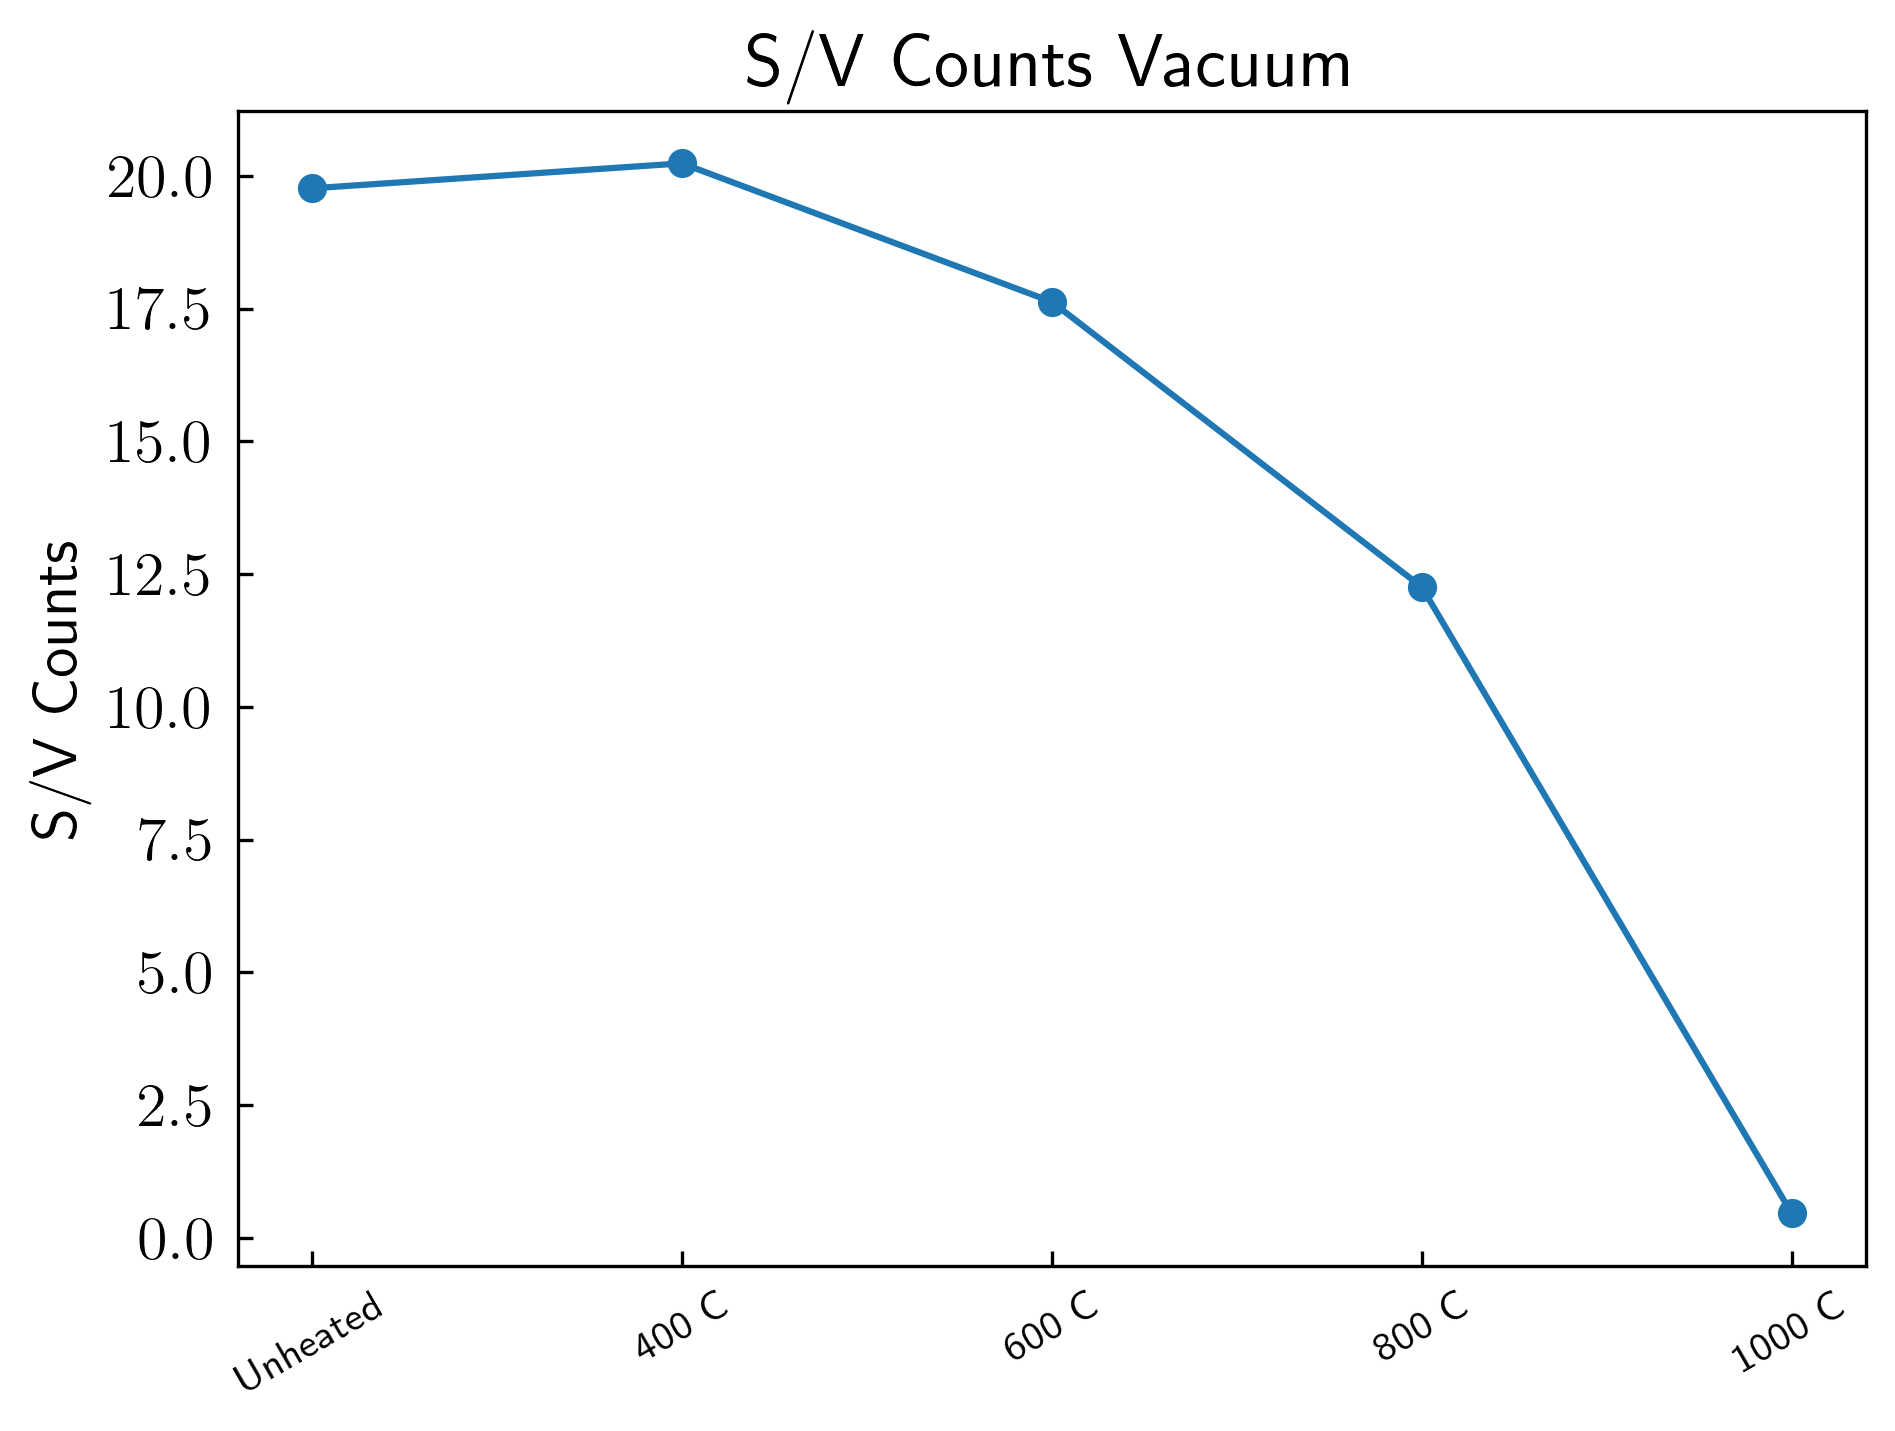

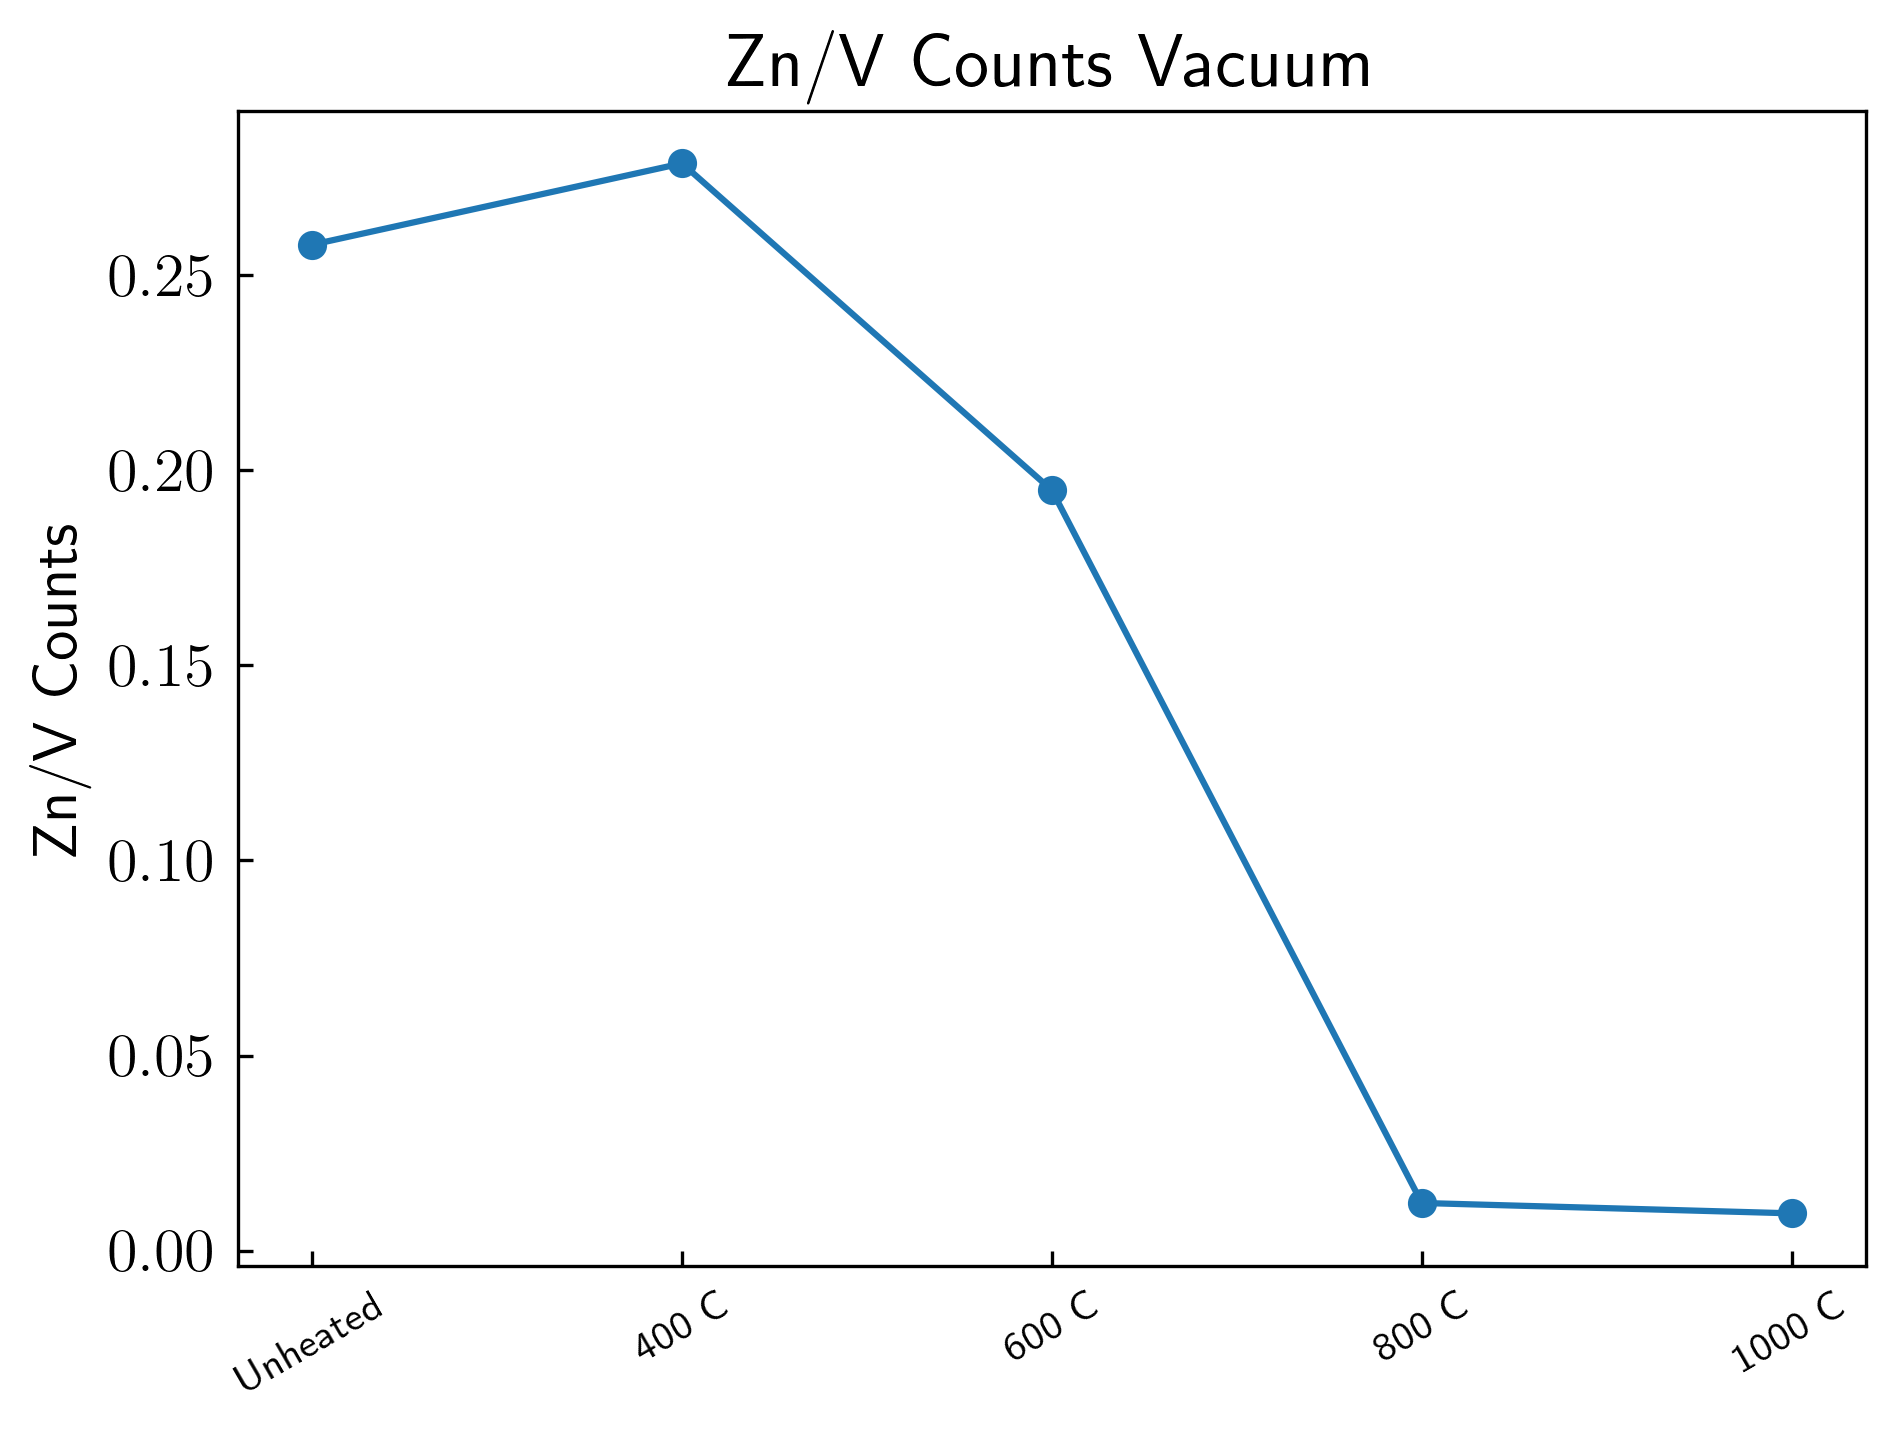

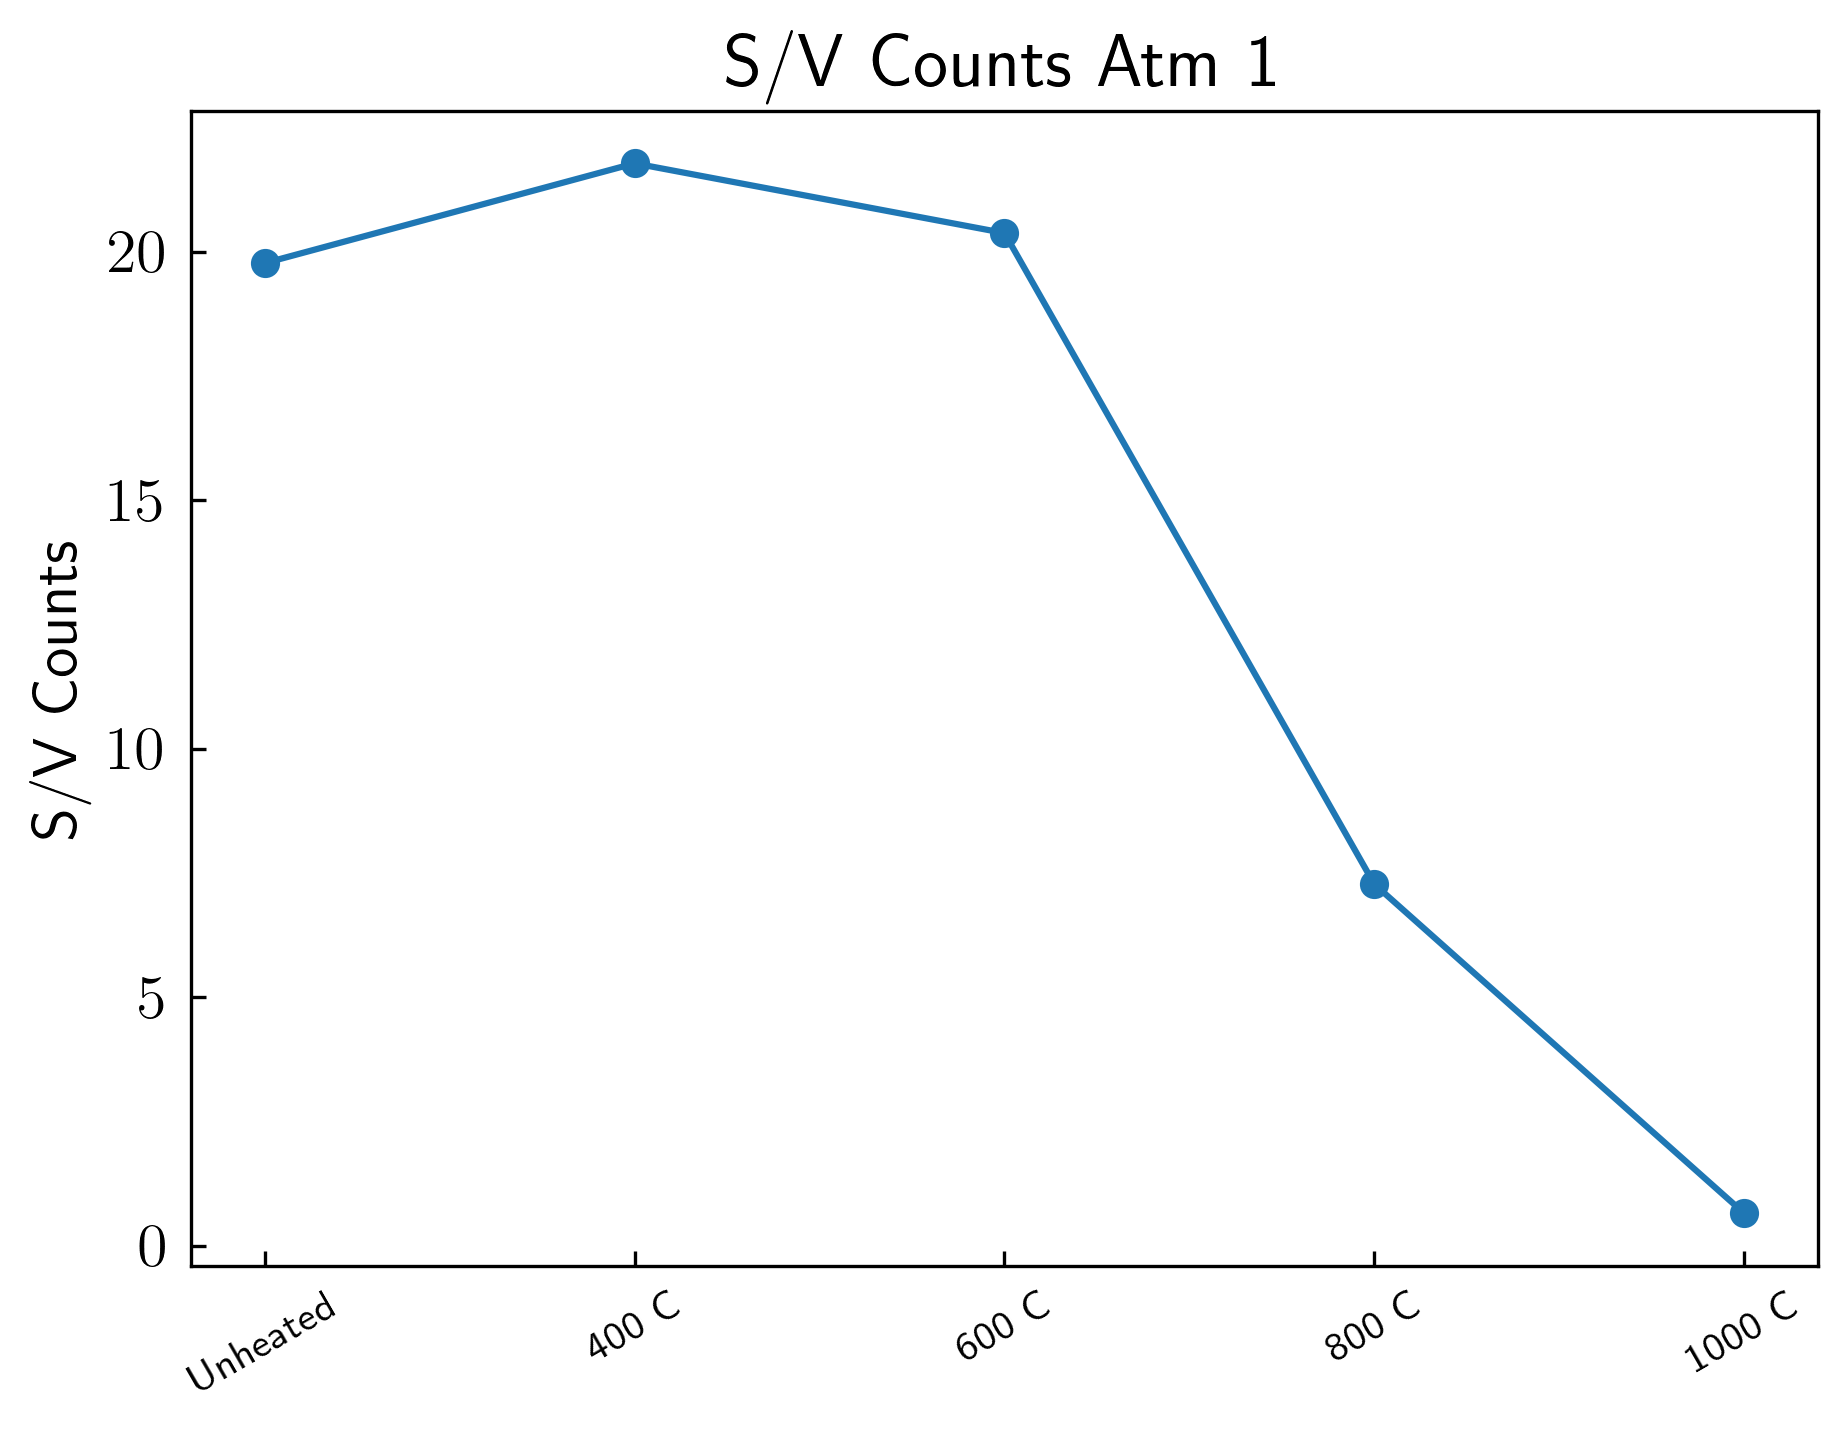

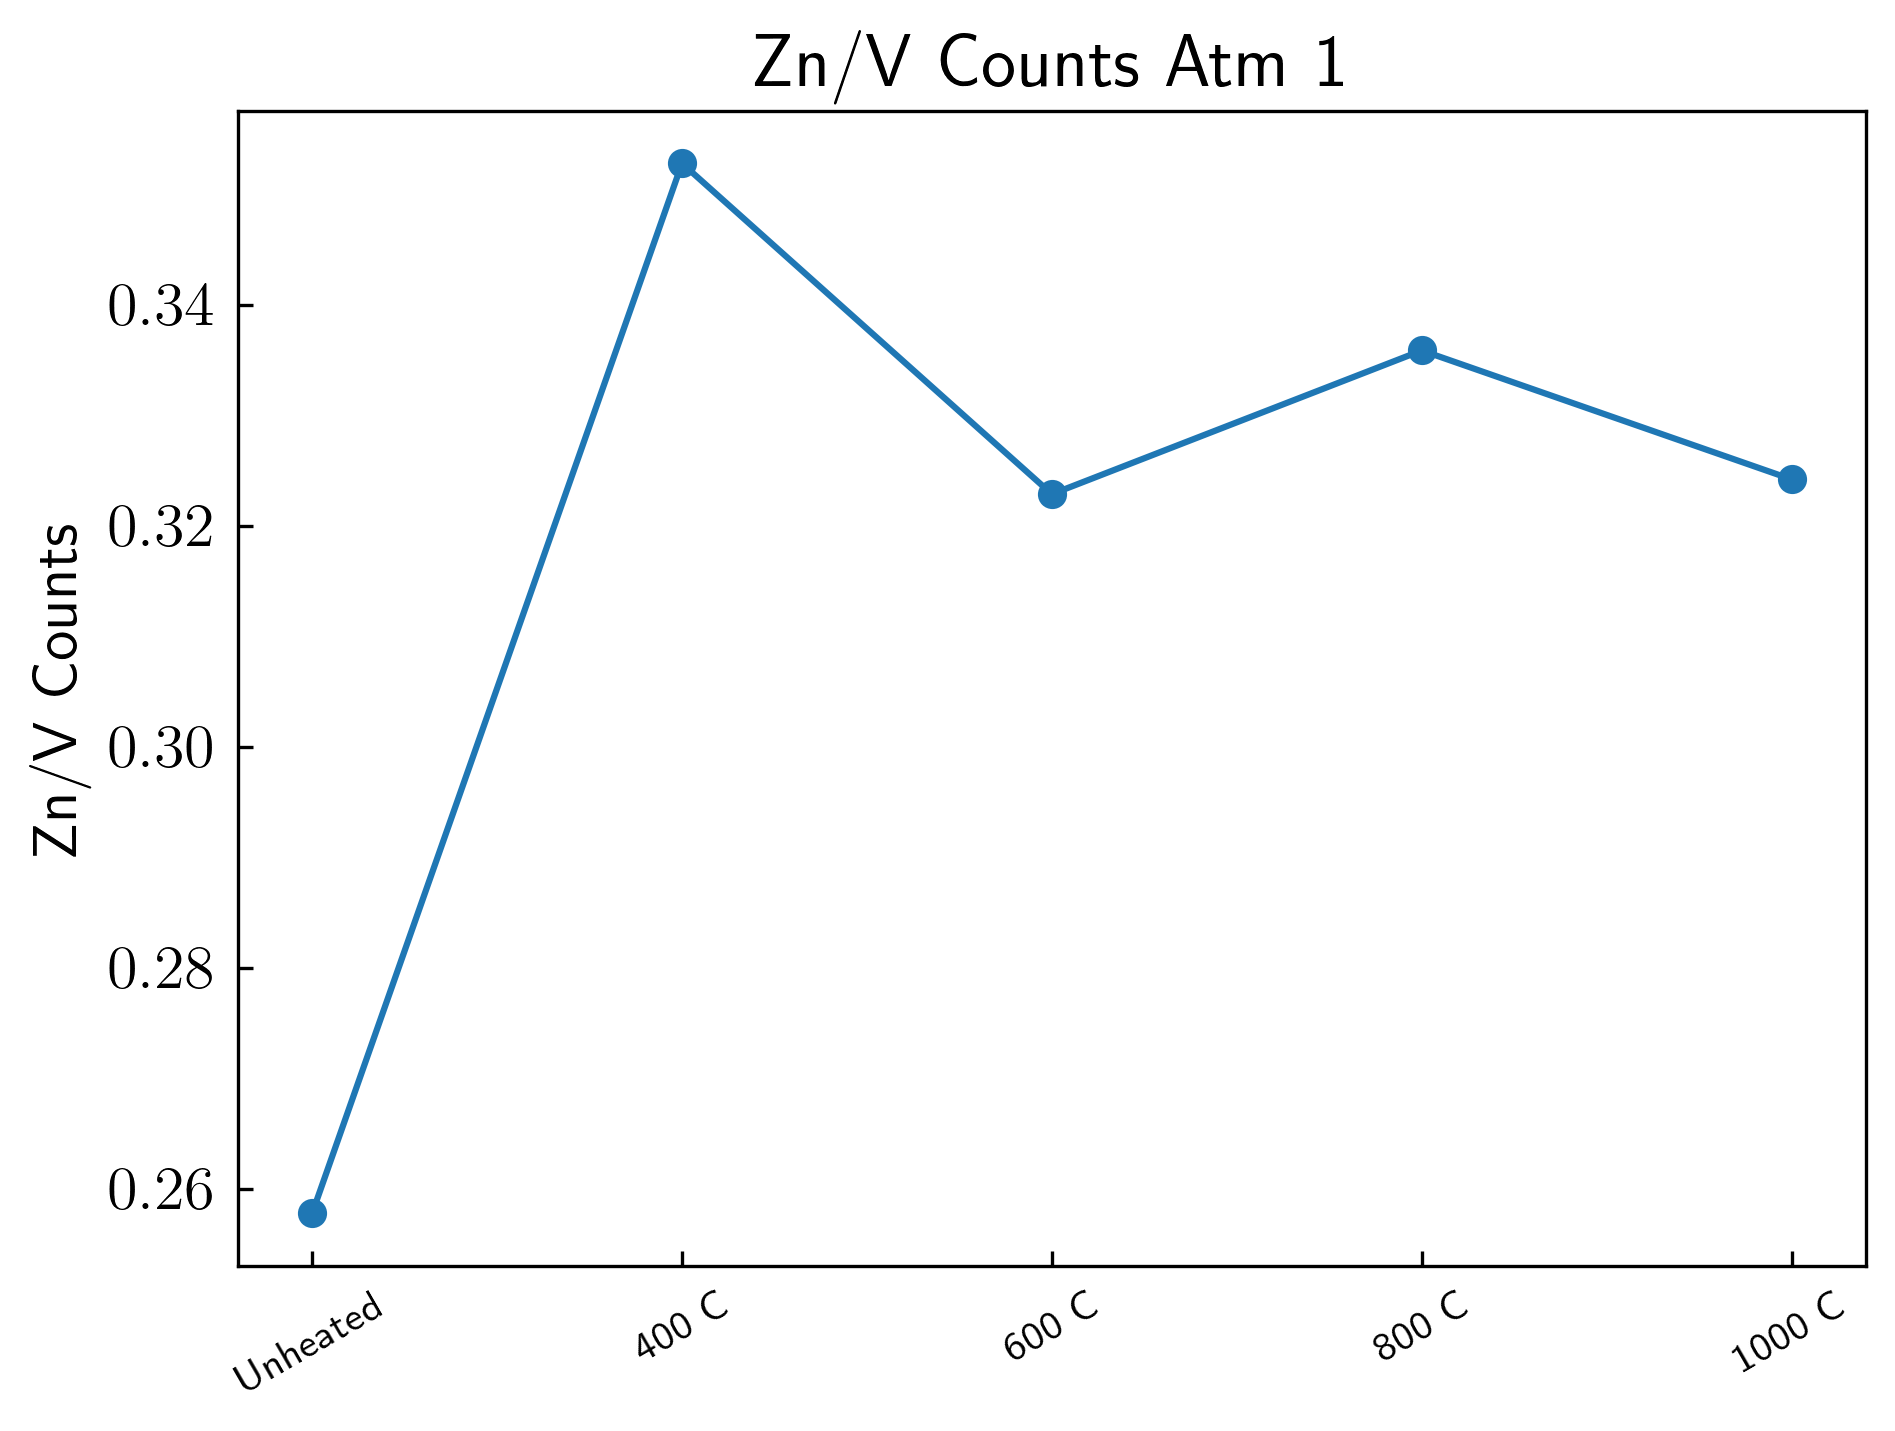

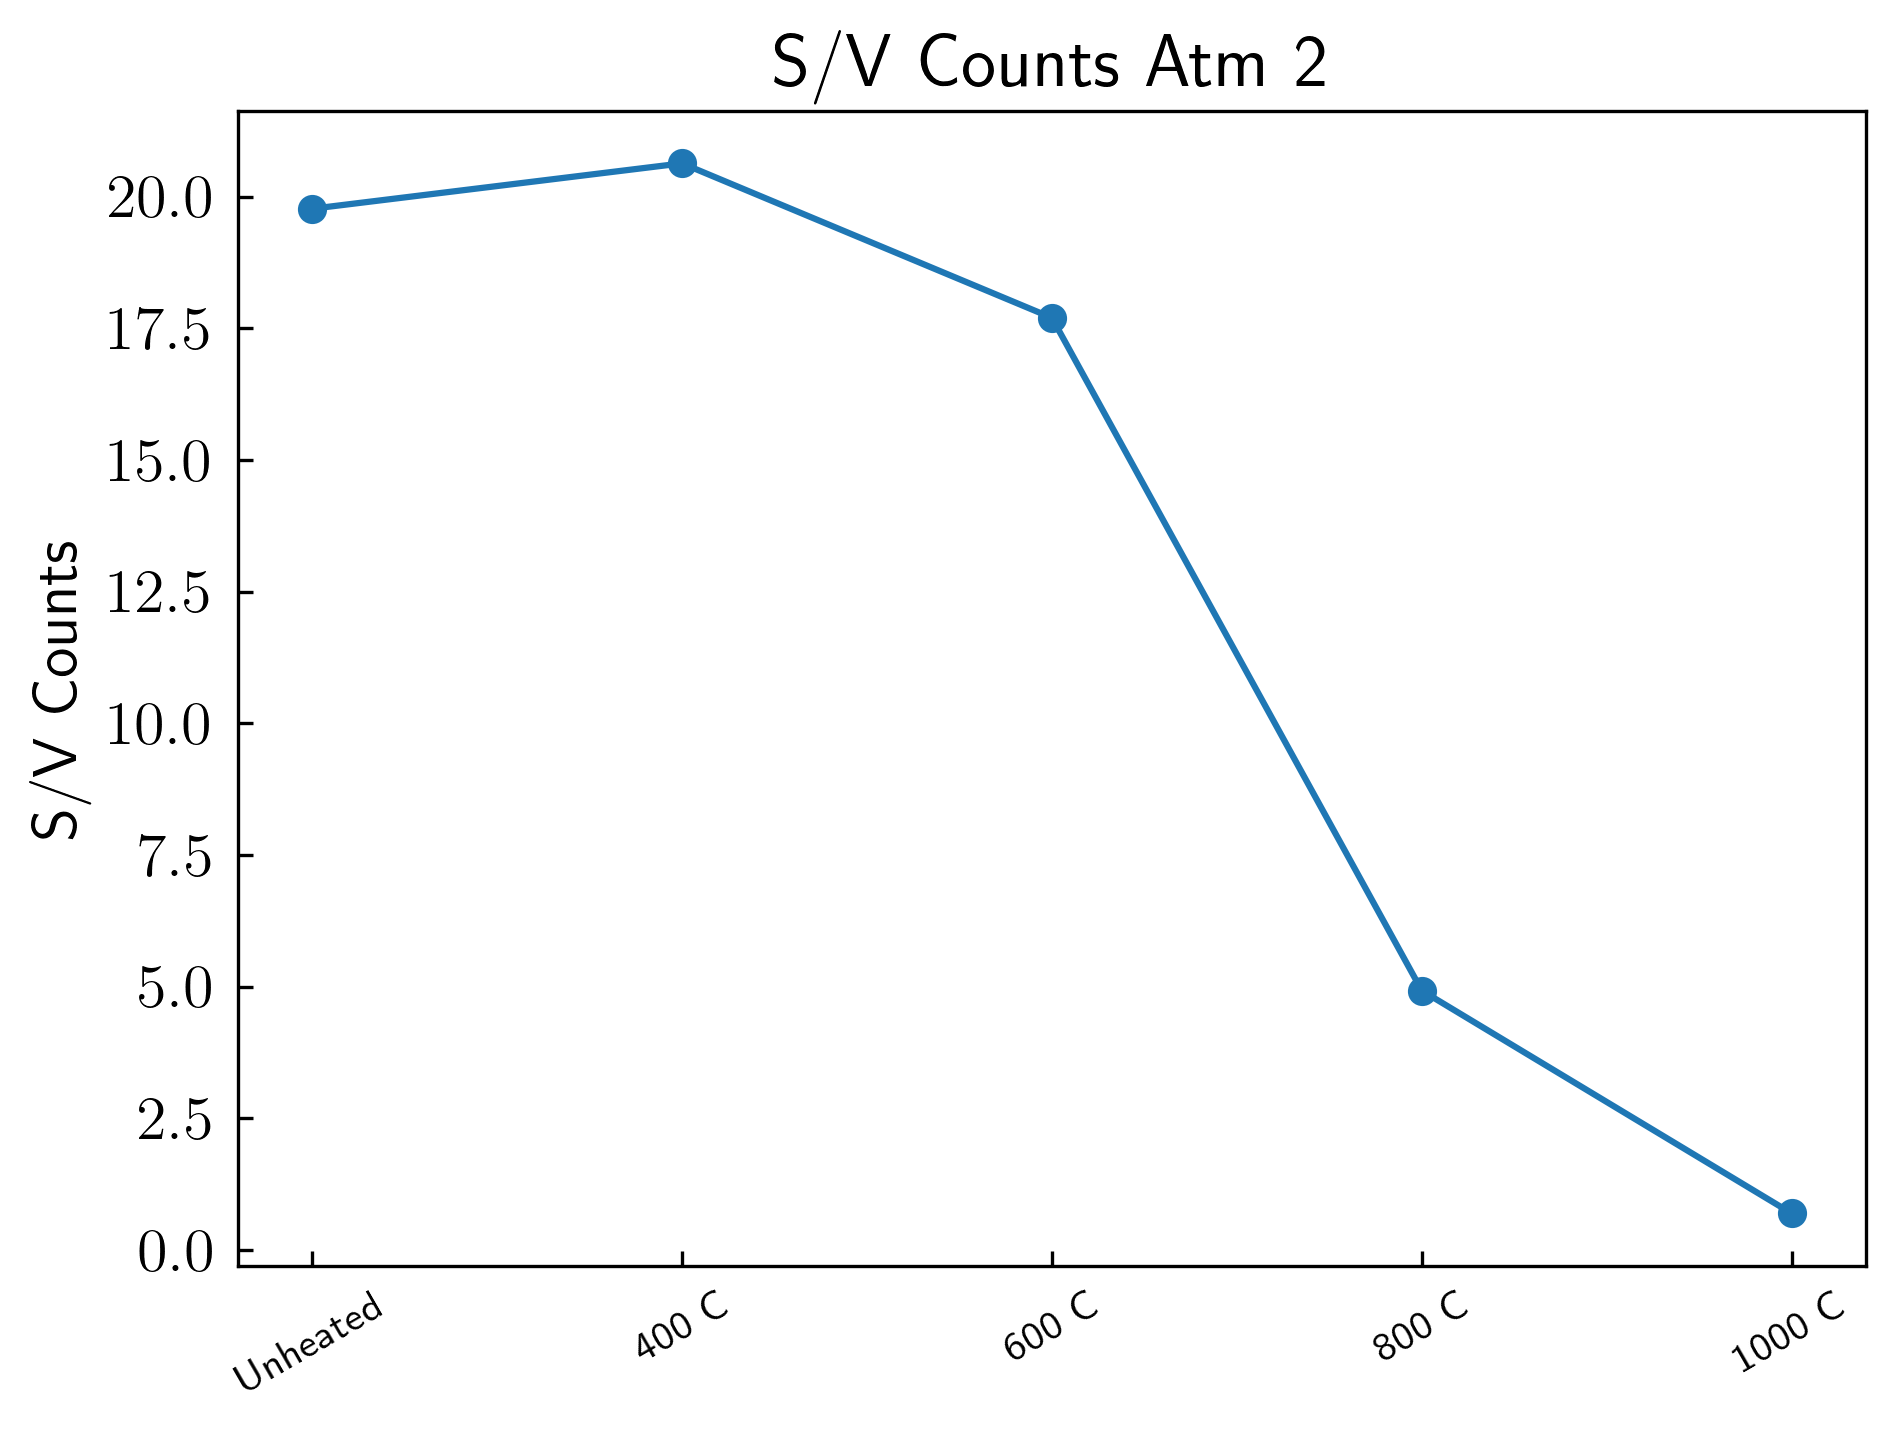

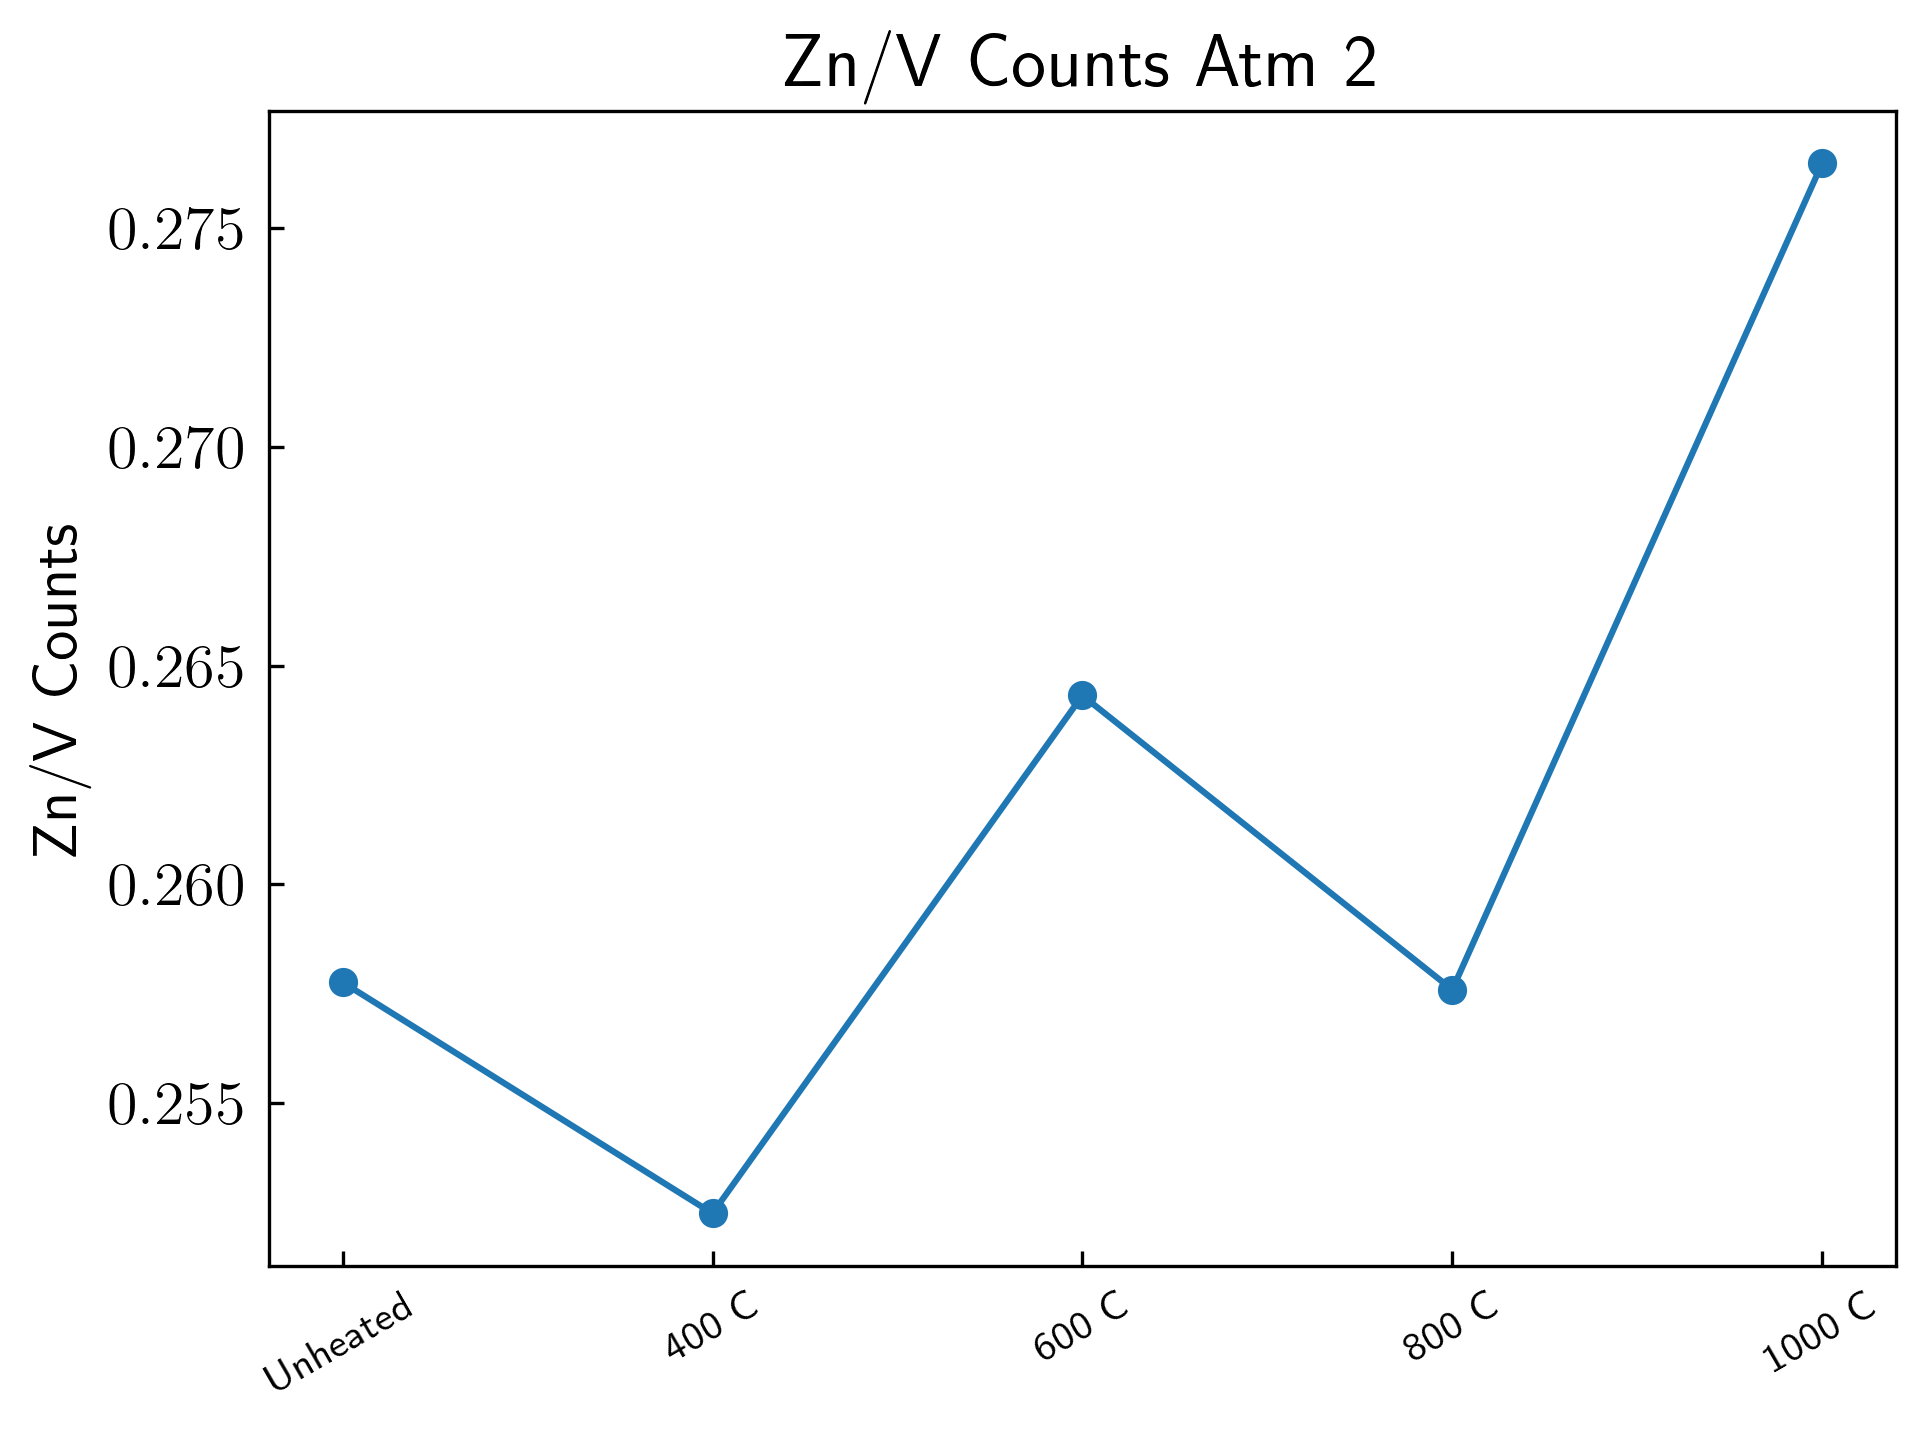

In [52]:
X_axis = ['Unheated', '400 C', '600 C', '800 C', '1000 C']


fig,ax = plt.subplots()
plt.scatter(list(range(1,6)), ((raw_data_Snorm[:]['M_UH_1']+raw_data_Snorm[:]['M_UH_2'])/2.0, raw_data_Snorm[:]['M_400_3'], raw_data_Snorm[:]['M_600_3'], raw_data_Snorm[:]['M_800_3'], raw_data_Snorm[:]['M_1000_3']))
plt.plot(list(range(1,6)), ((raw_data_Snorm[:]['M_UH_1']+raw_data_Snorm[:]['M_UH_2'])/2.0, raw_data_Snorm[:]['M_400_3'], raw_data_Snorm[:]['M_600_3'], raw_data_Snorm[:]['M_800_3'], raw_data_Snorm[:]['M_1000_3']))
ax.set_xticks(list(range(1,6)))
ax.set_xticklabels(X_axis, rotation=30, fontsize=10)
#plt.ylim(-0.1, 0.3)
plt.title('S/V Counts Vacuum')
plt.ylabel('S/V Counts')
plt.show()

fig,ax = plt.subplots()
plt.scatter(list(range(1,6)), ((raw_data_Znnorm[:]['M_UH_1']+raw_data_Znnorm[:]['M_UH_2'])/2.0, raw_data_Znnorm[:]['M_400_3'], raw_data_Znnorm[:]['M_600_3'], raw_data_Znnorm[:]['M_800_3'], raw_data_Znnorm[:]['M_1000_3']))
plt.plot(list(range(1,6)), ((raw_data_Znnorm[:]['M_UH_1']+raw_data_Znnorm[:]['M_UH_2'])/2.0, raw_data_Znnorm[:]['M_400_3'], raw_data_Znnorm[:]['M_600_3'], raw_data_Znnorm[:]['M_800_3'], raw_data_Znnorm[:]['M_1000_3']))
ax.set_xticks(list(range(1,6)))
ax.set_xticklabels(X_axis, rotation=30, fontsize=10)
#plt.ylim(-0.001, 0.004)
plt.ylabel('Zn/V Counts')
plt.title('Zn/V Counts Vacuum')
plt.show()
         
    
fig,ax = plt.subplots()
plt.scatter(list(range(1,6)), ((raw_data_Snorm[:]['M_UH_1']+raw_data_Snorm[:]['M_UH_2'])/2.0, raw_data_Snorm[:]['M_400_1'], raw_data_Snorm[:]['M_600_1'], raw_data_Snorm[:]['M_800_1'], raw_data_Snorm[:]['M_1000_1']))
plt.plot(list(range(1,6)), ((raw_data_Snorm[:]['M_UH_1']+raw_data_Snorm[:]['M_UH_2'])/2.0, raw_data_Snorm[:]['M_400_1'], raw_data_Snorm[:]['M_600_1'], raw_data_Snorm[:]['M_800_1'], raw_data_Snorm[:]['M_1000_1']))
ax.set_xticks(list(range(1,6)))
ax.set_xticklabels(X_axis, rotation=30, fontsize=10)
#plt.ylim(-0.1, 0.3)
plt.title('S/V Counts Atm 1')
plt.ylabel('S/V Counts')
plt.show()

fig,ax = plt.subplots()
plt.scatter(list(range(1,6)), ((raw_data_Znnorm[:]['M_UH_1']+raw_data_Znnorm[:]['M_UH_2'])/2.0, raw_data_Znnorm[:]['M_400_1'], raw_data_Znnorm[:]['M_600_1'], raw_data_Znnorm[:]['M_800_1'], raw_data_Znnorm[:]['M_1000_1']))
plt.plot(list(range(1,6)), ((raw_data_Znnorm[:]['M_UH_1']+raw_data_Znnorm[:]['M_UH_2'])/2.0, raw_data_Znnorm[:]['M_400_1'], raw_data_Znnorm[:]['M_600_1'], raw_data_Znnorm[:]['M_800_1'], raw_data_Znnorm[:]['M_1000_1']))
ax.set_xticks(list(range(1,6)))
ax.set_xticklabels(X_axis, rotation=30, fontsize=10)
#plt.ylim(-0.001, 0.004)
plt.ylabel('Zn/V Counts')
plt.title('Zn/V Counts Atm 1')
plt.show()


fig,ax = plt.subplots()
plt.scatter(list(range(1,6)), ((raw_data_Snorm[:]['M_UH_1']+raw_data_Snorm[:]['M_UH_2'])/2.0, raw_data_Snorm[:]['M_400_2'], raw_data_Snorm[:]['M_600_2'], raw_data_Snorm[:]['M_800_2'], raw_data_Snorm[:]['M_1000_2']))
plt.plot(list(range(1,6)), ((raw_data_Snorm[:]['M_UH_1']+raw_data_Snorm[:]['M_UH_2'])/2.0, raw_data_Snorm[:]['M_400_2'], raw_data_Snorm[:]['M_600_2'], raw_data_Snorm[:]['M_800_2'], raw_data_Snorm[:]['M_1000_2']))
ax.set_xticks(list(range(1,6)))
ax.set_xticklabels(X_axis, rotation=30, fontsize=10)
#plt.ylim(-0.1, 0.3)
plt.title('S/V Counts Atm 2')
plt.ylabel('S/V Counts')
plt.show()

fig,ax = plt.subplots()
plt.scatter(list(range(1,6)), ((raw_data_Znnorm[:]['M_UH_1']+raw_data_Znnorm[:]['M_UH_2'])/2.0, raw_data_Znnorm[:]['M_400_2'], raw_data_Znnorm[:]['M_600_2'], raw_data_Znnorm[:]['M_800_2'], raw_data_Znnorm[:]['M_1000_2']))
plt.plot(list(range(1,6)), ((raw_data_Znnorm[:]['M_UH_1']+raw_data_Znnorm[:]['M_UH_2'])/2.0, raw_data_Znnorm[:]['M_400_2'], raw_data_Znnorm[:]['M_600_2'], raw_data_Znnorm[:]['M_800_2'], raw_data_Znnorm[:]['M_1000_2']))
ax.set_xticks(list(range(1,6)))
ax.set_xticklabels(X_axis, rotation=30, fontsize=10)
#plt.ylim(-0.001, 0.004)
plt.ylabel('Zn/V Counts')
plt.title('Zn/V Counts Atm 2')
plt.show()



### Plot Results (No Uncertainties)

In [53]:
X_axis = ['Unheated', '400 C', '600 C', '800 C', '1000 C']
X_axis_normUH = ['400 C', '600 C', '800 C', '1000 C']

def plot_results_raw(file, title, savetitle, yupperlim):
    fig, ax = plt.subplots()
    #plt.plot(list(range(1,6)), file.Al27, '.-', alpha=0.7, color='black', label='Al')
    #plt.plot(list(range(1,6)), file.Ti47, '.-', alpha=0.7, color='darkgrey', label='Ti')
    #plt.plot(list(range(1,6)), file.Ca43, '.-', alpha=0.7, color='#a6bddb', label='Ca')
    plt.plot(list(range(1,6)), file.V51, '.-', alpha=0.7, color='#67a9cf', label='V')
    plt.plot(list(range(1,6)), file.Ni61, '.-', alpha=0.7, color='#3690c0', label='Ni')
    plt.plot(list(range(1,6)), file.Co59, '.-', alpha=0.7, color='#02818a', label='Co')
    plt.plot(list(range(1,6)), file.Mg26, '.-', alpha=0.7, color='#016c59', label='Mg')
    plt.plot(list(range(1,6)), file.Fe57, '.-', alpha=0.7, color='#014636', label='Fe')
    plt.plot(list(range(1,6)), file.Cr52, '.-', alpha=0.7, color='dodgerblue', label='Cr')
    plt.plot(list(range(1,6)), file.P31, '.-', alpha=0.7, color='navy', label='P')
    plt.plot(list(range(1,6)), file.Mn55, '.-', alpha=0.7, color='forestgreen', label='Mn')
    #plt.plot(list(range(1,6)), file.Na23, '-o', alpha=0.7, color='fuchsia', label='Na')
    plt.plot(list(range(1,6)), file.Zn66, '-o', alpha=0.7, color='#dd3497', label='Zn')
    plt.plot(list(range(1,6)), file.S32, '-o', alpha=0.7, color='#7a0177', label='S')
    ax.tick_params(top=True, right=True)
    plt.yscale('symlog')
    plt.ylim(0,yupperlim)
    ax.set_xticks(list(range(1,6)))
    ax.set_xticklabels(X_axis, rotation=30, fontsize=10)
    plt.ylabel('Intensity (cps) Normalized to V')
    plt.legend(fontsize='xx-small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    #plt.title(title)
    plt.savefig(savetitle, dpi=1000, bbox_inches='tight')
    plt.show()
    
def plot_results_raw_normUH(file, title, savetitle, yupperlim):
    fig, ax = plt.subplots()
    #plt.plot(list(range(1,6)), file.Al27, '.-', alpha=0.7, color='black', label='Al')
    #plt.plot(list(range(1,6)), file.Ti47, '.-', alpha=0.7, color='darkgrey', label='Ti')
    #plt.plot(list(range(1,6)), file.Ca43, '.-', alpha=0.7, color='#a6bddb', label='Ca')
    plt.plot(list(range(1,5)), file.V51, '.-', alpha=0.7, color='#67a9cf', label='V')
    plt.plot(list(range(1,5)), file.Ni61, '.-', alpha=0.7, color='#3690c0', label='Ni')
    plt.plot(list(range(1,5)), file.Co59, '.-', alpha=0.7, color='#02818a', label='Co')
    plt.plot(list(range(1,5)), file.Mg26, '.-', alpha=0.7, color='#016c59', label='Mg')
    plt.plot(list(range(1,5)), file.Fe57, '.-', alpha=0.7, color='#014636', label='Fe')
    plt.plot(list(range(1,5)), file.Cr52, '.-', alpha=0.7, color='dodgerblue', label='Cr')
    plt.plot(list(range(1,5)), file.P31, '.-', alpha=0.7, color='navy', label='P')
    plt.plot(list(range(1,5)), file.Mn55, '.-', alpha=0.7, color='forestgreen', label='Mn')
    #plt.plot(list(range(1,6)), file.Na23, '-o', alpha=0.7, color='fuchsia', label='Na')
    plt.plot(list(range(1,5)), file.Zn66, '-o', alpha=0.7, color='#dd3497', label='Zn')
    plt.plot(list(range(1,5)), file.S32, '-o', alpha=0.7, color='#7a0177', label='S')
    ax.tick_params(top=True, right=True)
    #plt.yscale('symlog')
    plt.ylim(0,yupperlim)
    ax.set_xticks(list(range(1,5)))
    ax.set_xticklabels(X_axis_normUH, rotation=30, fontsize=10)
    plt.ylabel('Intensity (cps) Normalized to V and Unheated')
    plt.legend(fontsize='xx-small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    #plt.title(title)
    plt.savefig(savetitle, dpi=1000, bbox_inches='tight')
    plt.show()

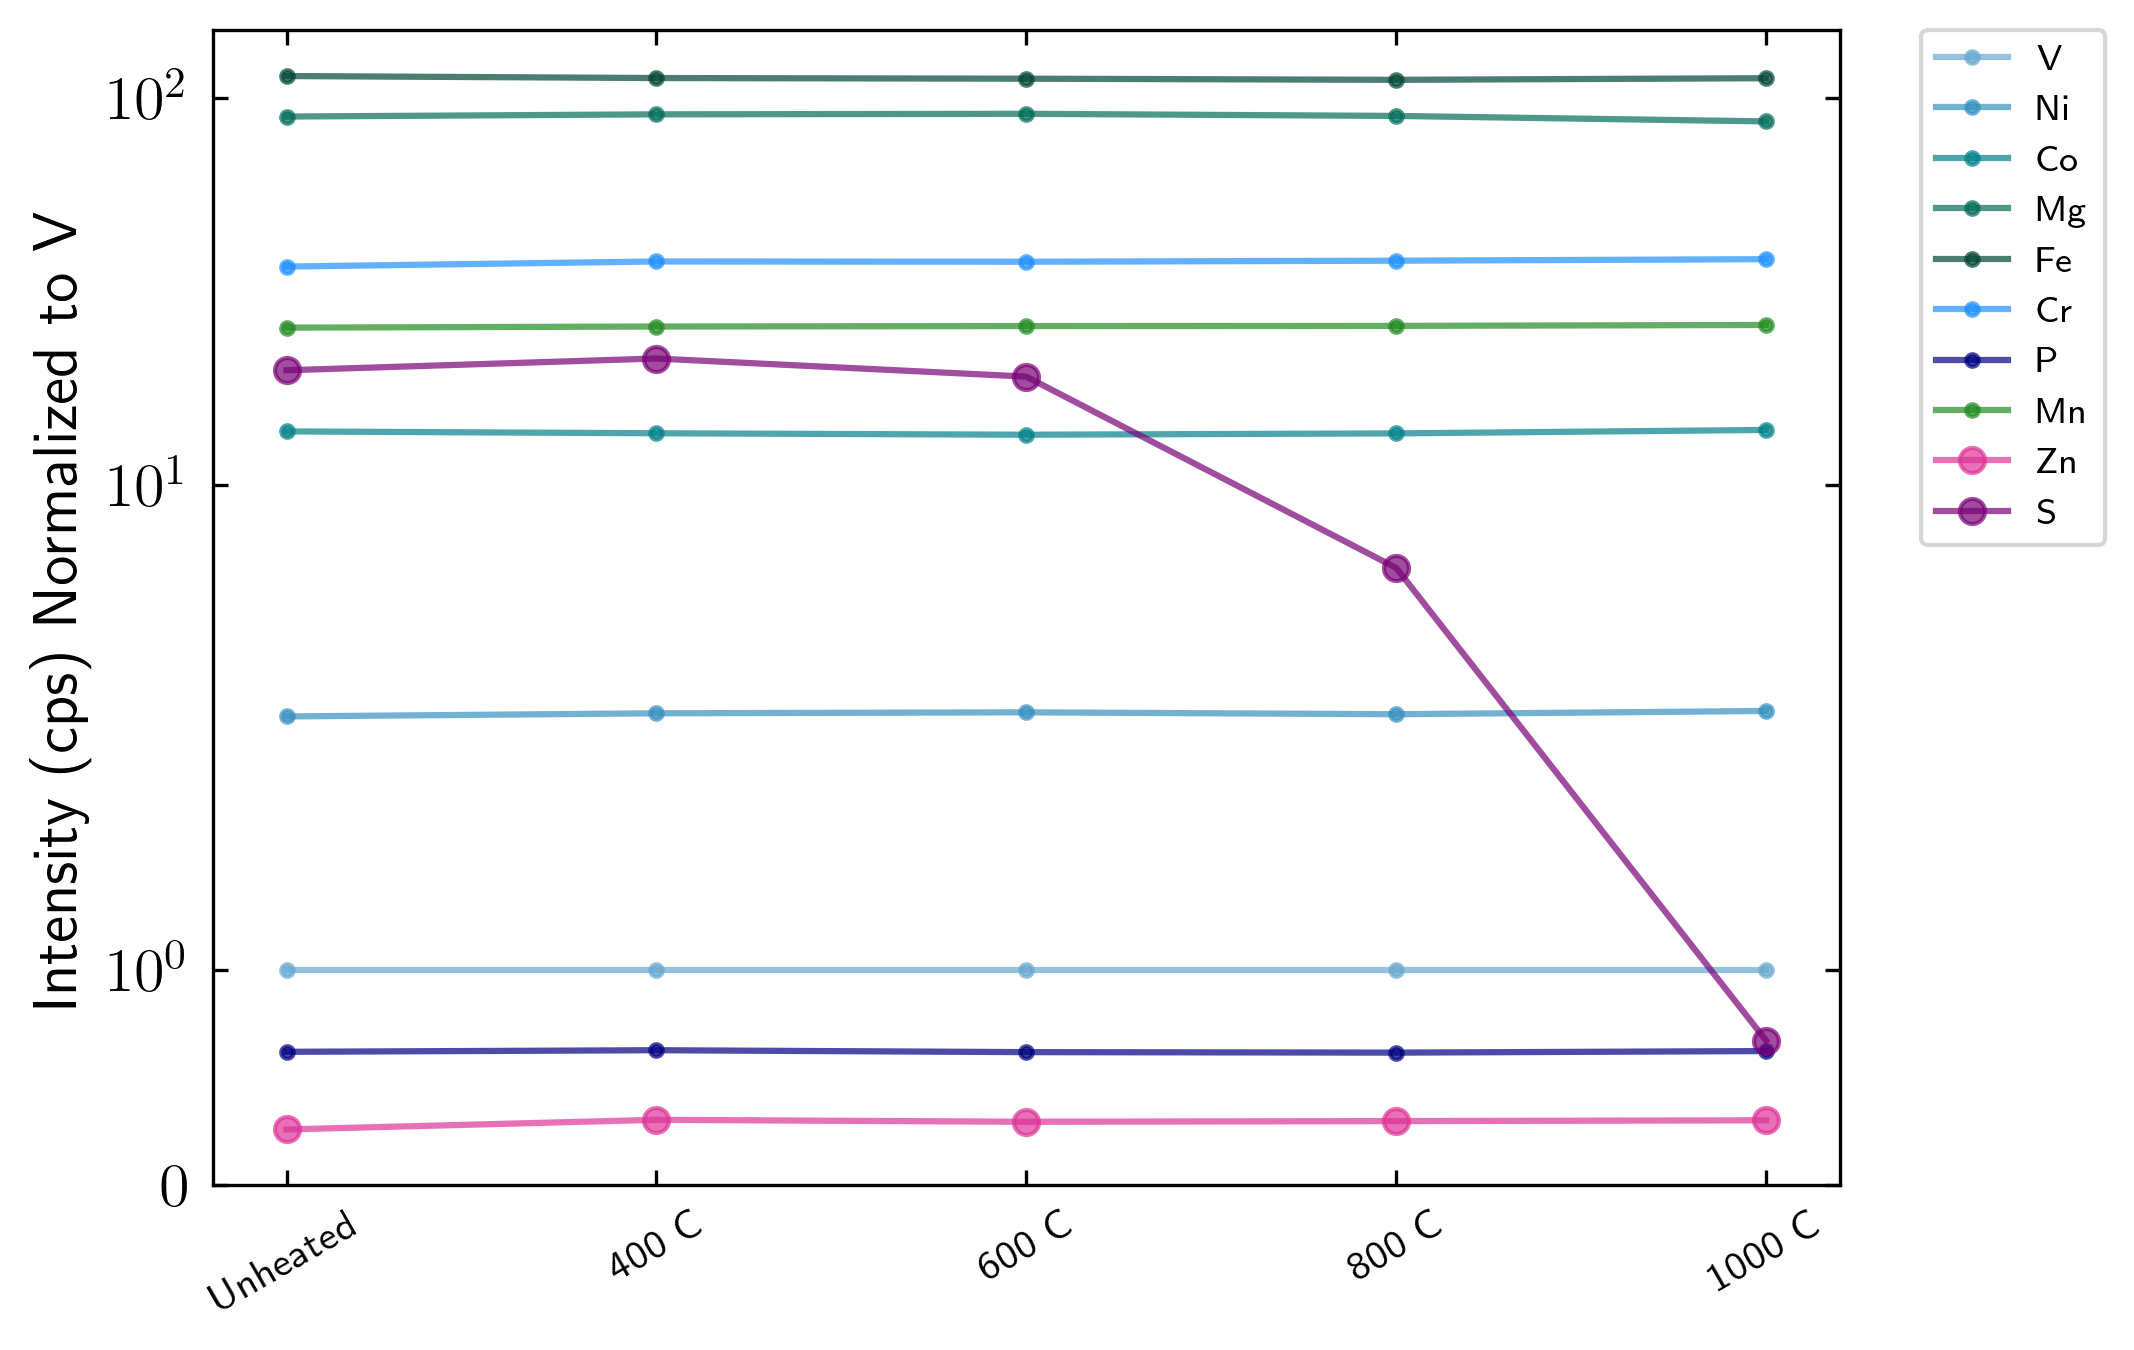

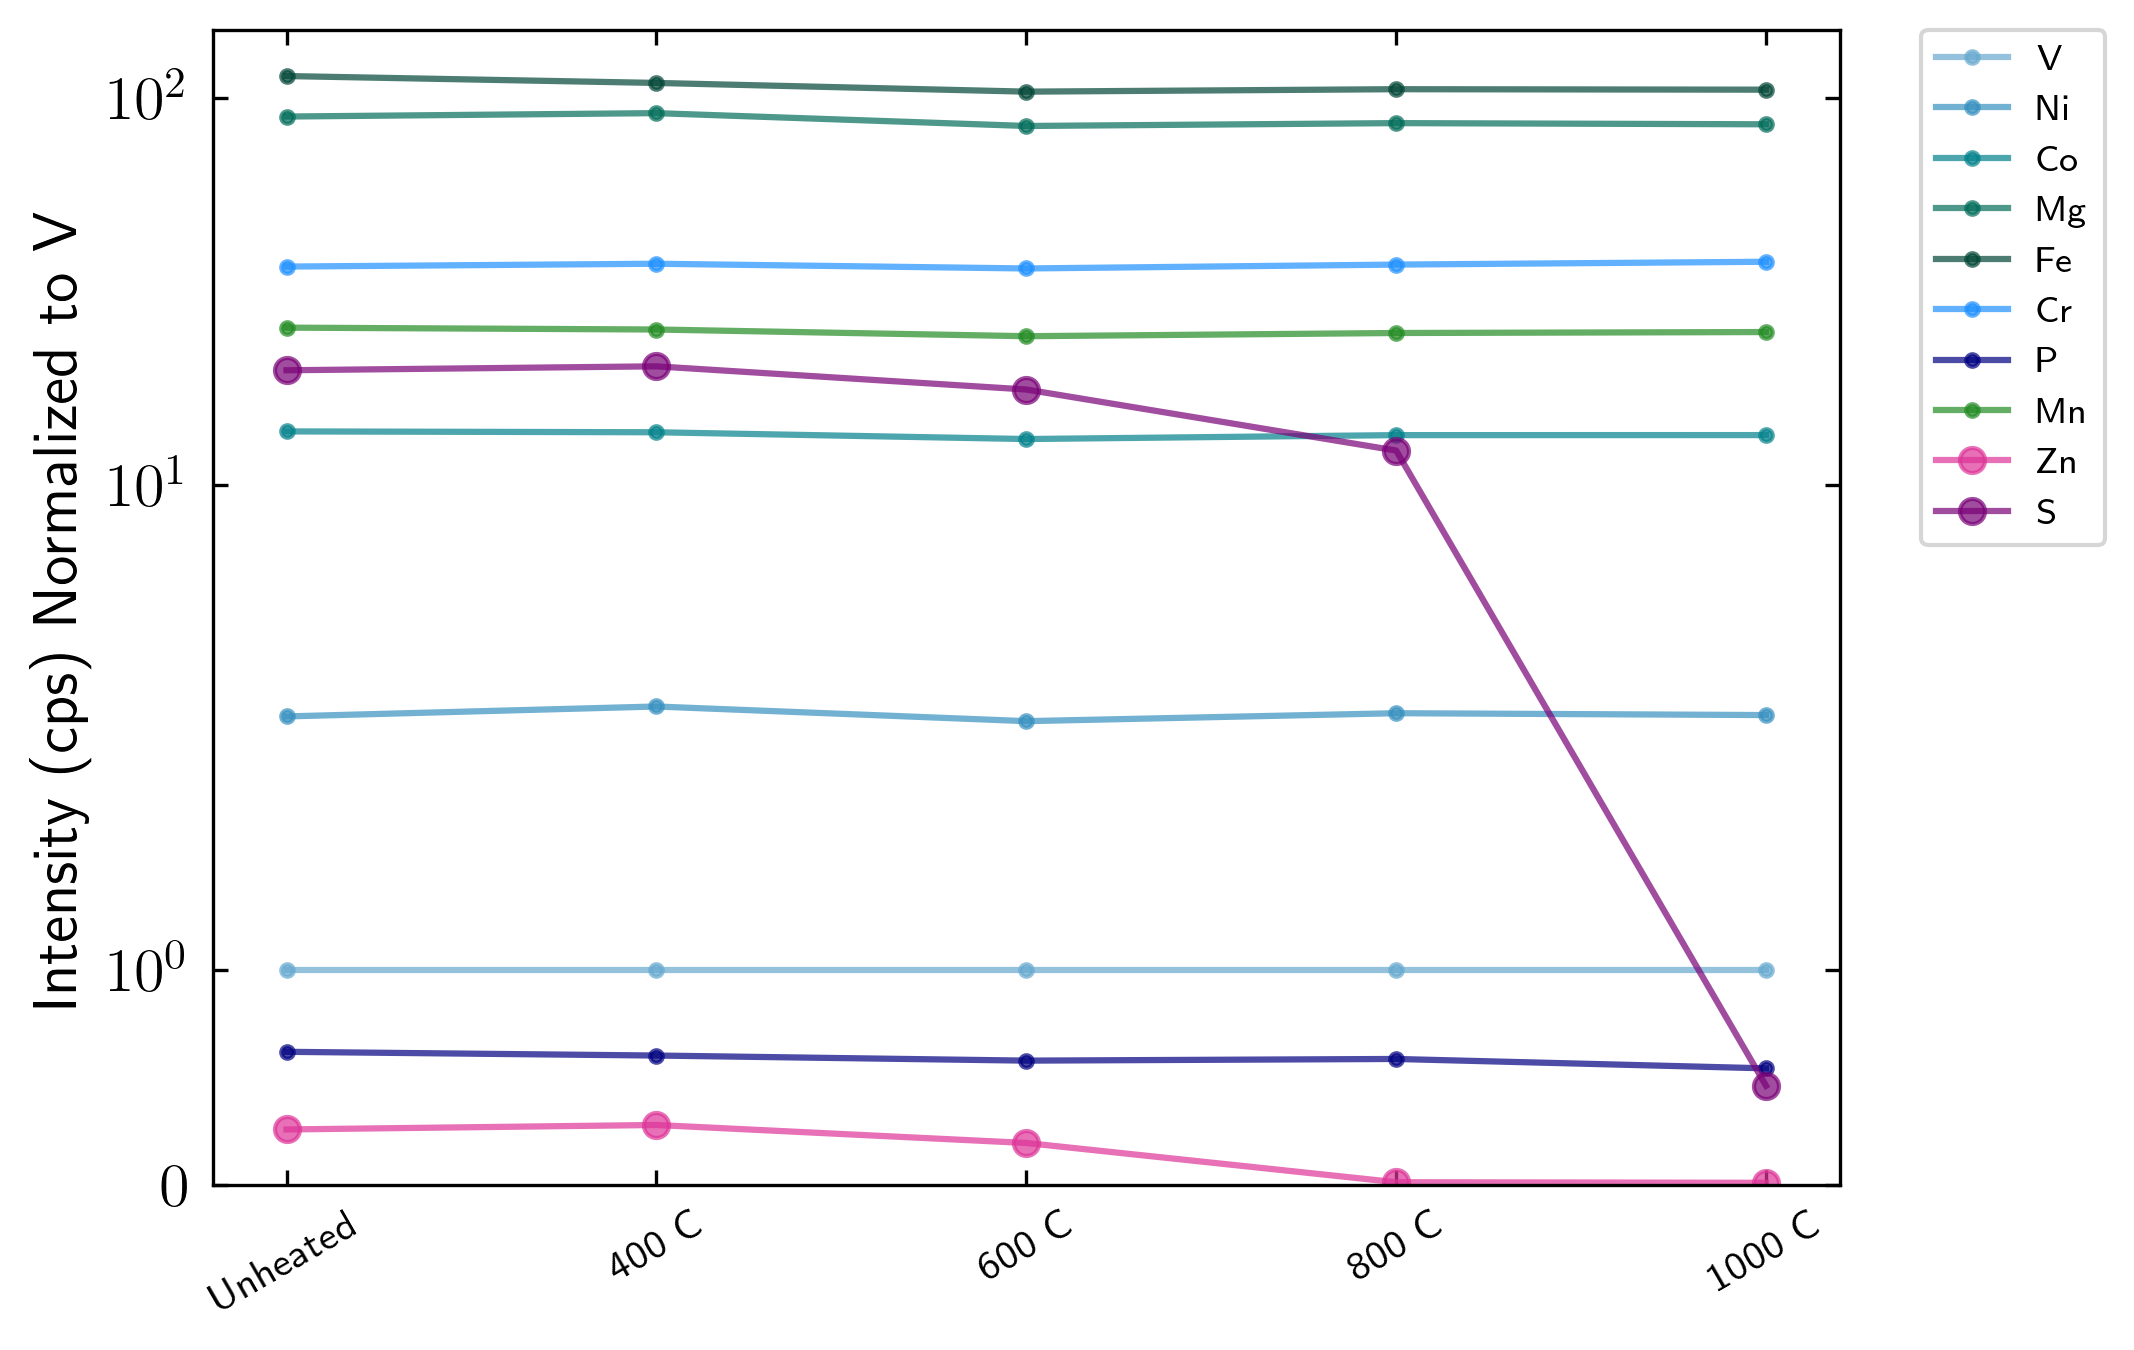

In [54]:
plot_results_raw(rawdat_normV_atm, '', 'RawDat_NormV_Atm.jpg', 150)
plot_results_raw(rawdat_normV_vac, '', 'RawDat_NormV_Vac.jpg', 150)


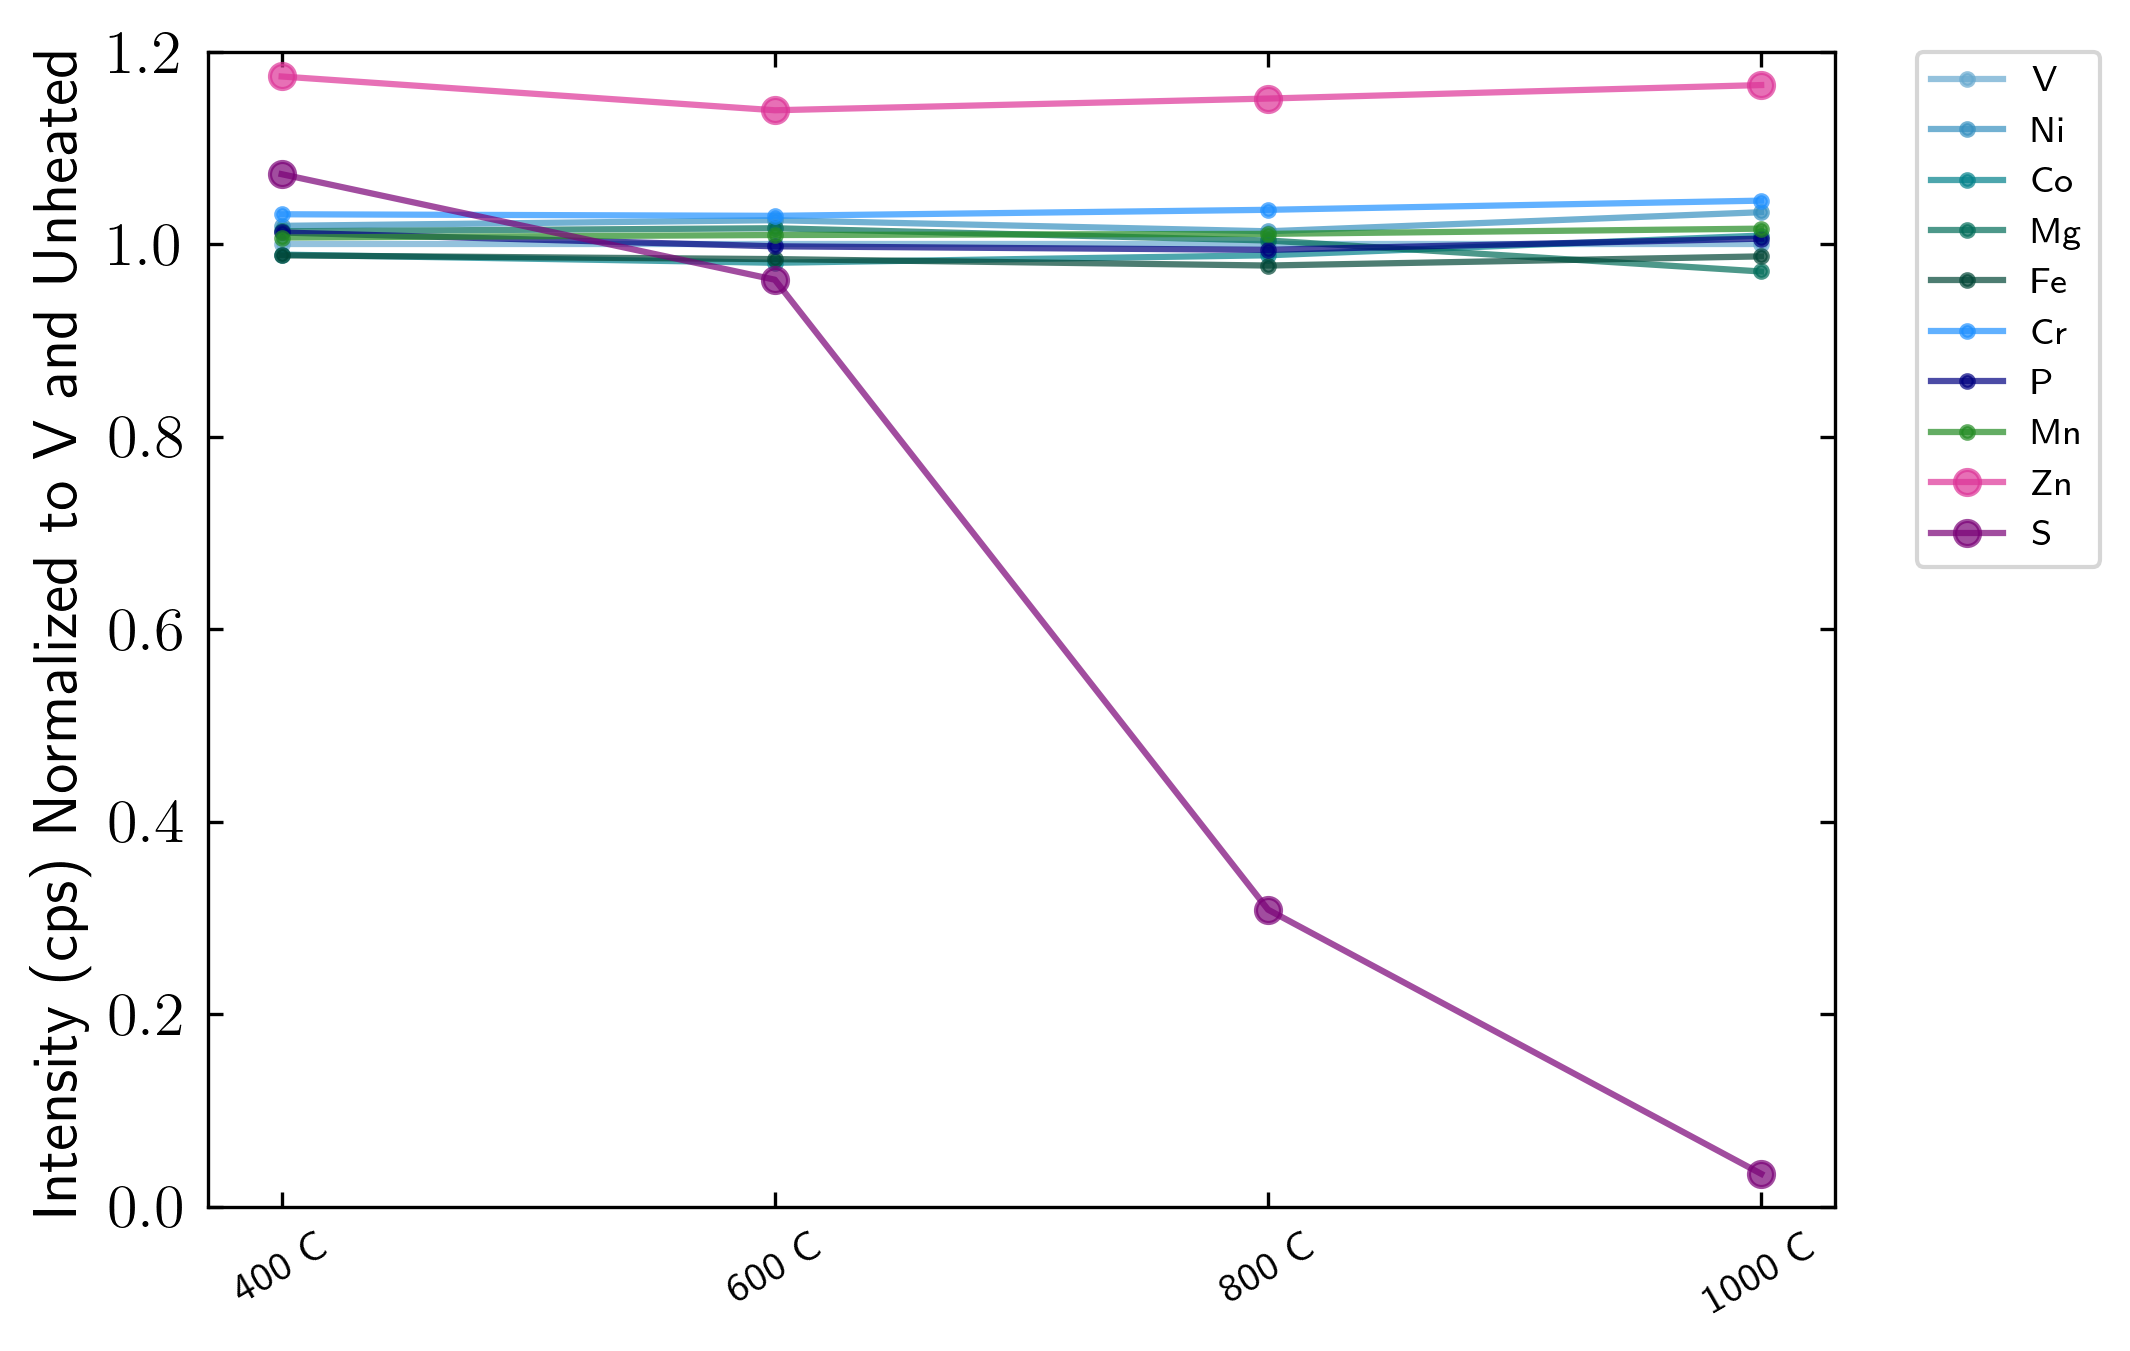

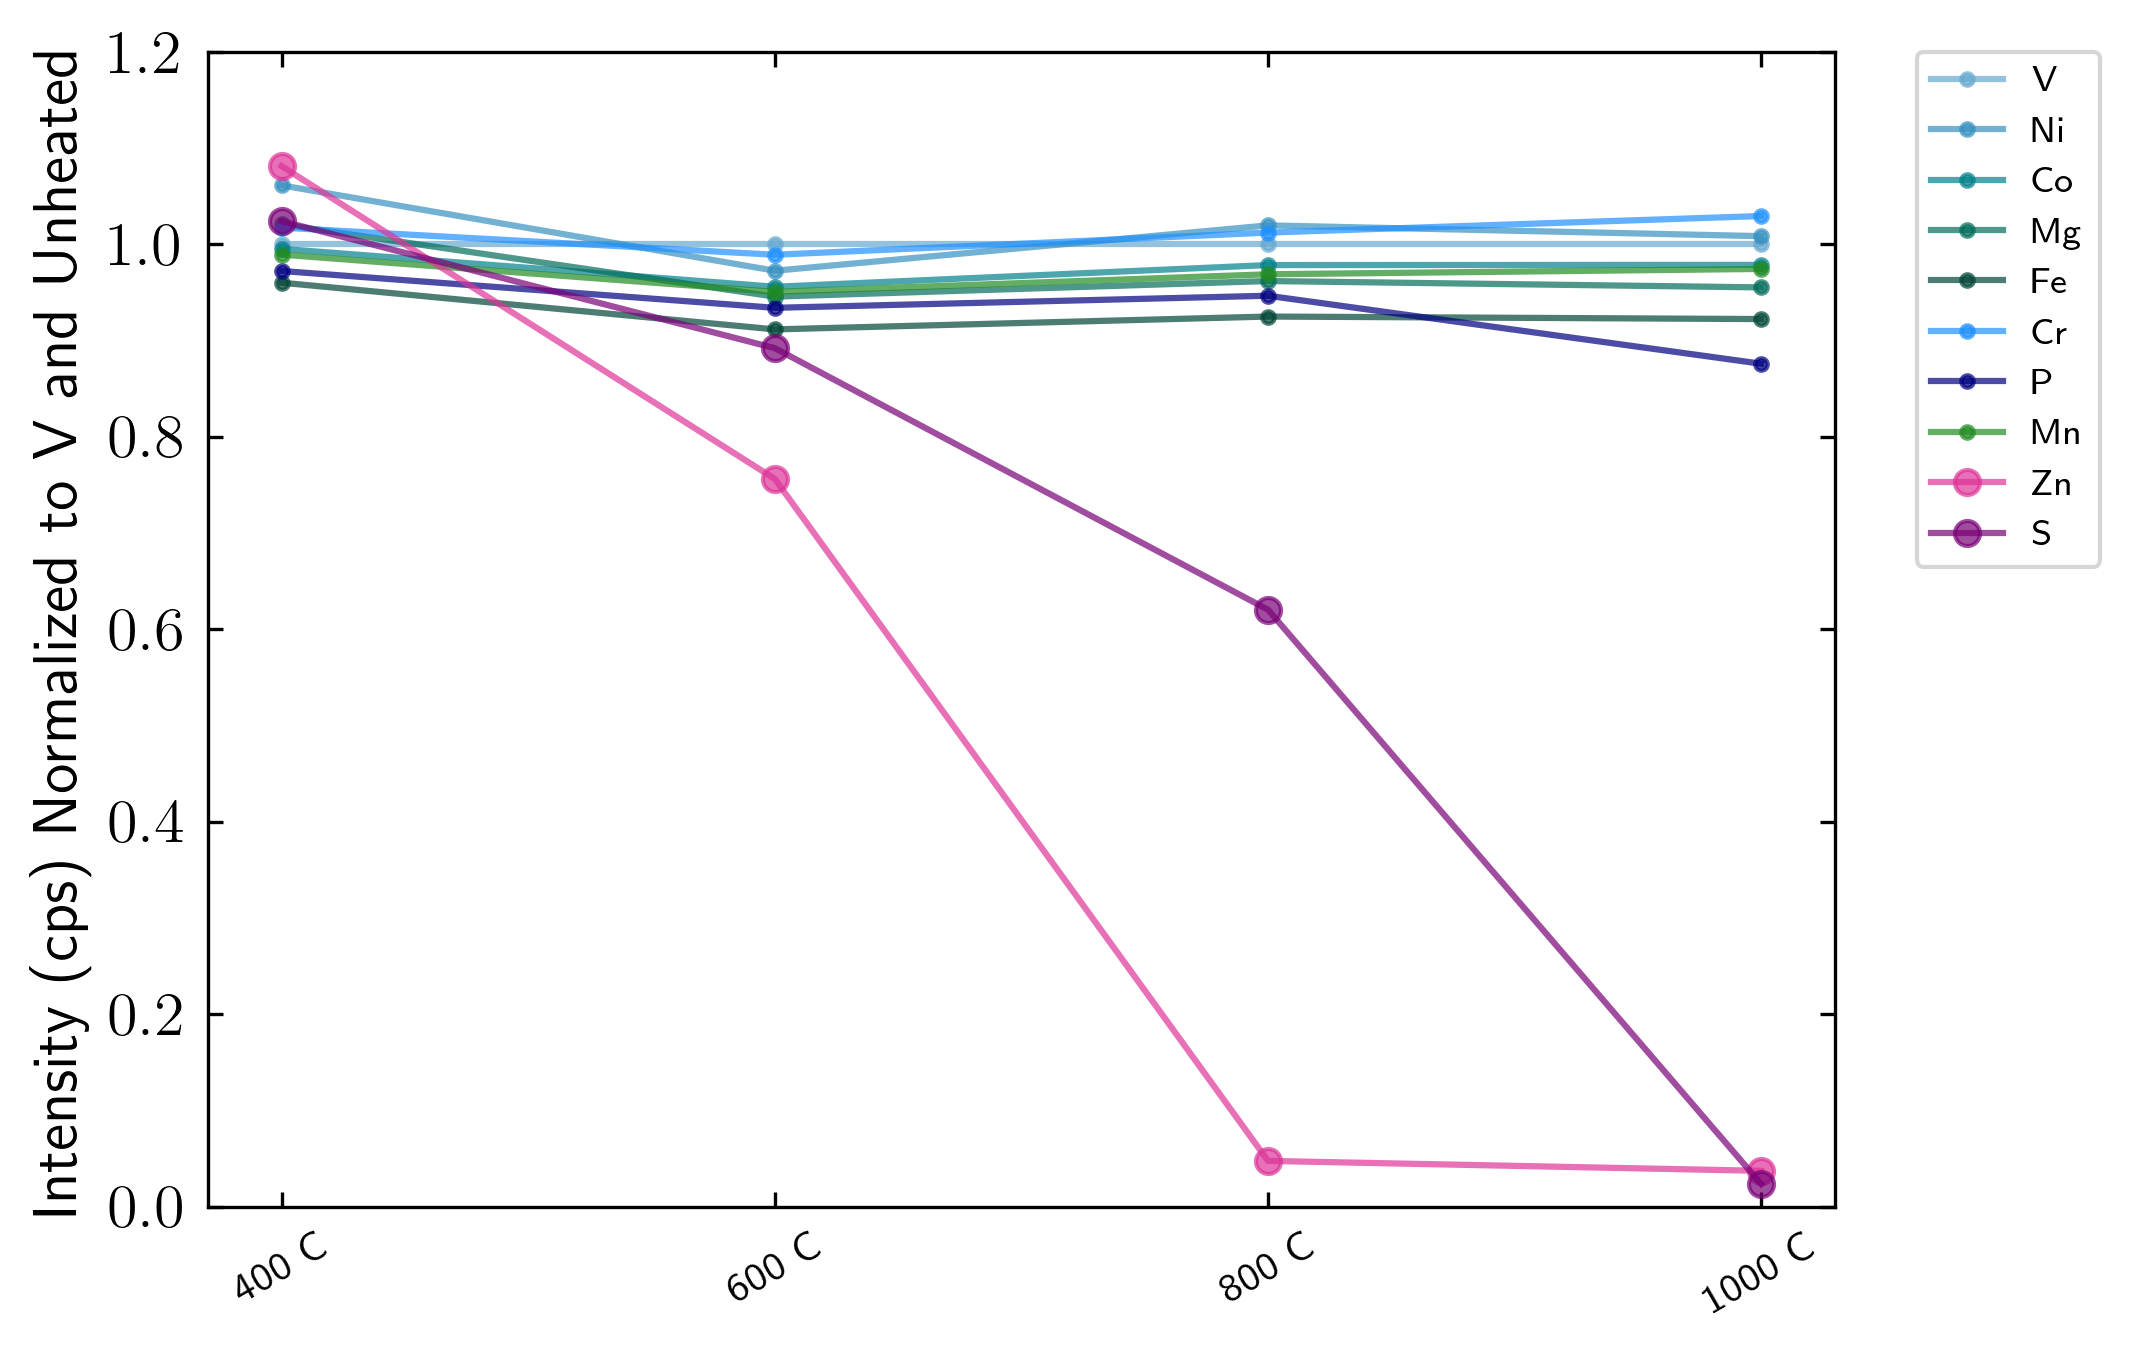

In [55]:
plot_results_raw_normUH(rawdat_normVUH_atm, '', 'RawDat_NormVUH_Atm.jpg', 1.2)
plot_results_raw_normUH(rawdat_normVUH_vac, '', 'RawDat_NormVUH_Vac.jpg', 1.2)

In [56]:
print(((rawdat_normV_atm['Zn66']['1000']-rawdat_normV_atm['Zn66']['UH'])/(rawdat_normV_atm['Zn66']['UH']))*100)

16.51640997321323


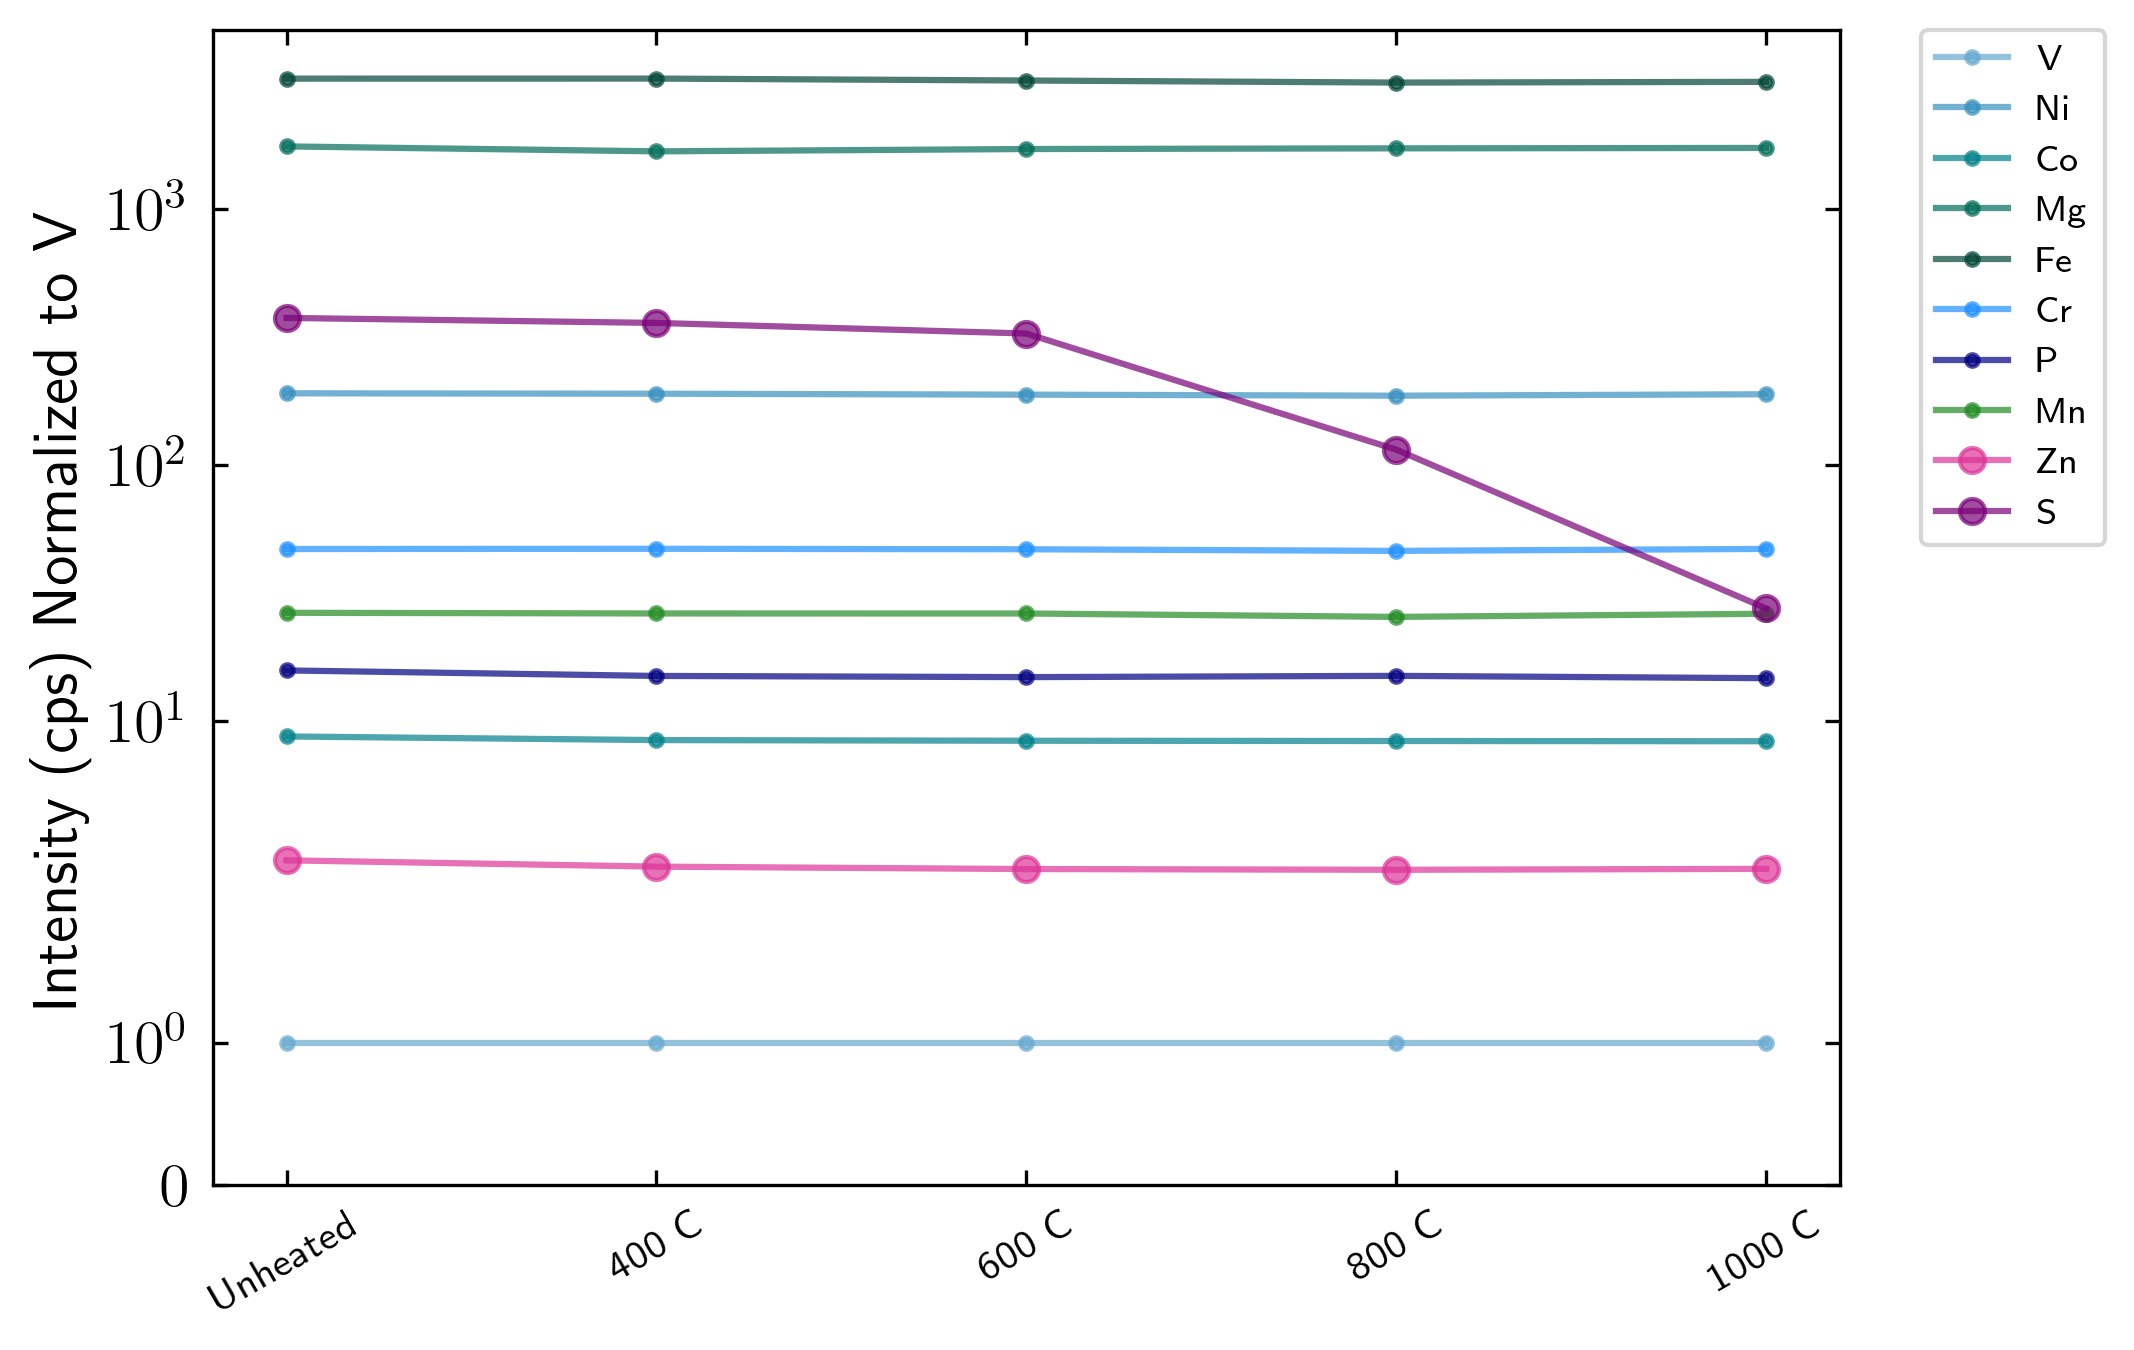

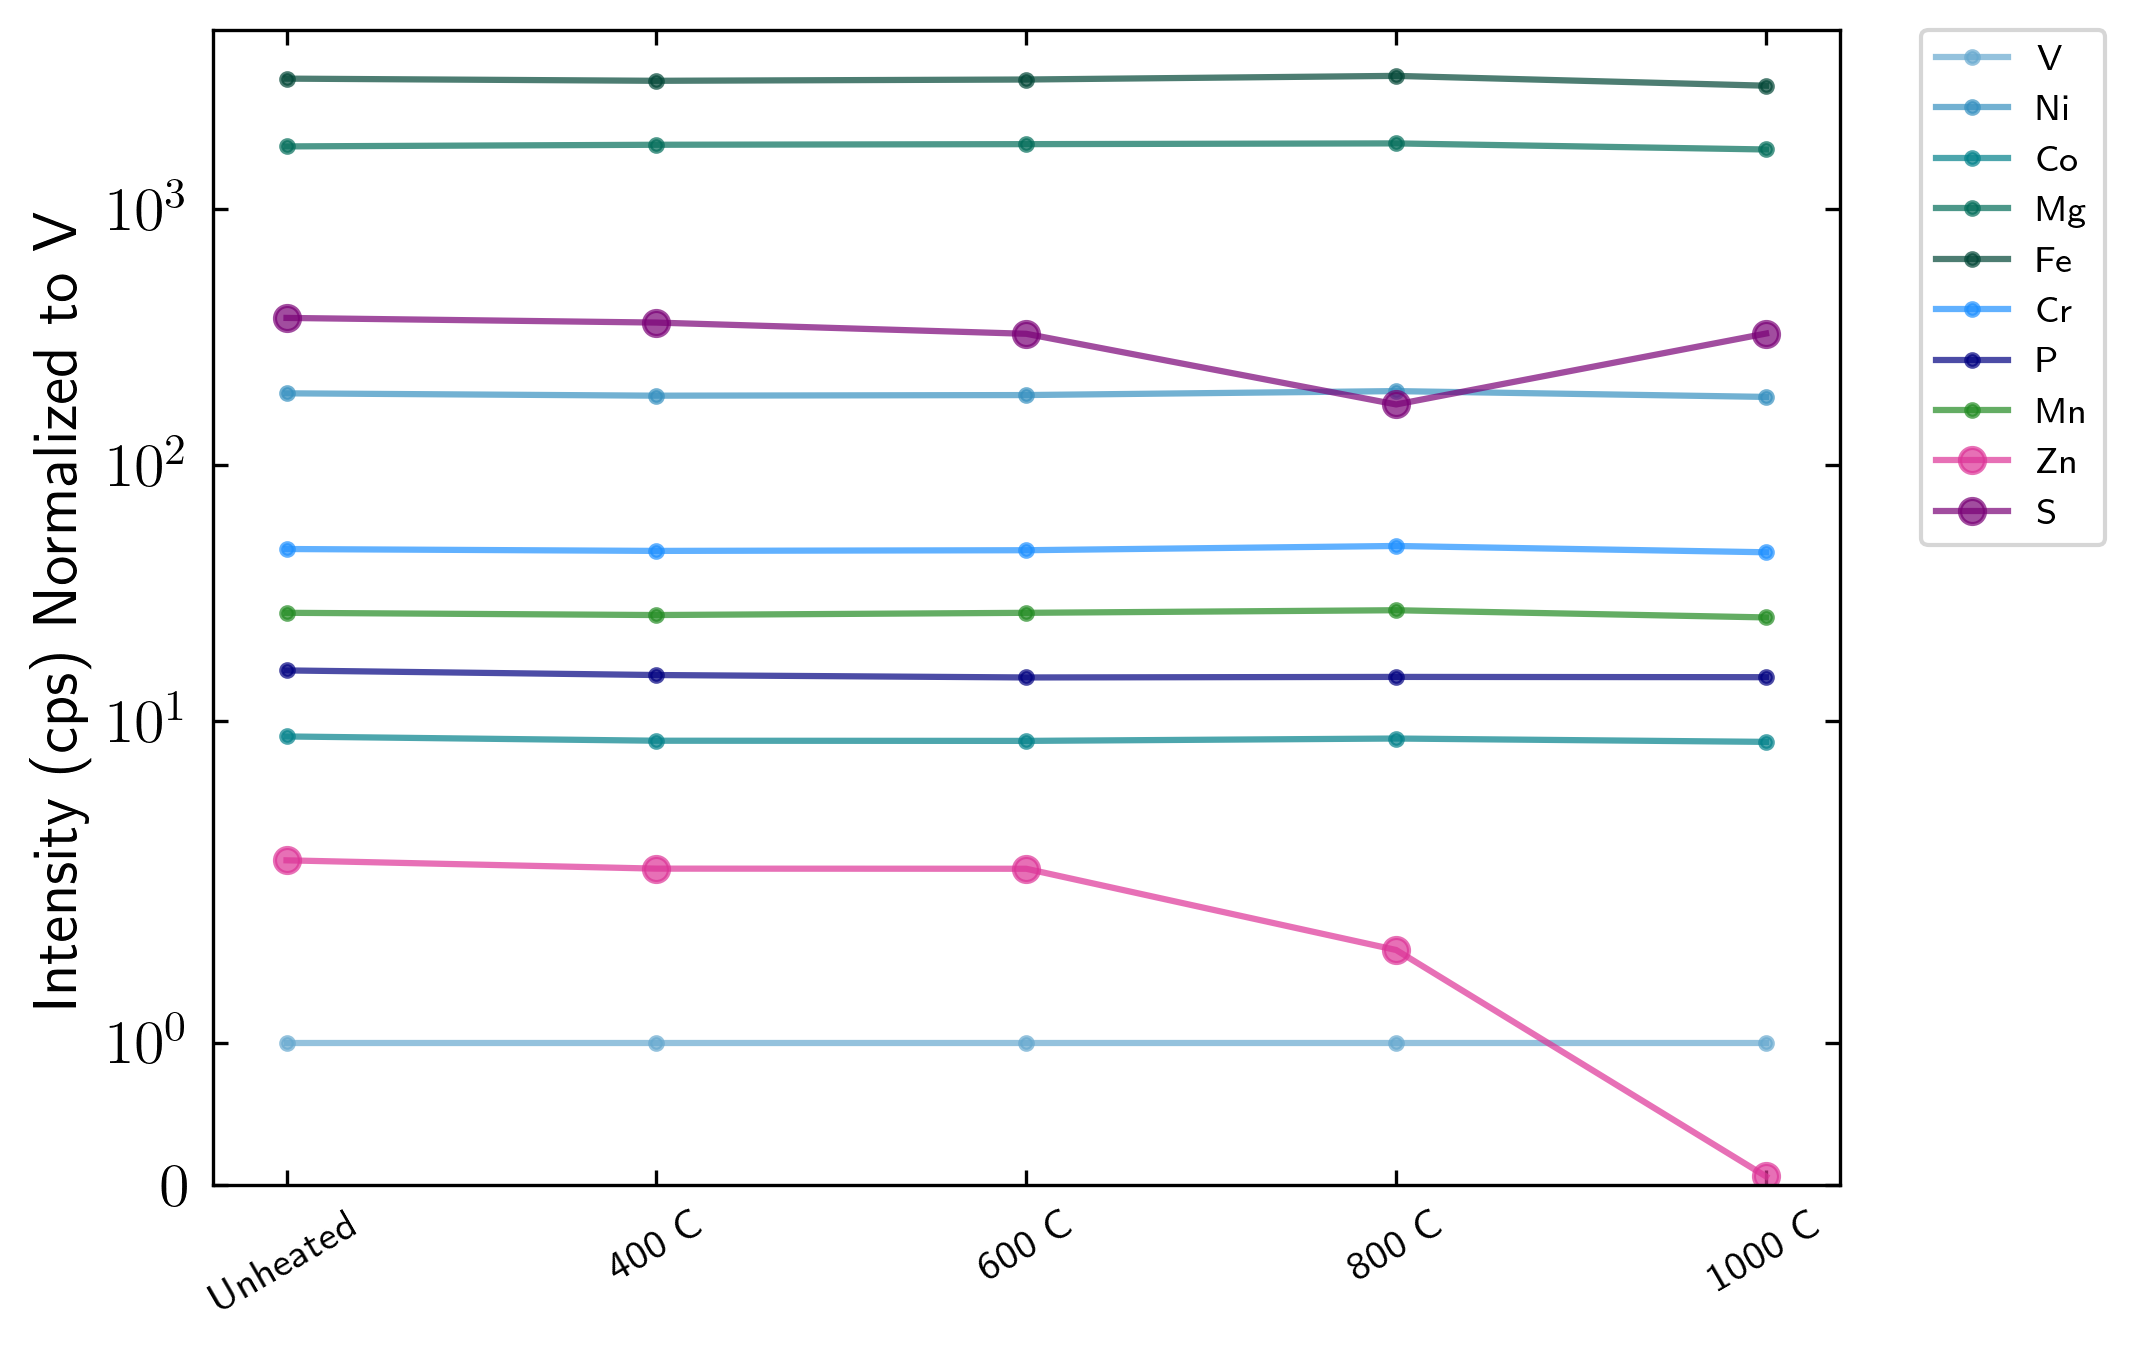

In [58]:
plot_results_raw(B_O2_normV, '', 'B_O2_NormV.jpg', 5000)
plot_results_raw(B_Ar_normV, '', 'B_Ar_NormV.jpg', 5000)

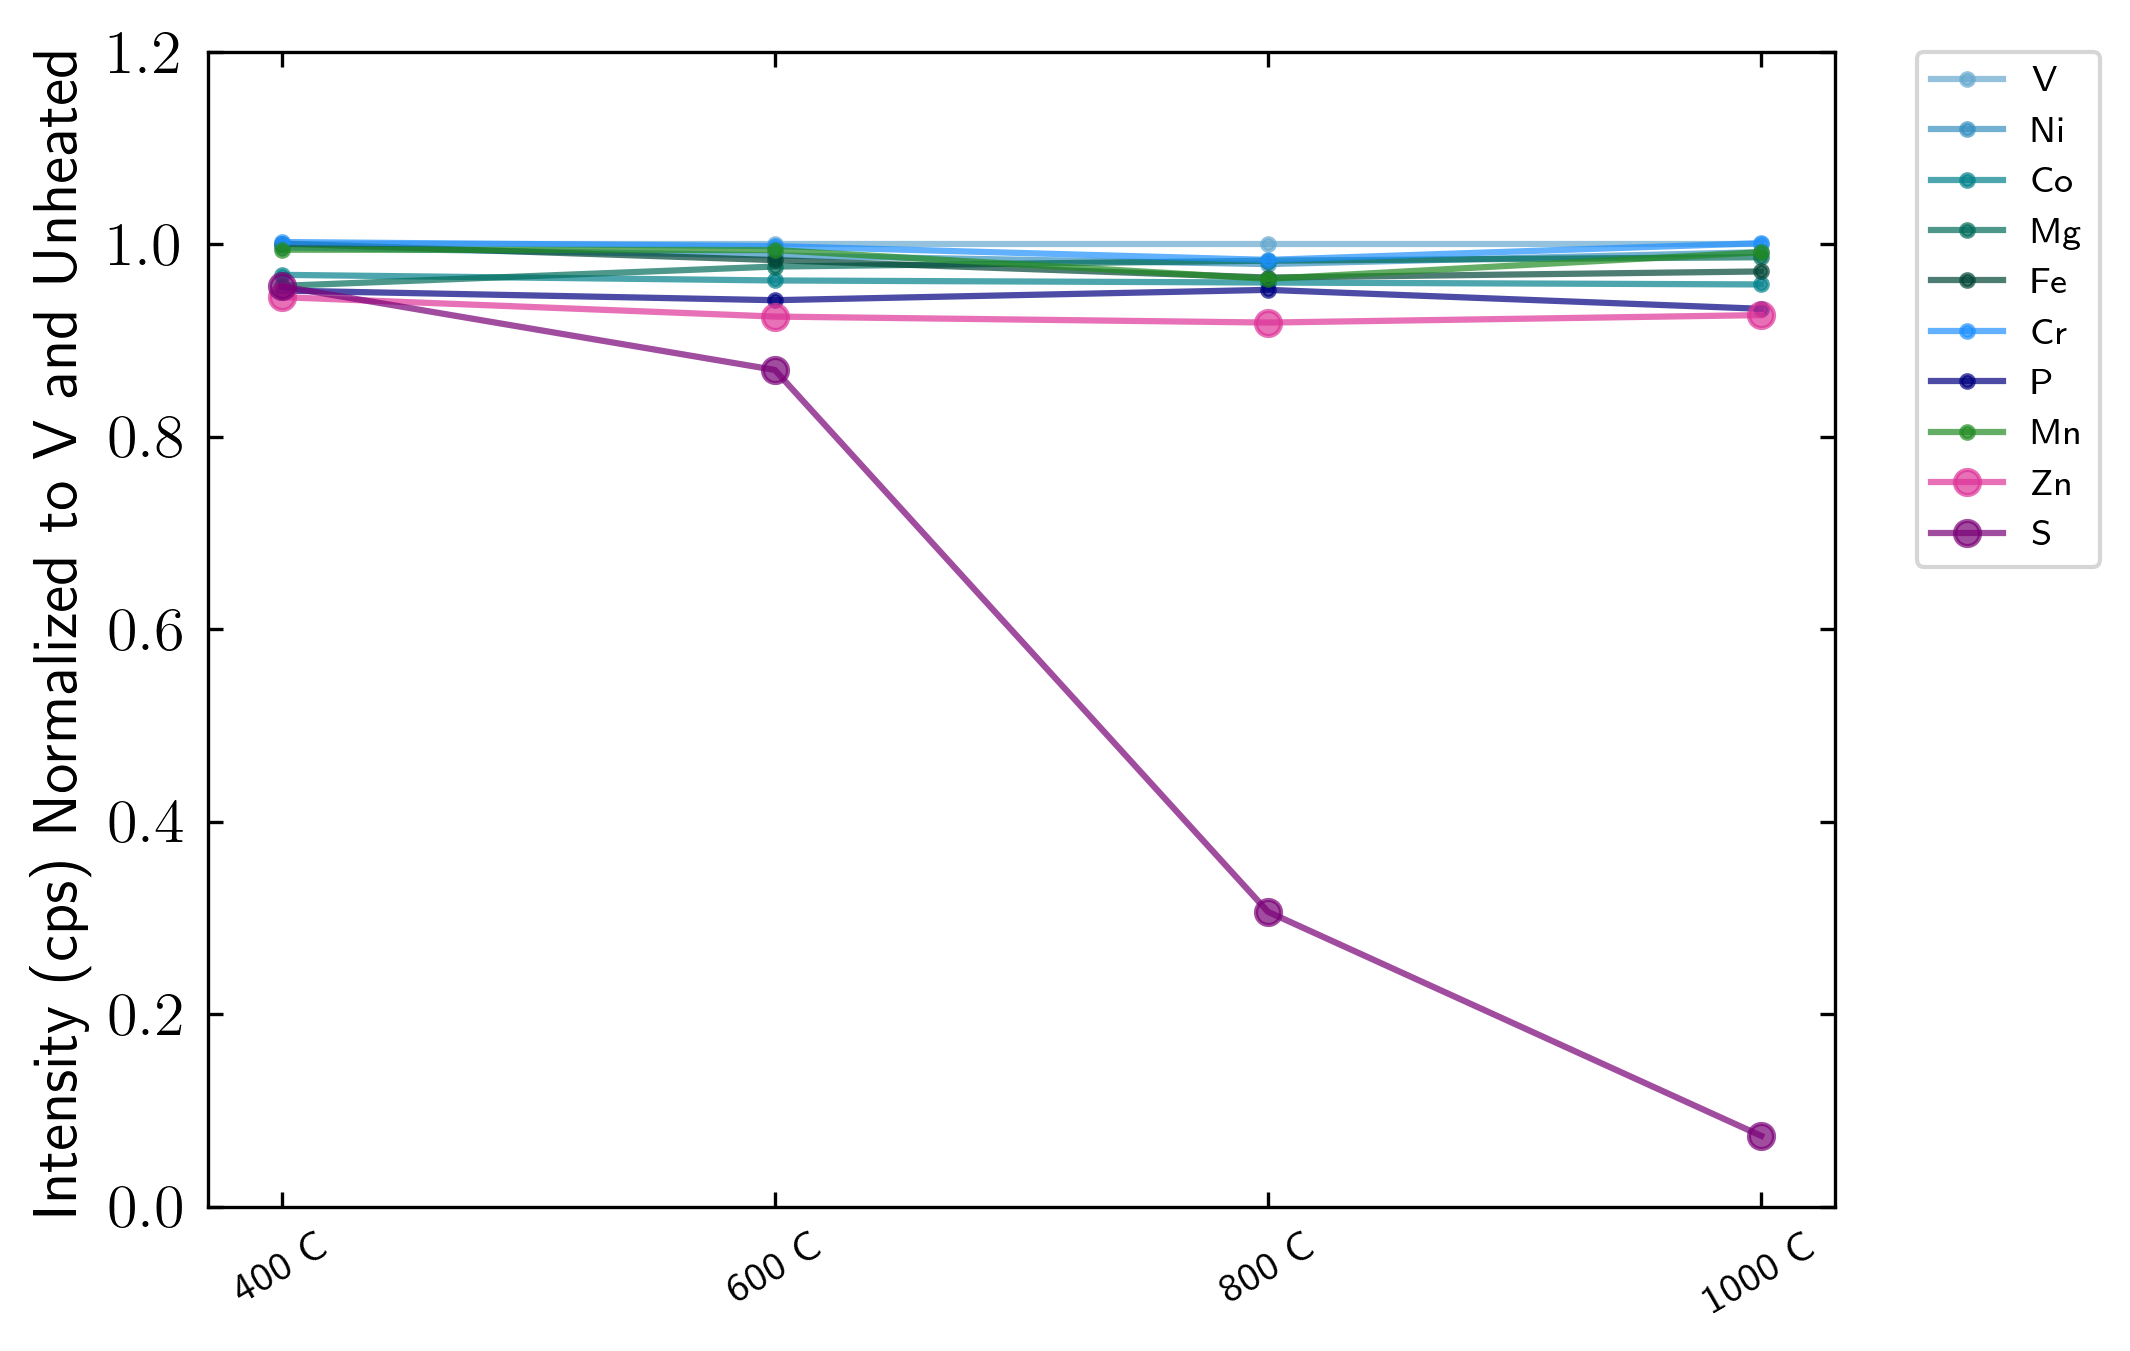

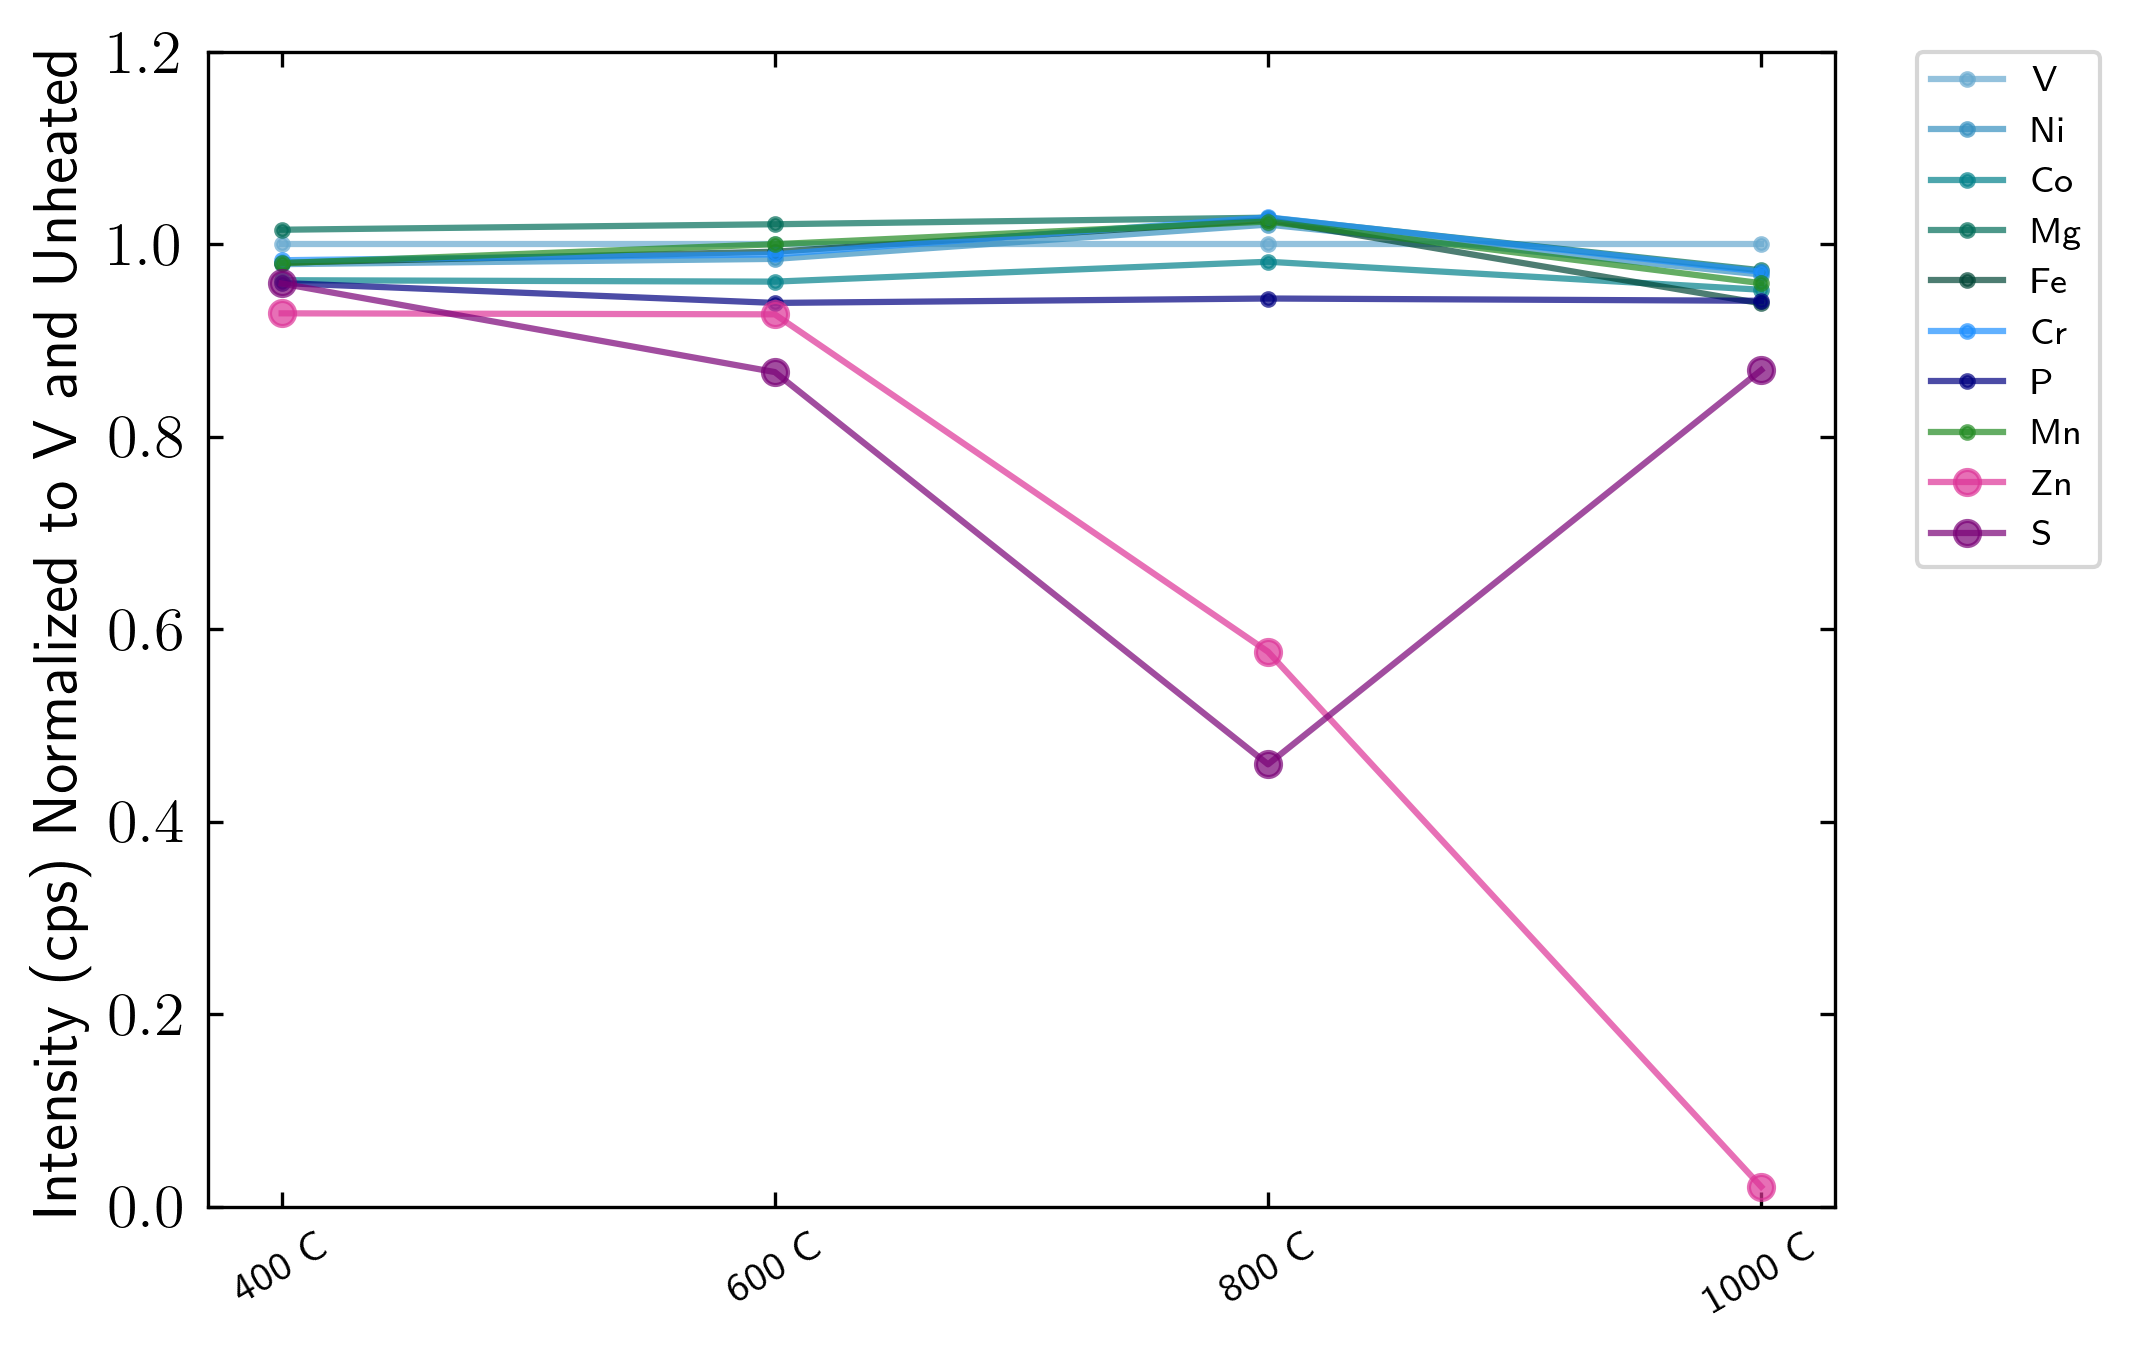

In [59]:

plot_results_raw_normUH(B_O2_normVUH, '', 'B_O2_NormVUH.jpg', 1.2)
plot_results_raw_normUH(B_Ar_normVUH, '', 'B_Ar_NormVUH.jpg', 1.2)

In [ ]:
fig,ax = plt.subplots()
plt.scatter(list(range(1,6)), ((raw_data_Snorm[:]['M_UH_1']+raw_data_Snorm[:]['M_UH_2'])/2.0, (raw_data_Snorm[:]['M_400_2']+raw_data_Snorm[:]['M_400_1'])/2, (raw_data_Snorm[:]['M_600_2']+raw_data_Snorm[:]['M_600_1'])/2, (raw_data_Snorm[:]['M_800_2']+raw_data_Snorm[:]['M_800_1'])/2, (raw_data_Snorm[:]['M_1000_2']+raw_data_Snorm[:]['M_1000_1'])/2))
plt.plot(list(range(1,6)), ((raw_data_Snorm[:]['M_UH_1']+raw_data_Snorm[:]['M_UH_2'])/2.0, (raw_data_Snorm[:]['M_400_2']+raw_data_Snorm[:]['M_400_1'])/2, (raw_data_Snorm[:]['M_600_2']+raw_data_Snorm[:]['M_600_1'])/2, (raw_data_Snorm[:]['M_800_2']+raw_data_Snorm[:]['M_800_1'])/2, (raw_data_Snorm[:]['M_1000_2']+raw_data_Snorm[:]['M_1000_1'])/2))

ax.set_xticks(list(range(1,6)))
ax.set_xticklabels(X_axis, rotation=30, fontsize=10)
plt.ylim(-0.1, 0.3)
plt.title('S/Mg Counts Atm Avg')
plt.ylabel('S/Mg Counts')
plt.show()

fig,ax = plt.subplots()
plt.scatter(list(range(1,6)), ((raw_data_Znnorm[:]['M_UH_1']+raw_data_Znnorm[:]['M_UH_2'])/2.0, (raw_data_Znnorm[:]['M_400_2']+raw_data_Znnorm[:]['M_400_1'])/2, (raw_data_Znnorm[:]['M_600_2']+raw_data_Znnorm[:]['M_600_1'])/2, (raw_data_Znnorm[:]['M_800_2']+raw_data_Znnorm[:]['M_800_1'])/2, (raw_data_Znnorm[:]['M_1000_2']+raw_data_Znnorm[:]['M_1000_1'])/2))
plt.plot(list(range(1,6)), ((raw_data_Znnorm[:]['M_UH_1']+raw_data_Znnorm[:]['M_UH_2'])/2.0, (raw_data_Znnorm[:]['M_400_2']+raw_data_Znnorm[:]['M_400_1'])/2, (raw_data_Znnorm[:]['M_600_2']+raw_data_Znnorm[:]['M_600_1'])/2, (raw_data_Znnorm[:]['M_800_2']+raw_data_Znnorm[:]['M_800_1'])/2, (raw_data_Znnorm[:]['M_1000_2']+raw_data_Znnorm[:]['M_1000_1'])/2))

ax.set_xticks(list(range(1,6)))
ax.set_xticklabels(X_axis, rotation=30, fontsize=10)
plt.ylim(-0.001, 0.004)
plt.ylabel('Zn/Mg Counts')
plt.title('Zn/Mg Counts Atm Avg')
plt.show()

In [60]:
df_norm_v2 = df_norm.T

In [61]:
#print(raw_df.M_1000_3)
#print(raw_df.Blank)
print((raw_df.M_UH_2/raw_df.Blank))
#print(df_norm_v2.M_UH_1 - df_norm_v2.Blank)

Na23          32.088913
Mg26        3773.929296
Al27         197.649395
P31          439.479022
S32           48.385902
Ca43          31.533296
Ti47         455.478117
V51          903.562134
Cr52         741.924045
Mn55         160.455196
Fe57        4264.842378
Co59        4839.867831
Ni61        5264.862775
Zn66          10.227286
In115          0.429430
K39_HR         0.490054
In115_HR       0.560669
dtype: float64


In [62]:
print(raw_df.Blank)
print(raw_df.BIR)

Na23        132961.4
Mg26          6576.7
Al27        120604.8
P31            388.5
S32         112313.8
Ca43          3073.9
Ti47           454.7
V51            307.4
Cr52         13759.4
Mn55         44071.1
Fe57          7411.4
Co59           784.6
Ni61           131.9
Zn66          6949.4
In115       422643.9
K39_HR       73815.0
In115_HR     72024.1
Name: Blank, dtype: float64
Na23         95330739.0
Mg26         30615111.9
Al27        388026179.3
P31             40789.7
S32             65842.7
Ca43          2303854.7
Ti47          5659355.5
V51           3846186.8
Cr52          3950375.5
Mn55         15203774.0
Fe57         30348364.9
Co59           982010.8
Ni61            28270.5
Zn66            75277.4
In115          390792.2
K39_HR          85570.4
In115_HR        74445.3
Name: BIR, dtype: float64


### Raw Data Uncertainty Analysis

In [63]:
unc_datafile = '/Users/maggiethompson/Desktop/UCSantaCruz/1stYearProjects/Experiments/HeatingExperiments/Data/ICPMS/210210_condrites_unc.csv'
                      
UncRawData = pd.read_csv(unc_datafile, skiprows=1, names=['Sample', 'Isotope', 'unit', 'Na23', 'Mg26', 'Al27', 'P31', 'S32', 'Ca43', 'Ti47', 'V51', 'Cr52', 'Mn55', 'Fe57', 'Co59', 'Ni61', 'Zn66', 'In115', 'K39_HR', 'In115_HR'])   

print(UncRawData)
print(X_compare_up)
print(Y)


                    Sample        Isotope unit  Na23  Mg26  Al27    P31   S32  \
0                  Blank_T  Intensity RSD  [%]  2.94  0.59  1.12   3.09  1.23   
1                    BIR_S  Intensity RSD  [%]  2.11  2.04  0.05   2.33  1.33   
2                    WPR_R  Intensity RSD  [%]  0.91  1.32  1.09   0.91  0.66   
3                    WMS_Q  Intensity RSD  [%]  0.47  0.85  0.81   1.28  1.20   
4                    BCR_P  Intensity RSD  [%]  1.16  0.55  0.69   0.46  0.90   
5                   BHVO_O  Intensity RSD  [%]  1.24  1.40  2.02   0.83  0.96   
6       Murchison_1000_3_N  Intensity RSD  [%]  3.12  0.45  0.52   0.50  0.46   
7        Murchison_800_3_M  Intensity RSD  [%]  0.90  0.51  0.54   1.06  0.34   
8        Murchison_600_3_L  Intensity RSD  [%]  0.55  0.80  0.56   1.59  0.68   
9        Murchison_400_3_K  Intensity RSD  [%]  0.86  0.89  0.84   1.41  1.19   
10      Murchison_1000_2_J  Intensity RSD  [%]  0.22  0.54  0.93   1.00  1.36   
11       Murchison_800_2_I  

In [64]:
#Step 1: Create dataframe of raw uncertainty data, RSD (%) (raw_df):
d_unc = []
for i in X:
    d_unc.append(UncRawData[i])
RSDuncraw_df = pd.DataFrame(data=d_unc)
RSDuncraw_df.columns=Y

#Step 2: Create dataframe of uncertainty (sigma):
MeteoriteSample_Names = ['M_1000_3', 'M_800_3', 'M_600_3', 'M_400_3', 'M_1000_2', 'M_800_2', 'M_600_2', 'M_400_2', 'M_1000_1', 'M_800_1', 'M_600_1', 'M_400_1', 'M_UH_2', 'M_UH_1'] 

#print(sig_df)
#print(RSDuncraw_df/100.0)
#print('--------')
#print(raw_df)
#print('--------')
sig_df = pd.DataFrame((RSDuncraw_df.values/100.0)*raw_df.values, columns=raw_df.columns, index=raw_df.index)
print(sig_df)


               Blank           BIR           WPR           WMS           BCR  \
Na23      3909.06516  2.011479e+06  2.771810e+04  1.115625e+04  1.618734e+06   
Mg26        38.80253  6.245483e+05  9.872219e+05  1.451114e+04  5.777083e+04   
Al27      1350.77376  1.940131e+05  1.319173e+06  4.909534e+05  2.092944e+06   
P31         12.00465  9.504000e+02  1.131899e+03  7.360294e+02  2.998766e+03   
S32       1381.45974  8.757079e+02  7.018696e+04  1.571609e+06  2.499593e+03   
Ca43        50.10457  3.962630e+04  3.687675e+03  2.603815e+03  1.557910e+04   
Ti47        54.65494  1.080937e+05  1.193561e+04  5.379551e+03  4.422997e+04   
V51         16.04628  9.423158e+04  8.667908e+03  7.407849e+03  3.041621e+04   
Cr52       199.51130  7.545217e+04  2.910812e+05  2.461580e+03  2.024447e+03   
Mn55      1084.14906  2.356585e+05  8.470848e+04  8.841308e+04  1.317191e+05   
Fe57       196.40210  6.676640e+05  2.941900e+05  9.786264e+05  1.837525e+05   
Co59        29.34404  2.710350e+04  4.16

In [65]:
#function to do it all in one
def unc_VUHnorm(Cx, Cv, UHx, UHv, uCx, uCv, uUHx, uUHv):
    Ratio = (Cx/Cv)/(UHx/UHv)
    Unc_quad = np.sqrt( ((uCx/Cx)**2) + ((uCv/Cv)**2) + ((uUHx/UHx)**2) + ((uUHv/UHv)**2) )
    Unc = Unc_quad * Ratio
    return Unc

def unc_ratio(V1, V2, unc_V1, unc_V2):
    Ratio = V1/V2
    unc_quad = np.sqrt( ((unc_V1/V1)**2) + ((unc_V2/V2)**2) )
    unc = Ratio * unc_quad
    return unc 

def unc_avg(unc_1, unc_2):
    avg_unc = np.sqrt((unc_1**2)+(unc_2**2))
    return avg_unc


In [66]:
#First Let's Calculate the Uncertainty on the Average of the Unheated Samples
UHavg_unc = []
for i in X_compare_up:
    unc_val = unc_avg(sig_df.M_UH_1[i], sig_df.M_UH_2[i])
    UHavg_unc.append(unc_val)
UHavg_unc_df = pd.DataFrame(data=UHavg_unc)
UHavg_unc_df = UHavg_unc_df.T
UHavg_unc_df.columns=X_compare_up
#print(UHavg_unc_df)

#Determine Uncertainty on Average of the Atmospheric Pressure Samples:
avg400_unc = []
for i in X_compare_up:
    unc_400 = unc_avg(sig_df.M_400_1[i], sig_df.M_400_2[i])
    avg400_unc.append(unc_400)
avg400_unc_df = pd.DataFrame(data=avg400_unc)
avg400_unc_df = avg400_unc_df.T
avg400_unc_df.columns=X_compare_up

avg600_unc = []
for i in X_compare_up:
    unc_600 = unc_avg(sig_df.M_600_1[i], sig_df.M_600_2[i])
    avg600_unc.append(unc_600)
avg600_unc_df = pd.DataFrame(data=avg600_unc)
avg600_unc_df = avg600_unc_df.T
avg600_unc_df.columns=X_compare_up

avg800_unc = []
for i in X_compare_up:
    unc_800 = unc_avg(sig_df.M_800_1[i], sig_df.M_800_2[i])
    avg800_unc.append(unc_800)
avg800_unc_df = pd.DataFrame(data=avg800_unc)
avg800_unc_df = avg800_unc_df.T
avg800_unc_df.columns=X_compare_up

avg1000_unc = []
for i in X_compare_up:
    unc_1000 = unc_avg(sig_df.M_1000_1[i], sig_df.M_1000_2[i])
    avg1000_unc.append(unc_1000)
avg1000_unc_df = pd.DataFrame(data=avg1000_unc)
avg1000_unc_df = avg1000_unc_df.T
avg1000_unc_df.columns=X_compare_up

#Sigma arrays for vacuum samples:

vac400_sig_unc = []
for i in X_compare_up:
    unc_400 = sig_df.M_400_3[i]
    vac400_sig_unc.append(unc_400)
vac400_sig_unc_df = pd.DataFrame(data=vac400_sig_unc)
vac400_sig_unc_df = vac400_sig_unc_df.T
vac400_sig_unc_df.columns=X_compare_up
print(vac400_sig_unc_df)

vac600_sig_unc = []
for i in X_compare_up:
    unc_600 = sig_df.M_600_3[i]
    vac600_sig_unc.append(unc_600)
vac600_sig_unc_df = pd.DataFrame(data=vac600_sig_unc)
vac600_sig_unc_df = vac600_sig_unc_df.T
vac600_sig_unc_df.columns=X_compare_up

vac800_sig_unc = []
for i in X_compare_up:
    unc_800 = sig_df.M_800_3[i]
    vac800_sig_unc.append(unc_800)
vac800_sig_unc_df = pd.DataFrame(data=vac800_sig_unc)
vac800_sig_unc_df = vac800_sig_unc_df.T
vac800_sig_unc_df.columns=X_compare_up

vac1000_sig_unc = []
for i in X_compare_up:
    unc_1000 = sig_df.M_1000_3[i]
    vac1000_sig_unc.append(unc_1000)
vac1000_sig_unc_df = pd.DataFrame(data=vac1000_sig_unc)
vac1000_sig_unc_df = vac1000_sig_unc_df.T
vac1000_sig_unc_df.columns=X_compare_up





          V51        Ni61        Co59          Mg26        Fe57         Cr52  \
0  1893.93534  4956.66993  22225.6827  155554.32549  46027.0327  109812.0639   

          P31        Mn55      Zn66          S32  
0  1623.29493  39528.9364  90.60881  46071.68538  


In [67]:
#Doing it in pieces, first R1: Ratio of Unheated Element Concentration/Unheated Concentration of V:
UHavg_normV_unc = []
for i in X_compare_up:
    unc_normV_val = unc_ratio(rawdat_atm['UH'][i], rawdat_atm['UH']['V51'], UHavg_unc_df[i], UHavg_unc_df['V51'])
    UHavg_normV_unc.append(unc_normV_val)
UHavg_normV_unc_df = pd.DataFrame(data=UHavg_normV_unc)
UHavg_normV_unc_df = UHavg_normV_unc_df.T
UHavg_normV_unc_df.columns=X_compare_up
#print(UHavg_normV_unc_df)

#R2: Ratio of Heated Element Concentration/Heated Concentration of V:

atm400_normV_unc = []
for i in X_compare_up:
    unc_normV_400 = unc_ratio(rawdat_atm['400'][i], rawdat_atm['400']['V51'], avg400_unc_df[i], avg400_unc_df['V51'])
    atm400_normV_unc.append(unc_normV_400)
atm400_normV_unc_df = pd.DataFrame(data=atm400_normV_unc)
atm400_normV_unc_df = atm400_normV_unc_df.T
atm400_normV_unc_df.columns=X_compare_up

#print(atm400_normV_unc_df)

#R3: total ratio: R1/R2

atm400_normVUH_unc = []
for i in X_compare_up:
    unc_normVUH_400 = unc_ratio(rawdat_normV_atm[i]['400'], rawdat_normV_atm[i]['UH'], UHavg_normV_unc_df[i], atm400_normV_unc_df[i])
    atm400_normVUH_unc.append(unc_normVUH_400)
atm400_normVUH_unc_df = pd.DataFrame(data=atm400_normVUH_unc)
atm400_normVUH_unc_df = atm400_normVUH_unc_df.T
atm400_normVUH_unc_df.columns=X_compare_up

print(atm400_normVUH_unc_df)



        V51      Ni61      Co59      Mg26     Fe57      Cr52       P31  \
0  0.046255  0.044272  0.037543  0.042337  0.03828  0.041837  0.039658   

      Mn55      Zn66       S32  
0  0.03803  0.060278  0.043685  


In [68]:
#Uncertainty on the V normalized samples at atmospheric pressure and unheated samples:

UH_V_unc =[]
for i in X_compare_up:
    unc_UH_V = unc_ratio(rawdat_atm['UH'][i], rawdat_atm['UH']['V51'], UHavg_unc_df[i], UHavg_unc_df['V51'])
    UH_V_unc.append(unc_UH_V)
UH_V_unc_df = pd.DataFrame(data=UH_V_unc)
UH_V_unc_df = UH_V_unc_df.T
UH_V_unc_df.columns=X_compare_up

atm400_V_unc = []
for i in X_compare_up:
    unc_400_V = unc_ratio(rawdat_atm['400'][i], rawdat_atm['400']['V51'], avg400_unc_df[i], avg400_unc_df['V51'])
    atm400_V_unc.append(unc_400_V)
atm400_V_unc_df = pd.DataFrame(data=atm400_V_unc)
atm400_V_unc_df = atm400_V_unc_df.T
atm400_V_unc_df.columns=X_compare_up

atm600_V_unc = []
for i in X_compare_up:
    unc_600_V = unc_ratio(rawdat_atm['600'][i], rawdat_atm['600']['V51'], avg600_unc_df[i], avg600_unc_df['V51'])
    atm600_V_unc.append(unc_600_V)
atm600_V_unc_df = pd.DataFrame(data=atm600_V_unc)
atm600_V_unc_df = atm600_V_unc_df.T
atm600_V_unc_df.columns=X_compare_up

atm800_V_unc = []
for i in X_compare_up:
    unc_800_V = unc_ratio(rawdat_atm['800'][i], rawdat_atm['800']['V51'], avg800_unc_df[i], avg800_unc_df['V51'])
    atm800_V_unc.append(unc_800_V)
atm800_V_unc_df = pd.DataFrame(data=atm800_V_unc)
atm800_V_unc_df = atm800_V_unc_df.T
atm800_V_unc_df.columns=X_compare_up

atm1000_V_unc = []
for i in X_compare_up:
    unc_1000_V = unc_ratio(rawdat_atm['1000'][i], rawdat_atm['1000']['V51'], avg1000_unc_df[i], avg1000_unc_df['V51'])
    atm1000_V_unc.append(unc_1000_V)
atm1000_V_unc_df = pd.DataFrame(data=atm1000_V_unc)
atm1000_V_unc_df = atm1000_V_unc_df.T
atm1000_V_unc_df.columns=X_compare_up

print(atm400_V_unc_df)
print('---------')
print(atm600_V_unc_df)
print('---------')
print(atm800_V_unc_df)
print('---------')
print(atm1000_V_unc_df)

#Put into one dataframe:

atm_V_sigunc_frames = [UH_V_unc_df, atm400_V_unc_df, atm600_V_unc_df, atm800_V_unc_df, atm1000_V_unc_df]
atm_V_sigunc_df = pd.concat(atm_V_sigunc_frames)
atm_V_sigunc_df.index=['UH', '400', '600', '800', '1000']

print(atm_V_sigunc_df)



        V51     Ni61      Co59      Mg26      Fe57      Cr52      P31  \
0  0.030613  0.08143  0.329159  2.809666  2.868086  0.968474  0.01577   

       Mn55      Zn66       S32  
0  0.686164  0.011377  0.627704  
---------
        V51      Ni61      Co59      Mg26     Fe57      Cr52       P31  \
0  0.015643  0.062198  0.234664  1.246742  1.96487  0.665977  0.008683   

       Mn55      Zn66       S32  
0  0.435946  0.006073  0.324787  
---------
        V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
0  0.033188  0.065493  0.395112  2.341324  3.350004  1.508013  0.018982   

       Mn55      Zn66       S32  
0  0.782444  0.012161  0.192747  
---------
        V51      Ni61      Co59      Mg26     Fe57     Cr52       P31  \
0  0.025644  0.052134  0.289734  1.689255  2.96633  1.20022  0.015082   

       Mn55      Zn66       S32  
0  0.655866  0.007068  0.017326  
           V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
UH    0.034676  0.074429  

In [69]:
#Uncertainty on the V normalized samples under Vacuum:

UH_V_unc =[]
for i in X_compare_up:
    unc_UH_V = unc_ratio(rawdat_atm['UH'][i], rawdat_atm['UH']['V51'], UHavg_unc_df[i], UHavg_unc_df['V51'])
    UH_V_unc.append(unc_UH_V)
UH_V_unc_df = pd.DataFrame(data=UH_V_unc)
UH_V_unc_df = UH_V_unc_df.T
UH_V_unc_df.columns=X_compare_up

vac400_V_unc = []
for i in X_compare_up:
    unc_400_V = unc_ratio(rawdat_vac['400'][i], rawdat_vac['400']['V51'], vac400_sig_unc_df[i], vac400_sig_unc_df['V51'])
    vac400_V_unc.append(unc_400_V)
vac400_V_unc_df = pd.DataFrame(data=vac400_V_unc)
vac400_V_unc_df = vac400_V_unc_df.T
vac400_V_unc_df.columns=X_compare_up

vac600_V_unc = []
for i in X_compare_up:
    unc_600_V = unc_ratio(rawdat_vac['600'][i], rawdat_vac['600']['V51'], vac600_sig_unc_df[i], vac600_sig_unc_df['V51'])
    vac600_V_unc.append(unc_600_V)
vac600_V_unc_df = pd.DataFrame(data=vac600_V_unc)
vac600_V_unc_df = vac600_V_unc_df.T
vac600_V_unc_df.columns=X_compare_up

vac800_V_unc = []
for i in X_compare_up:
    unc_800_V = unc_ratio(rawdat_vac['800'][i], rawdat_vac['800']['V51'], vac800_sig_unc_df[i], vac800_sig_unc_df['V51'])
    vac800_V_unc.append(unc_800_V)
vac800_V_unc_df = pd.DataFrame(data=vac800_V_unc)
vac800_V_unc_df = vac800_V_unc_df.T
vac800_V_unc_df.columns=X_compare_up

vac1000_V_unc = []
for i in X_compare_up:
    unc_1000_V = unc_ratio(rawdat_vac['1000'][i], rawdat_vac['1000']['V51'], vac1000_sig_unc_df[i], vac1000_sig_unc_df['V51'])
    vac1000_V_unc.append(unc_1000_V)
vac1000_V_unc_df = pd.DataFrame(data=vac1000_V_unc)
vac1000_V_unc_df = vac1000_V_unc_df.T
vac1000_V_unc_df.columns=X_compare_up

print(vac400_V_unc_df)
print('---------')
print(vac600_V_unc_df)
print('---------')
print(vac800_V_unc_df)
print('---------')
print(vac1000_V_unc_df)

#Put into one dataframe:

vac_V_sigunc_frames = [UH_V_unc_df, vac400_V_unc_df, vac600_V_unc_df, vac800_V_unc_df, vac1000_V_unc_df]
vac_V_sigunc_df = pd.concat(vac_V_sigunc_frames)
vac_V_sigunc_df.index=['UH', '400', '600', '800', '1000']

print(vac_V_sigunc_df)


        V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
0  0.014001  0.037021  0.178346  1.216238  1.109079  0.682389  0.010368   

       Mn55      Zn66      S32  
0  0.323923  0.002799  0.31327  
---------
        V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
0  0.011172  0.028584  0.155238  0.951587  0.881163  0.484927  0.010264   

       Mn55      Zn66       S32  
0  0.255562  0.003149  0.183753  
---------
        V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
0  0.013435  0.028044  0.185332  0.928225  1.393263  0.508827  0.008339   

       Mn55      Zn66       S32  
0  0.236008  0.000298  0.123679  
---------
        V51      Ni61      Co59     Mg26      Fe57      Cr52       P31  \
0  0.007354  0.025509  0.071721  0.58793  0.635996  0.269471  0.003911   

       Mn55      Zn66       S32  
0  0.189673  0.000407  0.003201  
           V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
UH    0.034676  0.07

In [73]:
#Uncertainty on the V and UH normalized samples at atmospheric pressure:

atm400_unc = []
for i in X_compare_up:
    unc_400 = unc_VUHnorm(rawdat_atm['400'][i], rawdat_atm['400']['V51'], rawdat_atm['UH'][i], rawdat_atm['UH']['V51'], avg400_unc_df[i], avg400_unc_df['V51'], UHavg_unc_df[i], UHavg_unc_df['V51'])
    atm400_unc.append(unc_400)
atm400_unc_df = pd.DataFrame(data=atm400_unc)
atm400_unc_df = atm400_unc_df.T
atm400_unc_df.columns=X_compare_up

atm600_unc = []
for i in X_compare_up:
    unc_600 = unc_VUHnorm(rawdat_atm['600'][i], rawdat_atm['600']['V51'], rawdat_atm['UH'][i], rawdat_atm['UH']['V51'], avg600_unc_df[i], avg600_unc_df['V51'], UHavg_unc_df[i], UHavg_unc_df['V51'])
    atm600_unc.append(unc_600)
atm600_unc_df = pd.DataFrame(data=atm600_unc)
atm600_unc_df = atm600_unc_df.T
atm600_unc_df.columns=X_compare_up

atm800_unc = []
for i in X_compare_up:
    unc_800 = unc_VUHnorm(rawdat_atm['800'][i], rawdat_atm['800']['V51'], rawdat_atm['UH'][i], rawdat_atm['UH']['V51'], avg800_unc_df[i], avg800_unc_df['V51'], UHavg_unc_df[i], UHavg_unc_df['V51'])
    atm800_unc.append(unc_800)
atm800_unc_df = pd.DataFrame(data=atm800_unc)
atm800_unc_df = atm800_unc_df.T
atm800_unc_df.columns=X_compare_up

atm1000_unc = []
for i in X_compare_up:
    unc_1000 = unc_VUHnorm(rawdat_atm['1000'][i], rawdat_atm['1000']['V51'], rawdat_atm['UH'][i], rawdat_atm['UH']['V51'], avg1000_unc_df[i], avg1000_unc_df['V51'], UHavg_unc_df[i], UHavg_unc_df['V51'])
    atm1000_unc.append(unc_1000)
atm1000_unc_df = pd.DataFrame(data=atm1000_unc)
atm1000_unc_df = atm1000_unc_df.T
atm1000_unc_df.columns=X_compare_up

print(atm400_unc_df)
print('---------')
print(atm600_unc_df)
print('---------')
print(atm800_unc_df)
print('---------')
print(atm1000_unc_df)

#Put into one dataframe:

atm_sigunc_frames = [atm400_unc_df, atm600_unc_df, atm800_unc_df, atm1000_unc_df]
atm_sigunc_df = pd.concat(atm_sigunc_frames)
atm_sigunc_df.index=['400', '600', '800', '1000']

print(atm_sigunc_df)




        V51      Ni61     Co59      Mg26     Fe57      Cr52      P31  \
0  0.046255  0.044103  0.03734  0.042295  0.03802  0.041925  0.03955   

       Mn55      Zn66       S32  
0  0.037904  0.056426  0.043195  
---------
        V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
0  0.038041  0.039127  0.033292  0.031653  0.033432  0.037375  0.033208   

       Mn55      Zn66       S32  
0  0.031895  0.042281  0.031086  
---------
        V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
0  0.047998  0.039663  0.040656  0.038379  0.040841  0.052619  0.042818   

       Mn55      Zn66       S32  
0  0.040811  0.058888  0.012846  
---------
        V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
0  0.043128  0.036806  0.036092  0.033025  0.038613  0.046545  0.038757   

       Mn55      Zn66       S32  
0  0.037258  0.044831  0.001283  
           V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
400   0.046255  0.0441

In [70]:
print(rawdat_vac['400']['Na23'])
print(avg400_unc_df)
print(vac400_sig_unc_df)

2235304.0
          V51          Ni61          Co59           Mg26           Fe57  \
0  5101.78106  14117.027148  35749.315035  473378.901837  364805.468411   

            Cr52          P31          Mn55         Zn66            S32  
0  123757.762631  1947.731266  96214.576328  2224.003931  101485.957755  
          V51        Ni61        Co59          Mg26        Fe57         Cr52  \
0  1893.93534  4956.66993  22225.6827  155554.32549  46027.0327  109812.0639   

          P31        Mn55      Zn66          S32  
0  1623.29493  39528.9364  90.60881  46071.68538  


In [74]:
#Uncertainty on the V and UH normalized samples at vacuum pressure:

vac400_unc = []
for i in X_compare_up:
    unc_400 = unc_VUHnorm(rawdat_vac['400'][i], rawdat_vac['400']['V51'], rawdat_vac['UH'][i], rawdat_vac['UH']['V51'], vac400_sig_unc_df[i], vac400_sig_unc_df['V51'], UHavg_unc_df[i], UHavg_unc_df['V51'])
    vac400_unc.append(unc_400)
vac400_unc_df = pd.DataFrame(data=vac400_unc)
vac400_unc_df = vac400_unc_df.T
vac400_unc_df.columns=X_compare_up

vac600_unc = []
for i in X_compare_up:
    unc_600 = unc_VUHnorm(rawdat_vac['600'][i], rawdat_vac['600']['V51'], rawdat_vac['UH'][i], rawdat_vac['UH']['V51'], vac600_sig_unc_df[i], vac600_sig_unc_df['V51'], UHavg_unc_df[i], UHavg_unc_df['V51'])
    vac600_unc.append(unc_600)
vac600_unc_df = pd.DataFrame(data=vac600_unc)
vac600_unc_df = vac600_unc_df.T
vac600_unc_df.columns=X_compare_up

vac800_unc = []
for i in X_compare_up:
    unc_800 = unc_VUHnorm(rawdat_vac['800'][i], rawdat_vac['800']['V51'], rawdat_vac['UH'][i], rawdat_vac['UH']['V51'], vac800_sig_unc_df[i], vac800_sig_unc_df['V51'], UHavg_unc_df[i], UHavg_unc_df['V51'])
    vac800_unc.append(unc_800)
vac800_unc_df = pd.DataFrame(data=vac800_unc)
vac800_unc_df = vac800_unc_df.T
vac800_unc_df.columns=X_compare_up

vac1000_unc = []
for i in X_compare_up:
    unc_1000 = unc_VUHnorm(rawdat_vac['1000'][i], rawdat_vac['1000']['V51'], rawdat_vac['UH'][i], rawdat_vac['UH']['V51'], vac1000_sig_unc_df[i], vac1000_sig_unc_df['V51'], UHavg_unc_df[i], UHavg_unc_df['V51'])
    vac1000_unc.append(unc_1000)
vac1000_unc_df = pd.DataFrame(data=vac1000_unc)
vac1000_unc_df = vac1000_unc_df.T
vac1000_unc_df.columns=X_compare_up

print(vac400_unc_df)
print('---------')
print(vac600_unc_df)
print('---------')
print(vac800_unc_df)
print('---------')
print(vac1000_unc_df)

#Combine into one dataframe:

vac_sigunc_frames = [vac400_unc_df, vac600_unc_df, vac800_unc_df, vac1000_unc_df]
vac_sigunc_df = pd.concat(vac_sigunc_frames)
vac_sigunc_df.index=['400', '600', '800', '1000']



        V51     Ni61      Co59      Mg26      Fe57     Cr52      P31  \
0  0.037396  0.03468  0.031772  0.031605  0.029581  0.03726  0.03378   

       Mn55     Zn66       S32  
0  0.029283  0.03505  0.032231  
---------
        V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
0  0.036431  0.030939  0.030056  0.028492  0.027626  0.034056  0.032697   

       Mn55      Zn66       S32  
0  0.027259  0.026317  0.026152  
---------
        V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
0  0.037187  0.032165  0.031539  0.028818  0.029558  0.034984  0.031576   

       Mn55      Zn66       S32  
0  0.027445  0.001865  0.018111  
---------
        V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
0  0.035447  0.031516  0.028985  0.027499  0.027408  0.033476  0.027169   

       Mn55      Zn66      S32  
0  0.027028  0.001951  0.00066  


In [75]:
print(atm400_unc_df.columns)
rawdat_normVUH_atm.loc['400',].values

Index(['V51', 'Ni61', 'Co59', 'Mg26', 'Fe57', 'Cr52', 'P31', 'Mn55', 'Zn66',
       'S32'],
      dtype='object')


array([0.63837459, 1.01319823, 0.99193252, 1.0119766 , 1.07257542,
       0.96915031, 0.98474719, 1.        , 1.03091157, 1.00674564,
       0.98819836, 0.98900204, 1.0188789 , 1.17405715, 1.41602119,
       1.33421549, 1.35314413])

In [76]:
##Go from sigma back to RSD:
#ATMOSPHERIC PRESSURE
print('----ATM----')
RSD_normVUH_400atm_df = pd.DataFrame((atm400_unc_df.values/rawdat_normVUH_atm_select.loc['400',:].values)*100.0, columns=atm400_unc_df.columns, index=atm400_unc_df.index)
print(RSD_normVUH_400atm_df)
print('-------')
RSD_normVUH_600atm_df = pd.DataFrame((atm600_unc_df.values/rawdat_normVUH_atm_select.loc['600',:].values)*100.0, columns=atm600_unc_df.columns, index=atm600_unc_df.index)
print(RSD_normVUH_600atm_df)
print('-------')

RSD_normVUH_800atm_df = pd.DataFrame((atm800_unc_df.values/rawdat_normVUH_atm_select.loc['800',:].values)*100.0, columns=atm800_unc_df.columns, index=atm800_unc_df.index)
print(RSD_normVUH_800atm_df)
print('-------')

RSD_normVUH_1000atm_df = pd.DataFrame((atm1000_unc_df.values/rawdat_normVUH_atm_select.loc['1000',:].values)*100.0, columns=atm1000_unc_df.columns, index=atm1000_unc_df.index)
print(RSD_normVUH_1000atm_df)
print('-------')




----ATM----
        V51      Ni61      Co59      Mg26      Fe57      Cr52      P31  \
0  4.625525  4.328552  3.775555  4.174377  3.847404  4.066768  3.90821   

       Mn55      Zn66       S32  
0  3.765014  4.806076  4.027247  
-------
       V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
0  3.80408  3.818176  3.395332  3.114263  3.396432  3.631073  3.328736   

       Mn55      Zn66       S32  
0  3.159971  3.712192  3.228318  
-------
        V51      Ni61      Co59      Mg26      Fe57      Cr52      P31  \
0  4.799823  3.914505  4.113856  3.823763  4.177426  5.081334  4.30789   

       Mn55      Zn66       S32  
0  4.038551  5.115676  4.164858  
-------
        V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
0  4.312822  3.562872  3.577785  3.399562  3.911495  4.453724  3.854136   

       Mn55      Zn66       S32  
0  3.667237  3.847616  3.775974  
-------


In [77]:
print('---VACUUM-----')
#VACUUM PRESSURE
RSD_normVUH_400vac_df = pd.DataFrame((vac400_unc_df.values/rawdat_normVUH_vac_select.loc['400',:].values)*100.0, columns=vac400_unc_df.columns, index=vac400_unc_df.index)
print(RSD_normVUH_400vac_df)
print('-------')
RSD_normVUH_600vac_df = pd.DataFrame((vac600_unc_df.values/rawdat_normVUH_vac_select.loc['600',:].values)*100.0, columns=vac600_unc_df.columns, index=vac600_unc_df.index)
print(RSD_normVUH_600vac_df)
print('-------')

RSD_normVUH_800vac_df = pd.DataFrame((vac800_unc_df.values/rawdat_normVUH_vac_select.loc['800',:].values)*100.0, columns=vac800_unc_df.columns, index=vac800_unc_df.index)
print(RSD_normVUH_800vac_df)
print('-------')

RSD_normVUH_1000vac_df = pd.DataFrame((vac1000_unc_df.values/rawdat_normVUH_vac_select.loc['1000',:].values)*100.0, columns=vac1000_unc_df.columns, index=vac1000_unc_df.index)
print(RSD_normVUH_1000vac_df)
print('-------')

---VACUUM-----
        V51      Ni61     Co59      Mg26      Fe57      Cr52       P31  \
0  3.739552  3.268704  3.19327  3.097116  3.081945  3.663541  3.475389   

       Mn55     Zn66       S32  
0  2.960906  3.24276  3.148237  
-------
       V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
0  3.64311  3.182209  3.145254  3.013944  3.031505  3.443996  3.501794   

       Mn55      Zn66       S32  
0  2.868535  3.481484  2.932466  
-------
        V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
0  3.718743  3.155416  3.224444  2.997053  3.196708  3.457335  3.336922   

       Mn55      Zn66       S32  
0  2.833543  3.934183  2.920759  
-------
        V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
0  3.544693  3.126072  2.962768  2.879653  2.972582  3.252959  3.102816   

       Mn55      Zn66       S32  
0  2.774585  5.262283  2.827326  
-------


In [78]:
def unc_avg_allels(e1, e2, e3, e4, e5, e6, e7, e8, e9, e10):
    avg_unc = np.sqrt((e1**2)+(e2**2)+(e3**2)+(e4**2)+(e5**2)+(e6**2)+(e7**2)+(e8**2)+(e9**2)+(e10**2))
    return avg_unc

def unc_avg_exps(exp400, exp600, exp800, exp1000):
    avg_unc = np.sqrt((exp400**2)+(exp600**2)+(exp800**2)+(exp1000**2))
    return avg_unc


In [79]:
#Atmospheric Pressure (average over all elements):

atm_400unc = unc_avg_allels(atm400_unc_df['Mg26'], atm400_unc_df['P31'], atm400_unc_df['S32'], atm400_unc_df['V51'], atm400_unc_df['Cr52'], atm400_unc_df['Mn55'], atm400_unc_df['Fe57'], atm400_unc_df['Co59'], atm400_unc_df['Ni61'], atm400_unc_df['Zn66'])
atm_600unc = unc_avg_allels(atm600_unc_df['Mg26'], atm600_unc_df['P31'], atm600_unc_df['S32'], atm600_unc_df['V51'], atm600_unc_df['Cr52'], atm600_unc_df['Mn55'], atm600_unc_df['Fe57'], atm600_unc_df['Co59'], atm600_unc_df['Ni61'], atm600_unc_df['Zn66'])
atm_800unc = unc_avg_allels(atm800_unc_df['Mg26'], atm800_unc_df['P31'], atm800_unc_df['S32'], atm800_unc_df['V51'], atm800_unc_df['Cr52'], atm800_unc_df['Mn55'], atm800_unc_df['Fe57'], atm800_unc_df['Co59'], atm800_unc_df['Ni61'], atm800_unc_df['Zn66'])
atm_1000unc = unc_avg_allels(atm1000_unc_df['Mg26'], atm1000_unc_df['P31'], atm1000_unc_df['S32'], atm1000_unc_df['V51'], atm1000_unc_df['Cr52'], atm1000_unc_df['Mn55'], atm1000_unc_df['Fe57'], atm1000_unc_df['Co59'], atm1000_unc_df['Ni61'], atm1000_unc_df['Zn66'])

print(atm_400unc)
print(atm_600unc)
print(atm_800unc)
print(atm_1000unc)

#Vacuum Pressure (average over all elements):
vac_400unc = unc_avg_allels(vac400_unc_df['Mg26'], vac400_unc_df['P31'], vac400_unc_df['S32'], vac400_unc_df['V51'], vac400_unc_df['Cr52'], vac400_unc_df['Mn55'], vac400_unc_df['Fe57'], vac400_unc_df['Co59'], vac400_unc_df['Ni61'], vac400_unc_df['Zn66'])
vac_600unc = unc_avg_allels(vac600_unc_df['Mg26'], vac600_unc_df['P31'], vac600_unc_df['S32'], vac600_unc_df['V51'], vac600_unc_df['Cr52'], vac600_unc_df['Mn55'], vac600_unc_df['Fe57'], vac600_unc_df['Co59'], vac600_unc_df['Ni61'], vac600_unc_df['Zn66'])
vac_800unc = unc_avg_allels(vac800_unc_df['Mg26'], vac800_unc_df['P31'], vac800_unc_df['S32'], vac800_unc_df['V51'], vac800_unc_df['Cr52'], vac800_unc_df['Mn55'], vac800_unc_df['Fe57'], vac800_unc_df['Co59'], vac800_unc_df['Ni61'], vac800_unc_df['Zn66'])
vac_1000unc = unc_avg_allels(vac1000_unc_df['Mg26'], vac1000_unc_df['P31'], vac1000_unc_df['S32'], vac1000_unc_df['V51'], vac1000_unc_df['Cr52'], vac1000_unc_df['Mn55'], vac1000_unc_df['Fe57'], vac1000_unc_df['Co59'], vac1000_unc_df['Ni61'], vac1000_unc_df['Zn66'])
print('')
print(vac_400unc)
print(vac_600unc)
print(vac_800unc)
print(vac_1000unc)




0    0.136094
dtype: float64
0    0.1117
dtype: float64
0    0.136277
dtype: float64
0    0.119026
dtype: float64

0    0.10554
dtype: float64
0    0.095453
dtype: float64
0    0.091772
dtype: float64
0    0.084799
dtype: float64


In [80]:
#Average over all 4 heating experiments:
atm_avgunc=unc_avg_exps(atm_400unc, atm_600unc, atm_800unc, atm_1000unc)
vac_avgunc = unc_avg_exps(vac_400unc, vac_600unc, vac_800unc, vac_1000unc)



In [81]:
#ATM: RSD for Average over all elements:
RSD_normVUH_400atm_allels = ((atm_400unc/np.mean(rawdat_normVUH_atm_select.loc['400',:]))*100.0)
print(RSD_normVUH_400atm_allels)

RSD_normVUH_600atm_allels = ((atm_600unc/np.mean(rawdat_normVUH_atm_select.loc['600',:]))*100.0)
print(RSD_normVUH_600atm_allels)

RSD_normVUH_800atm_allels = ((atm_800unc/np.mean(rawdat_normVUH_atm_select.loc['800',:]))*100.0)
print(RSD_normVUH_800atm_allels)

RSD_normVUH_1000atm_allels = ((atm_1000unc/np.mean(rawdat_normVUH_atm_select.loc['1000',:]))*100.0)
print(RSD_normVUH_1000atm_allels)
print('----------')

#VACUUM: RSD for Average over all elemts:
RSD_normVUH_400vac_allels = ((vac_400unc/np.mean(rawdat_normVUH_vac_select.loc['400',:]))*100.0)
print(RSD_normVUH_400vac_allels)

RSD_normVUH_600vac_allels = ((vac_600unc/np.mean(rawdat_normVUH_vac_select.loc['600',:]))*100.0)
print(RSD_normVUH_600vac_allels)

RSD_normVUH_800vac_allels = ((vac_800unc/np.mean(rawdat_normVUH_vac_select.loc['800',:]))*100.0)
print(RSD_normVUH_800vac_allels)

RSD_normVUH_1000vac_allels = ((vac_1000unc/np.mean(rawdat_normVUH_vac_select.loc['1000',:]))*100.0)
print(RSD_normVUH_1000vac_allels)

0    13.205916
dtype: float64
0    11.011288
dtype: float64
0    14.371484
dtype: float64
0    12.845112
dtype: float64
----------
0    10.430022
dtype: float64
0    10.258182
dtype: float64
0    10.824829
dtype: float64
0    10.867865
dtype: float64


In [82]:
#RSD ATM: Average over all elements and heating experiments
atm_400_avgels = np.mean(rawdat_normVUH_atm_select.loc['400',:])
atm_600_avgels = np.mean(rawdat_normVUH_atm_select.loc['600',:])
atm_800_avgels = np.mean(rawdat_normVUH_atm_select.loc['800',:])
atm_1000_avgels = np.mean(rawdat_normVUH_atm_select.loc['1000',:])


RSD_normVUH_400atm_ALL = ((atm_avgunc/np.mean((atm_400_avgels, atm_600_avgels, atm_800_avgels, atm_1000_avgels)))*100.0)
print(RSD_normVUH_400atm_ALL)

#RSD VAC: Average over all elements and heating experiments
vac_400_avgels = np.mean(rawdat_normVUH_vac_select.loc['400',:])
vac_600_avgels = np.mean(rawdat_normVUH_vac_select.loc['600',:])
vac_800_avgels = np.mean(rawdat_normVUH_vac_select.loc['800',:])
vac_1000_avgels = np.mean(rawdat_normVUH_vac_select.loc['1000',:])

RSD_normVUH_400vac_ALL = ((vac_avgunc/np.mean((vac_400_avgels, vac_600_avgels, vac_800_avgels, vac_1000_avgels)))*100.0)
print(RSD_normVUH_400vac_ALL)





0    25.762499
dtype: float64
0    21.215785
dtype: float64


### Plots with Uncertainties

In [83]:
def plot_results_raw_normUH_withunc(file, fileunc, title, savetitle, yupperlim):
    fig, ax = plt.subplots()
    plt.errorbar(list(range(1,5)), file.V51, yerr=fileunc.V51, linestyle='-',marker='.', alpha=0.7, color='#67a9cf', label='V')
    plt.errorbar(list(range(1,5)), file.Ni61, yerr=fileunc.Ni61, linestyle='-',marker='.', alpha=0.7, color='#3690c0', label='Ni')
    plt.errorbar(list(range(1,5)), file.Co59, yerr=fileunc.Co59, linestyle='-',marker='.', alpha=0.7, color='#02818a', label='Co')
    plt.errorbar(list(range(1,5)), file.Mg26, yerr=fileunc.Mg26, linestyle='-',marker='.', alpha=0.7, color='#016c59', label='Mg')
    plt.errorbar(list(range(1,5)), file.Fe57, yerr=fileunc.Fe57, linestyle='-',marker='.', alpha=0.7, color='#014636', label='Fe')
    plt.errorbar(list(range(1,5)), file.Cr52, yerr=fileunc.Cr52,linestyle='-', marker='.',alpha=0.7, color='dodgerblue', label='Cr')
    plt.errorbar(list(range(1,5)), file.P31, yerr=fileunc.P31,linestyle='-', marker='.',alpha=0.7, color='navy', label='P')
    plt.errorbar(list(range(1,5)), file.Mn55, yerr=fileunc.Mn55, linestyle='-', marker='.', alpha=0.7, color='forestgreen', label='Mn')
    plt.errorbar(list(range(1,5)), file.Zn66, yerr=fileunc.Zn66, linestyle='-', marker='.', alpha=0.7, color='#dd3497', label='Zn')
    plt.errorbar(list(range(1,5)), file.S32, yerr=fileunc.S32, linestyle='-', marker='.', alpha=0.7, color='#7a0177', label='S')
    plt.errorbar(1.5, 0.4, yerr=np.max(UH_reldiff), linestyle='-', linewidth=3, color='orangered', label='UH')
    ax.tick_params(top=True, right=True)
    #plt.yscale('symlog')
    plt.ylim(0,yupperlim)
    ax.set_xticks(list(range(1,5)))
    ax.set_xticklabels(X_axis_normUH, rotation=30, fontsize=10)
    plt.ylabel('Intensity (cps) Normalized to V and Unheated')
    plt.legend(fontsize='xx-small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    #plt.title(title)
    plt.savefig(savetitle, dpi=1000, bbox_inches='tight')
    plt.show()
    

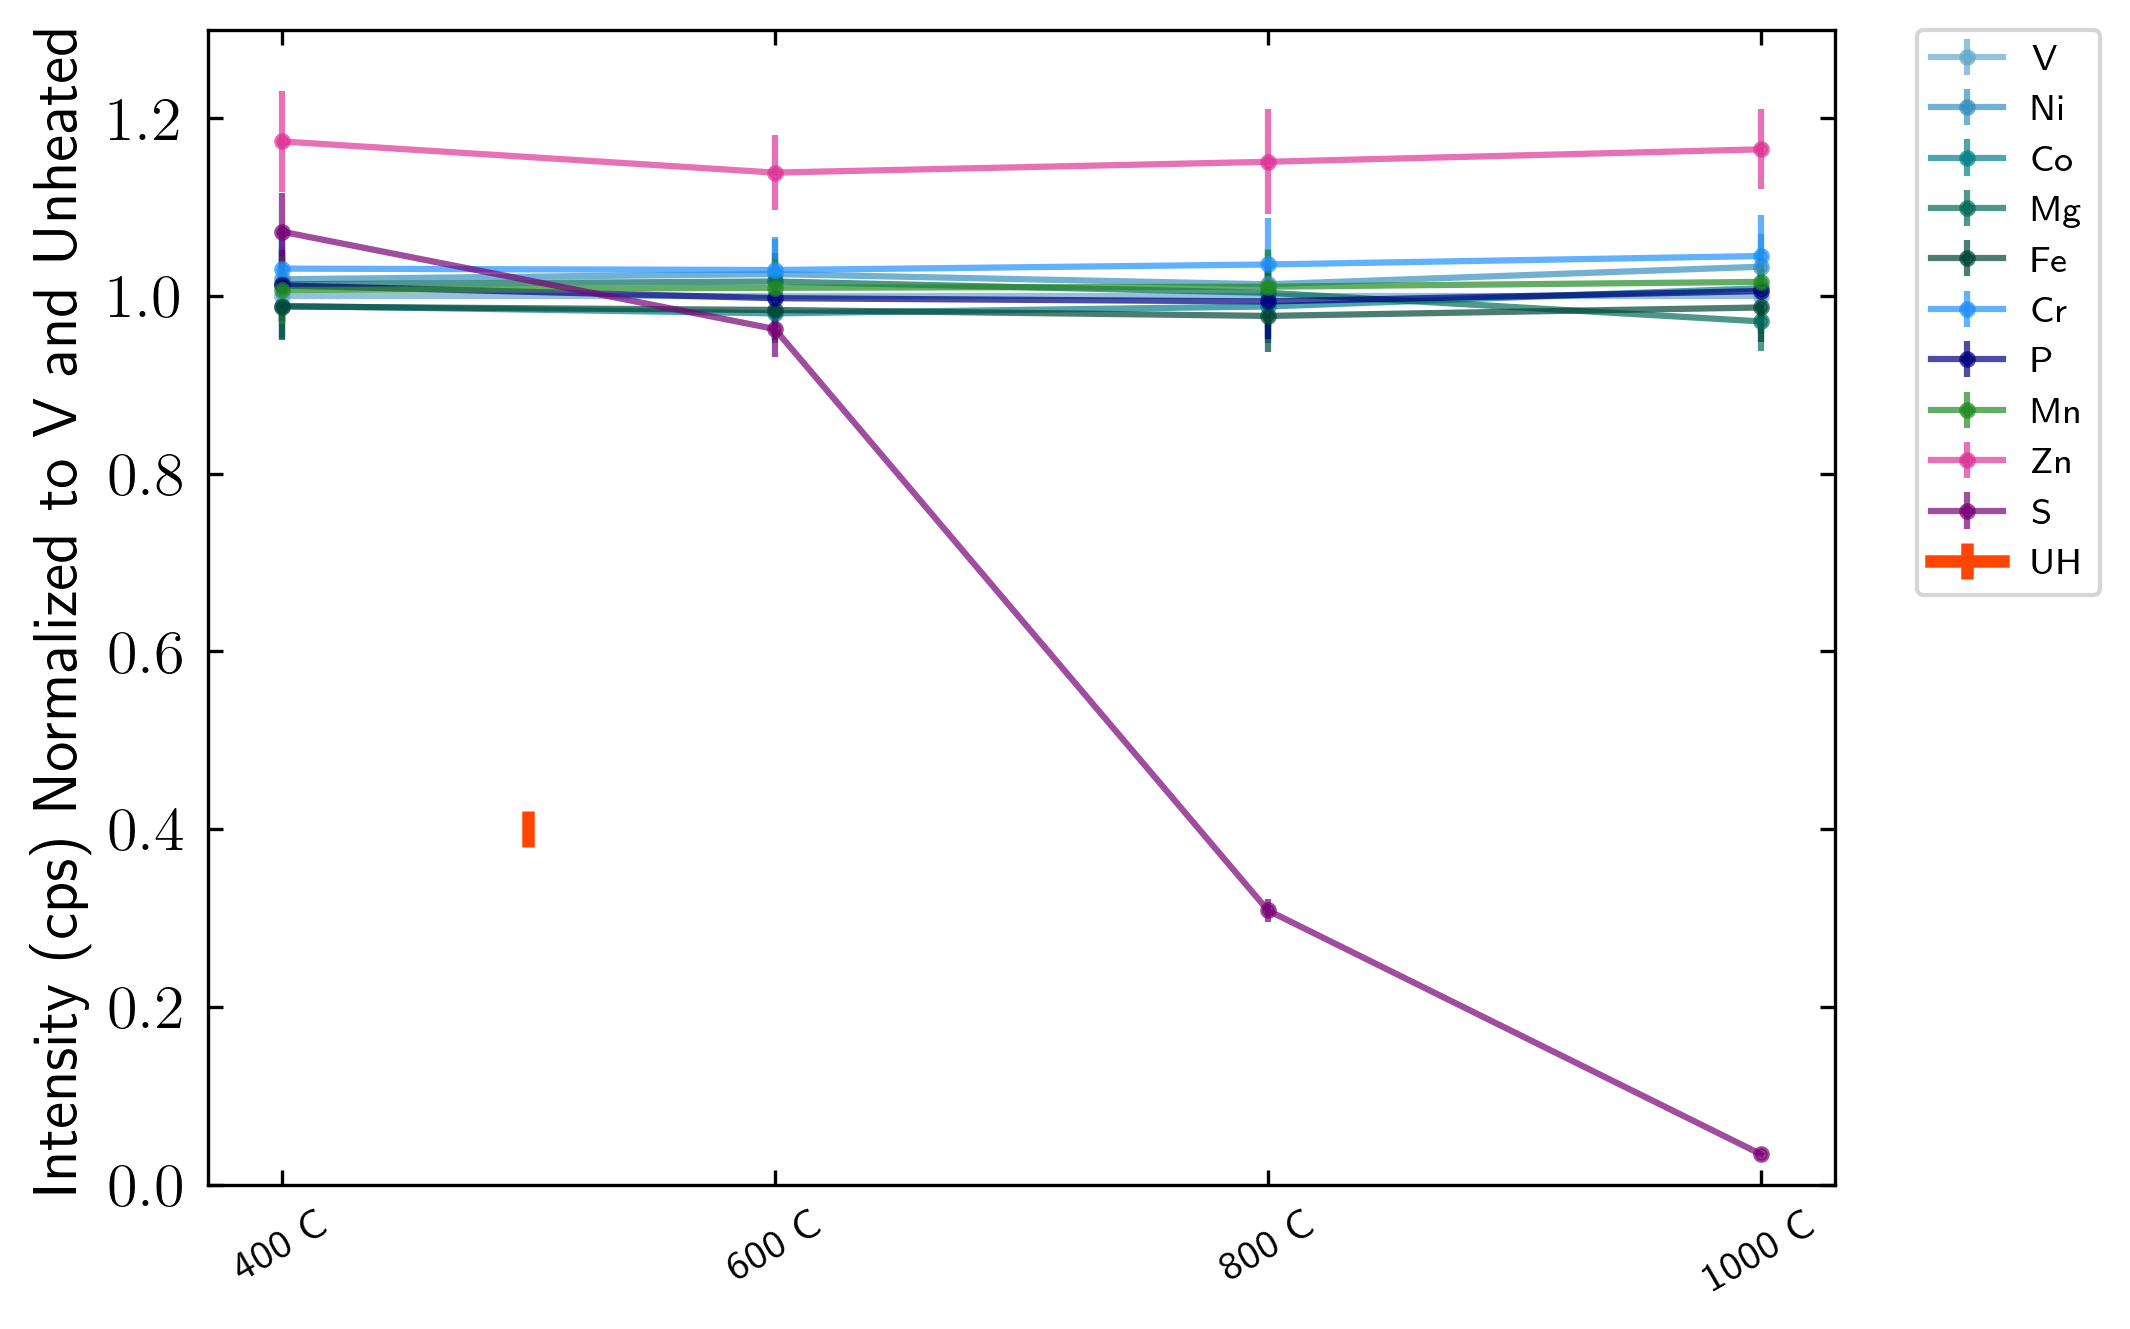

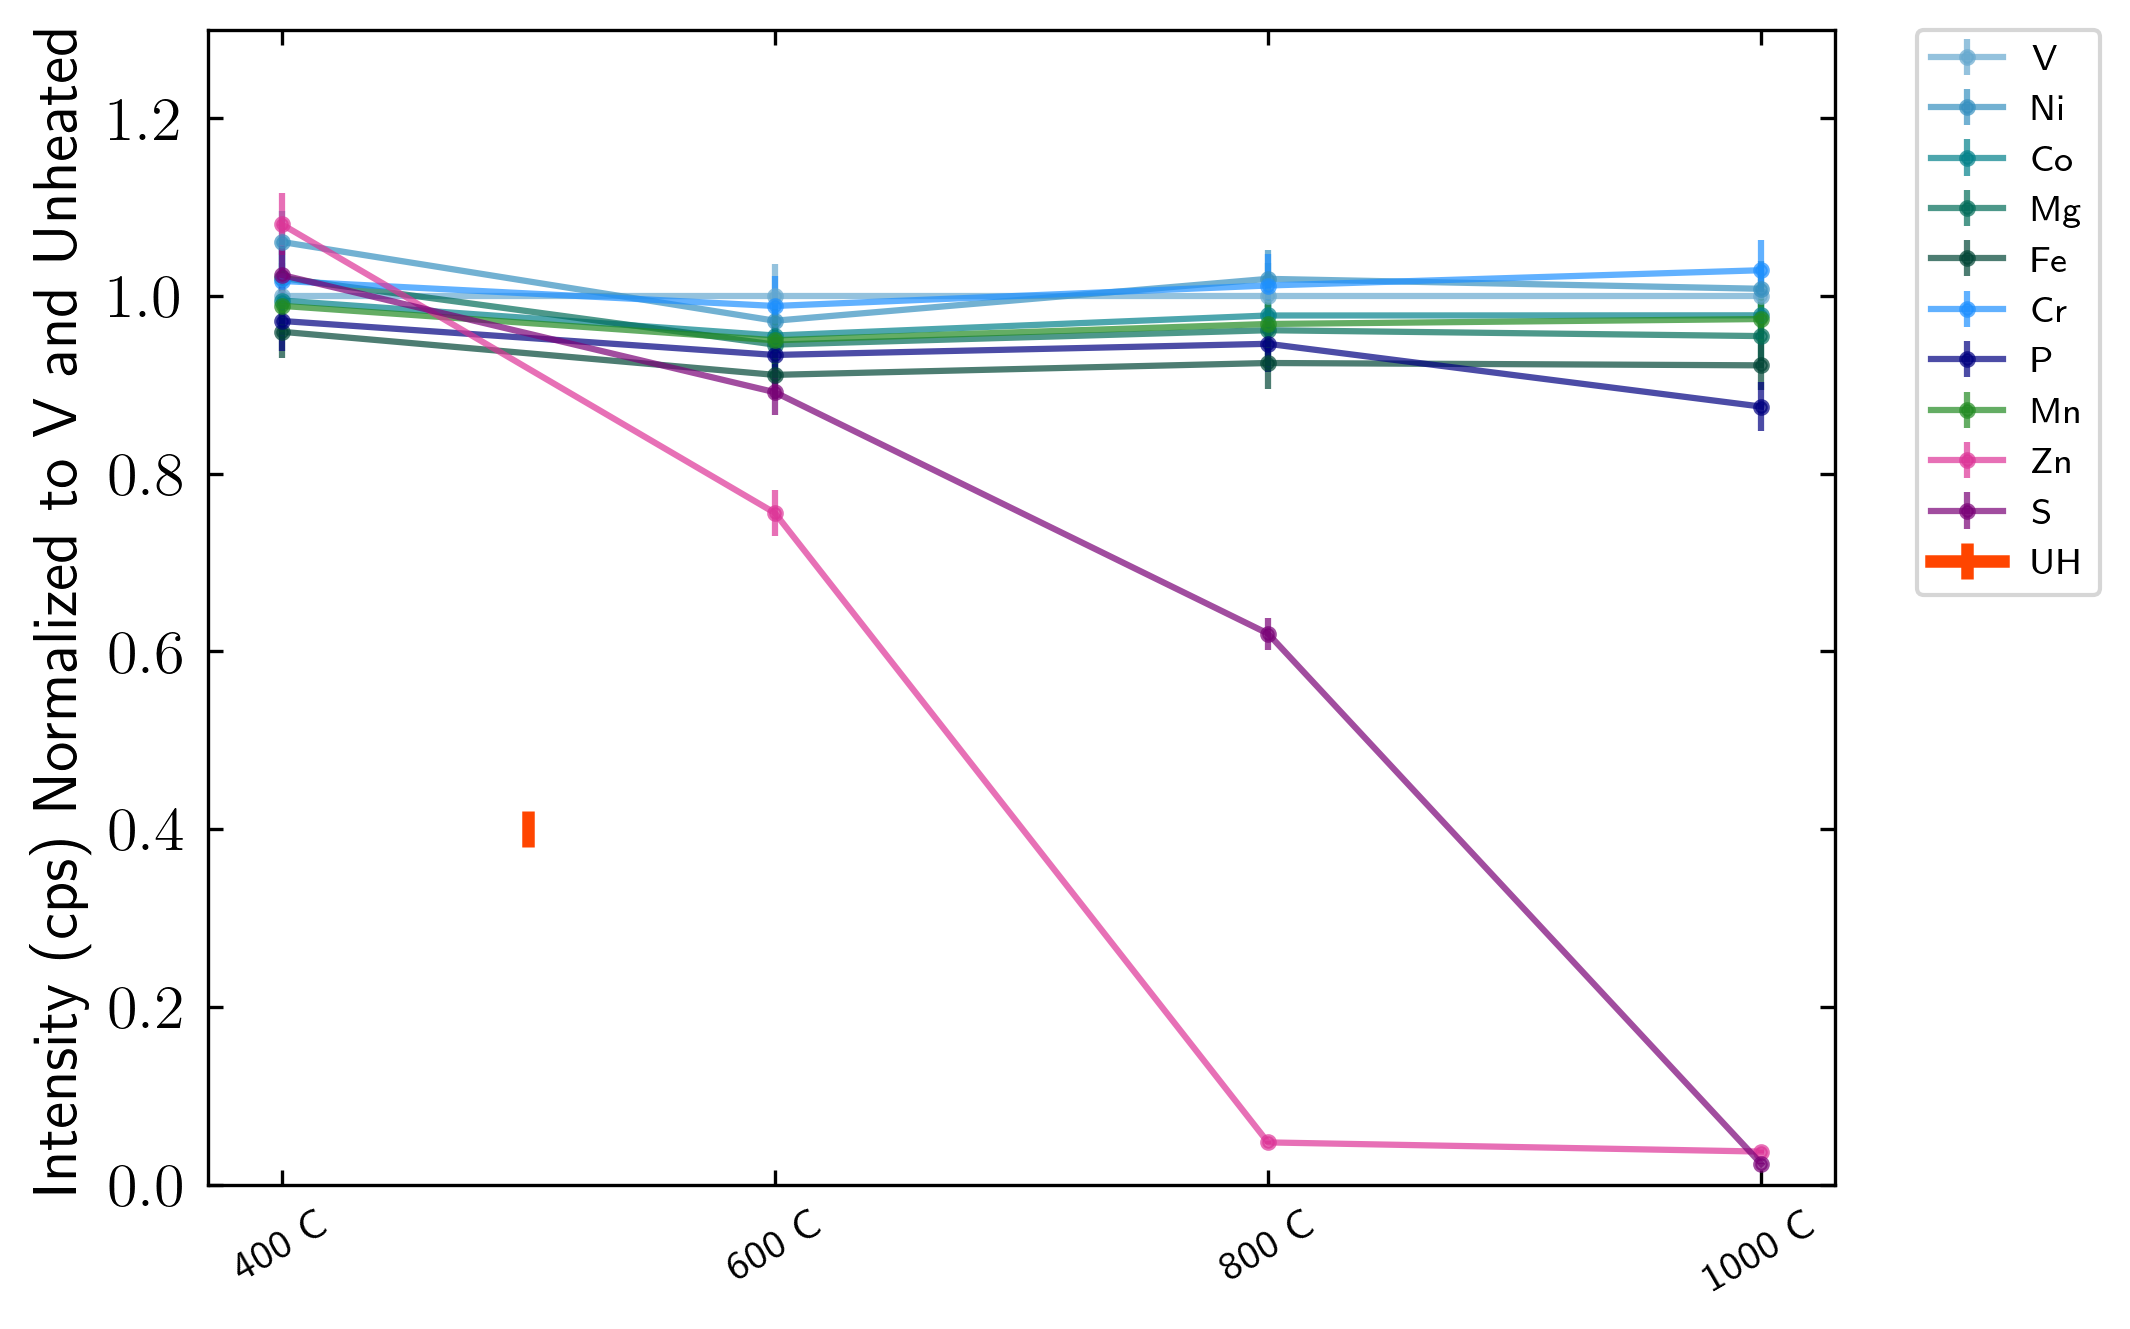

In [84]:
plot_results_raw_normUH_withunc(rawdat_normVUH_atm, atm_sigunc_df, '', 'RawDat_NormVUH_Atm_withunc.jpg', 1.3)
plot_results_raw_normUH_withunc(rawdat_normVUH_vac, vac_sigunc_df, '', 'RawDat_NormVUH_Vac_withunc.jpg', 1.3)

In [85]:
def plot_results_raw_withunc(file, fileunc, title, savetitle, yupperlim):
    fig, ax = plt.subplots()
    plt.errorbar(list(range(1,6)), file.V51, yerr=fileunc.V51, linestyle='-',marker='.', alpha=0.7, color='#67a9cf', label='V')
    plt.errorbar(list(range(1,6)), file.Ni61, yerr=fileunc.Ni61, linestyle='-',marker='.', alpha=0.7, color='#3690c0', label='Ni')
    plt.errorbar(list(range(1,6)), file.Co59, yerr=fileunc.Co59, linestyle='-',marker='.', alpha=0.7, color='#02818a', label='Co')
    plt.errorbar(list(range(1,6)), file.Mg26, yerr=fileunc.Mg26, linestyle='-', marker='.', alpha=0.7, color='#016c59', label='Mg')
    plt.errorbar(list(range(1,6)), file.Fe57, yerr=fileunc.Fe57, linestyle='-',marker='.', alpha=0.7, color='#014636', label='Fe')
    plt.errorbar(list(range(1,6)), file.Cr52, yerr=fileunc.Cr52, linestyle='-',marker='.', alpha=0.7, color='dodgerblue', label='Cr')
    plt.errorbar(list(range(1,6)), file.P31, yerr=fileunc.P31, linestyle='-',marker='.', alpha=0.7, color='navy', label='P')
    plt.errorbar(list(range(1,6)), file.Mn55, yerr=fileunc.Mn55, linestyle='-',marker='.', alpha=0.7, color='forestgreen', label='Mn')
    plt.errorbar(list(range(1,6)), file.Zn66, yerr=fileunc.Zn66, linestyle='-',marker='.',alpha=0.7, color='#dd3497', label='Zn')
    plt.errorbar(list(range(1,6)), file.S32, yerr=fileunc.S32, linestyle='-',marker='.', alpha=0.7, color='#7a0177', label='S')
    ax.tick_params(top=True, right=True)
    plt.yscale('symlog')
    plt.ylim(0,yupperlim)
    ax.set_xticks(list(range(1,6)))
    ax.set_xticklabels(X_axis, rotation=30, fontsize=10)
    plt.ylabel('Intensity (cps) Normalized to V')
    plt.legend(fontsize='xx-small', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    #plt.title(title)
    plt.savefig(savetitle, dpi=1000, bbox_inches='tight')
    plt.show()

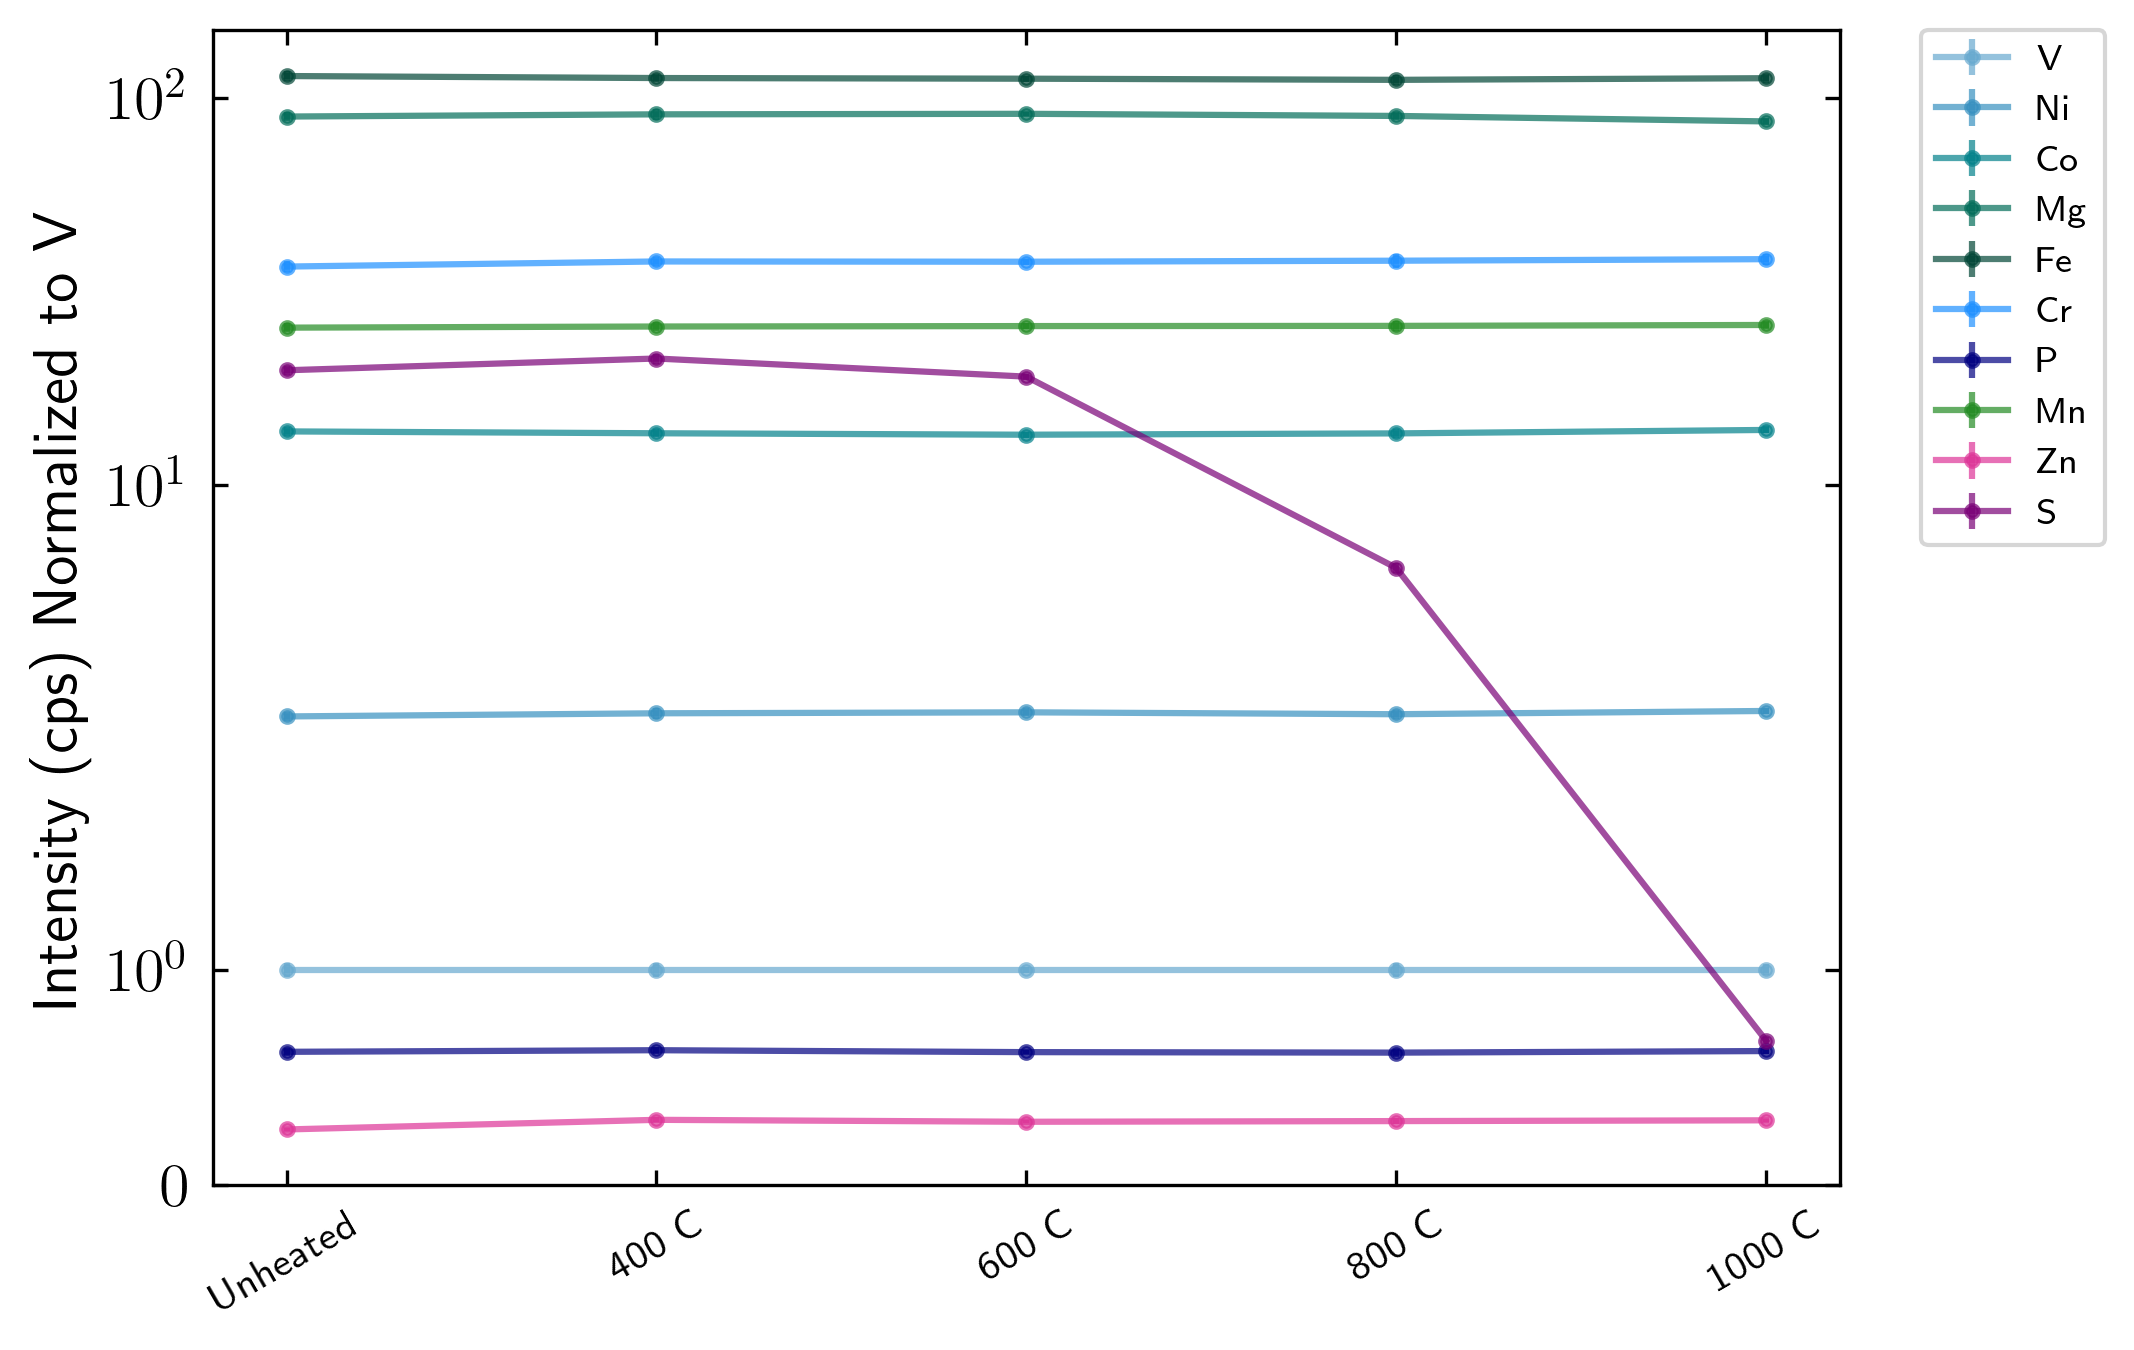

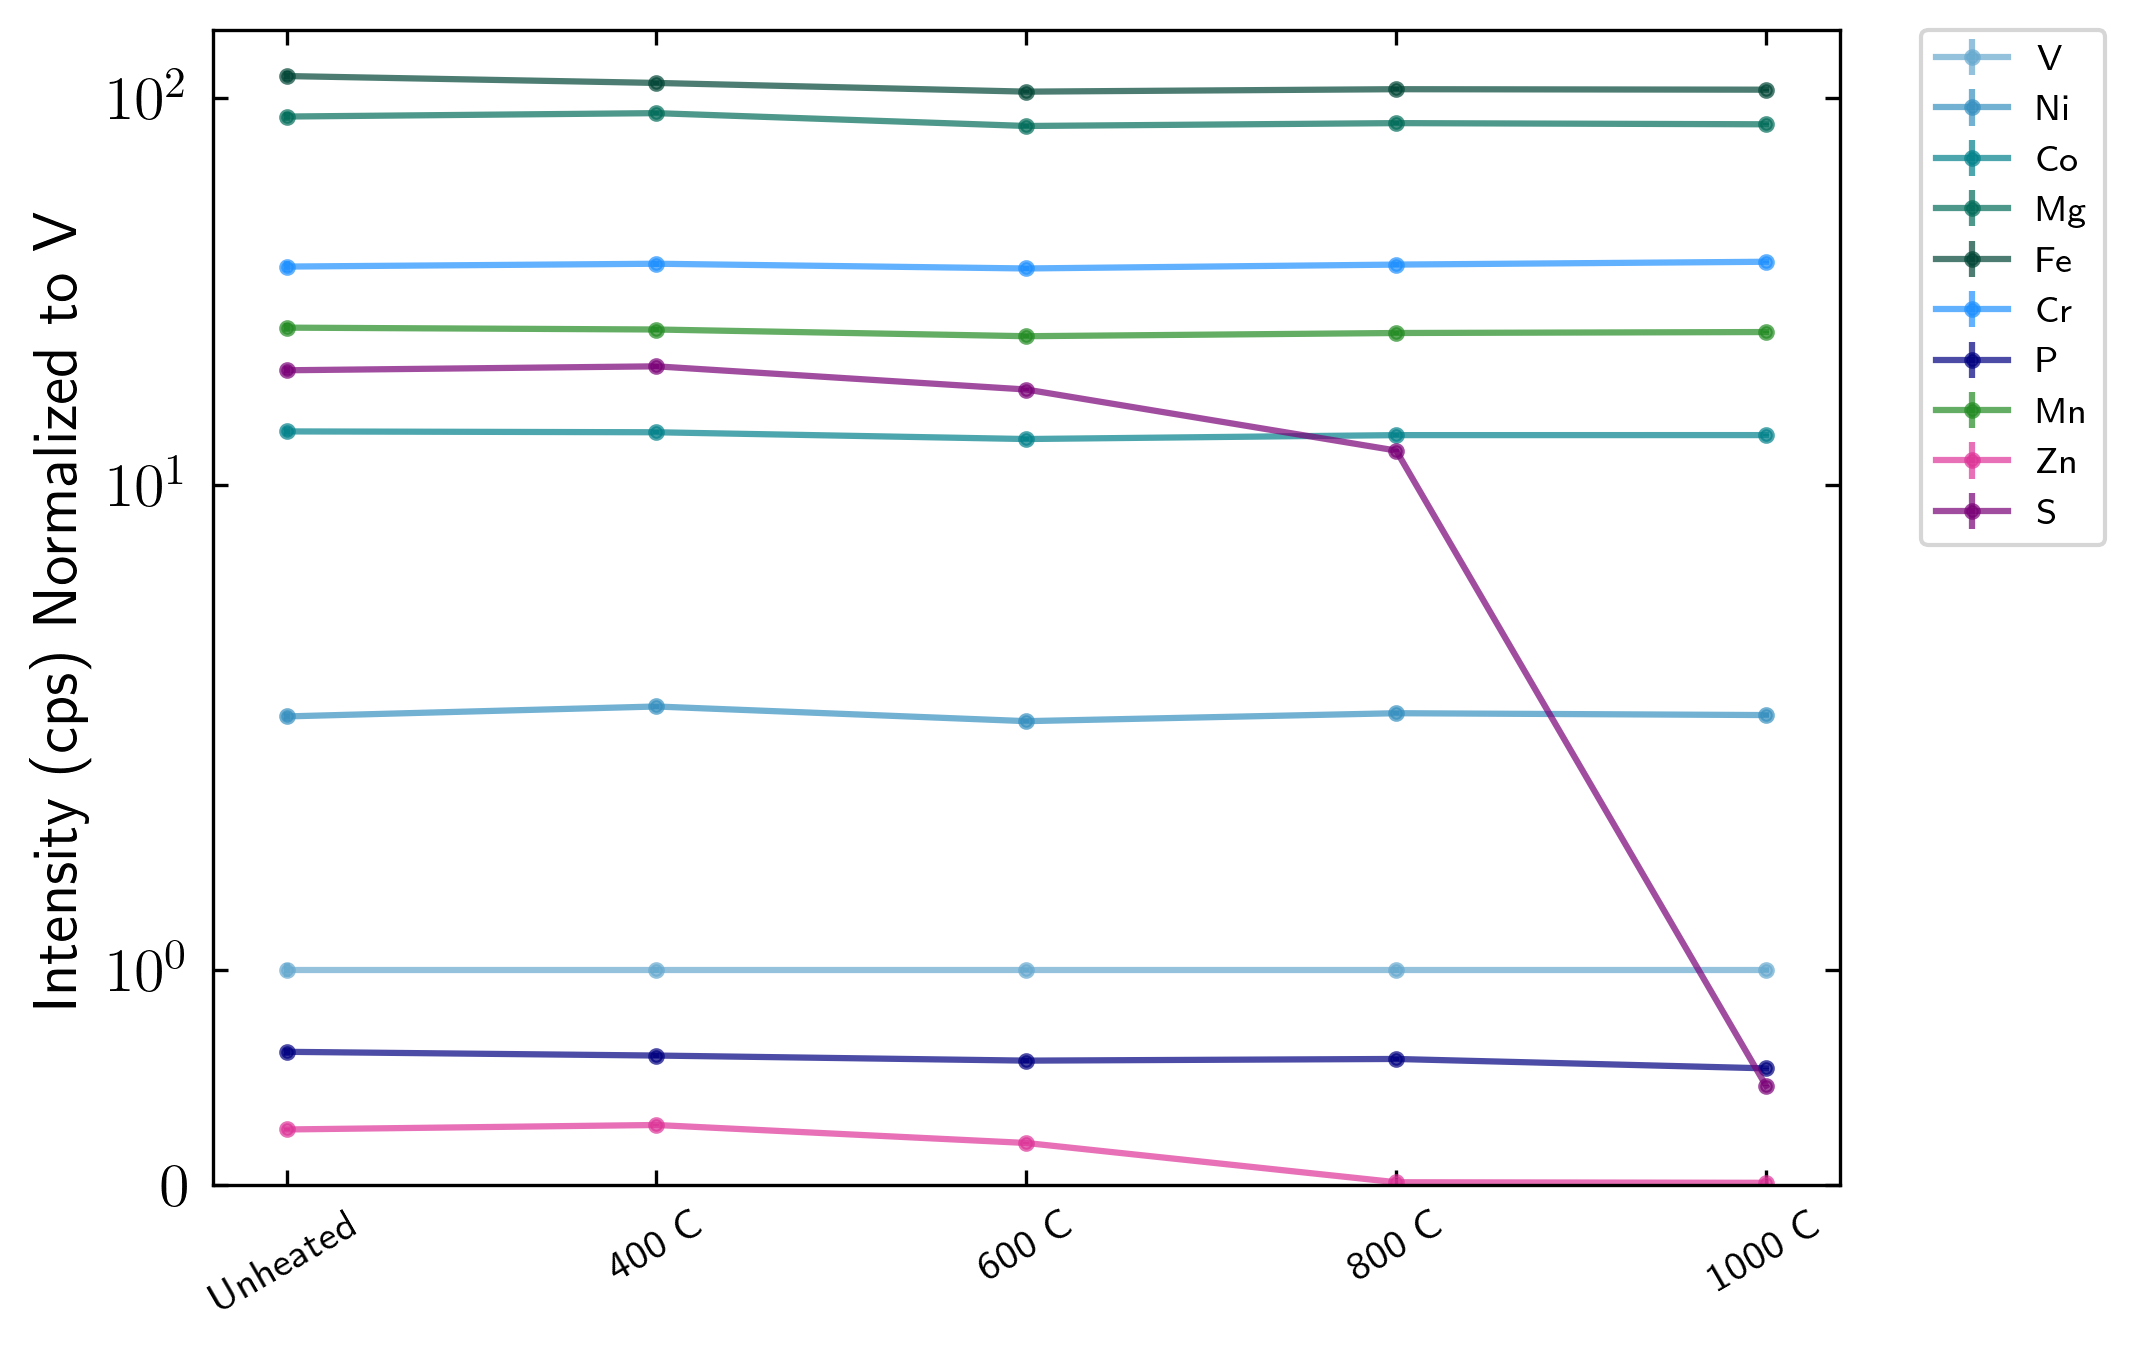

In [86]:
plot_results_raw_withunc(rawdat_normV_atm, atm_V_sigunc_df, '', 'RawDat_normV_unc_atm.jpg', 150)
plot_results_raw_withunc(rawdat_normV_vac, vac_V_sigunc_df, '', 'RawDat_normV_unc_vac.jpg', 150)


In [87]:
print(atm_V_sigunc_df)

           V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
UH    0.034676  0.074429  0.400001  2.502682  3.315223  1.163659  0.018660   
400   0.030613  0.081430  0.329159  2.809666  2.868086  0.968474  0.015770   
600   0.015643  0.062198  0.234664  1.246742  1.964870  0.665977  0.008683   
800   0.033188  0.065493  0.395112  2.341324  3.350004  1.508013  0.018982   
1000  0.025644  0.052134  0.289734  1.689255  2.966330  1.200220  0.015082   

          Mn55      Zn66       S32  
UH    0.679500  0.007937  0.540784  
400   0.686164  0.011377  0.627704  
600   0.435946  0.006073  0.324787  
800   0.782444  0.012161  0.192747  
1000  0.655866  0.007068  0.017326  


In [88]:
print(np.mean(np.mean(atm_sigunc_df*100)))

3.8756536224361233


/Users/maggiethompson/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [89]:
print(atm_sigunc_df*100)

           V51      Ni61      Co59      Mg26      Fe57      Cr52       P31  \
400   4.625525  4.410270  3.734032  4.229471  3.801998  4.192479  3.955017   
600   3.804080  3.912652  3.329162  3.165302  3.343247  3.737475  3.320825   
800   4.799823  3.966306  4.065647  3.837871  4.084081  5.261942  4.281779   
1000  4.312822  3.680615  3.609218  3.302521  3.861272  4.654487  3.875722   

          Mn55      Zn66       S32  
400   3.790412  5.642608  4.319526  
600   3.189499  4.228055  3.108632  
800   4.081124  5.888831  1.284605  
1000  3.725796  4.483104  0.128308  


In [90]:
print(rawdat_normV_atm)

           Na23       Mg26       Al27       P31        S32      Ca43  \
UH    15.496338  89.529137  87.400377  0.619142  19.767557  0.351941   
400    9.892469  90.710764  86.695276  0.626557  21.202195  0.341084   
600    9.926490  90.996408  85.812944  0.617671  19.034695  0.342639   
800    9.813436  89.859455  85.288905  0.615389   6.097089  0.332611   
1000   9.421750  86.973522  85.474003  0.622610   0.671705  0.335736   

          Ti47  V51       Cr52       Mn55        Fe57       Co59      Ni61  \
UH    0.753585  1.0  36.649052  25.479110  113.938954  13.737031  2.517623   
400   0.742091  1.0  37.781931  25.650983  112.594287  13.585951  2.565153   
600   0.731431  1.0  37.722987  25.717197  112.154767  13.469317  2.579918   
800   0.739795  1.0  37.951689  25.747699  111.392964  13.576050  2.550939   
1000  0.752990  1.0  38.301095  25.885965  112.476017  13.857720  2.600823   

          Zn66     In115    K39_HR  In115_HR  
UH    0.257762  0.669363  0.137271  0.153518  
400 

In [91]:
print(rawdat_normV_vac)

           Na23       Mg26       Al27       P31        S32      Ca43  \
UH    15.496338  89.529137  87.400377  0.619142  19.767557  0.351941   
400   11.684406  91.361271  80.275648  0.601795  20.237515  0.342517   
600   10.743161  84.636516  74.752890  0.578103  17.628715  0.328196   
800   10.500196  86.087107  76.259157  0.585873  12.257513  0.333115   
1000   2.676791  85.495020  77.271174  0.542135   0.461115  0.334363   

          Ti47  V51       Cr52       Mn55        Fe57       Co59      Ni61  \
UH    0.753585  1.0  36.649052  25.479110  113.938954  13.737031  2.517623   
400   0.740837  1.0  37.273432  25.198305  109.360464  13.668040  2.671089   
600   0.739808  1.0  36.240106  24.212161  103.831685  13.127067  2.447717   
800   0.744814  1.0  37.084377  24.678042  105.353864  13.436588  2.566384   
1000  0.766638  1.0  37.714971  24.819852  105.055189  13.439251  2.538216   

          Zn66     In115    K39_HR  In115_HR  
UH    0.257762  0.669363  0.137271  0.153518  
400 

In [92]:
raw_df_normV_vals = raw_df_norm.T
raw_df_normV_UHAvg = (raw_df_normV_vals.M_UH_1 + raw_df_normV_vals.M_UH_2)/2.0
print(raw_df_normV_vals.M_1000_2/raw_df_normV_UHAvg)
print('')
#print(raw_df_normV_vals.M_400_2/raw_df_normV_UHAvg)

Na23        0.603597
Mg26        0.957869
Al27        0.926488
P31         0.962723
S32         0.035101
Ca43        0.947828
Ti47        1.025171
V51         1.000000
Cr52        1.029083
Mn55        0.978550
Fe57        0.942130
Co59        0.984417
Ni61        1.000699
Zn66        1.072655
In115       1.355040
K39_HR      1.258568
In115_HR    1.152342
dtype: float64



In [93]:
print(reldiff(raw_df_normV_vals.M_1000_1/raw_df_normV_UHAvg, raw_df_normV_vals.M_1000_2/raw_df_normV_UHAvg)*100)

Na23         1.447739
Mg26         2.797115
Al27        10.526273
P31          8.527842
S32          6.595811
Ca43         1.284666
Ti47         5.196376
V51          0.000000
Cr52         3.060951
Mn55         7.366048
Fe57         9.123231
Co59         4.831343
Ni61         6.262622
Zn66        15.879227
In115        9.612733
K39_HR       7.605492
In115_HR    17.582682
dtype: float64


In [94]:
print(print(raw_df_normV_vals.M_800_3/raw_df_normV_UHAvg))
print(raw_df_normV_vals.M_1000_3/raw_df_normV_UHAvg)

Na23        0.677592
Mg26        0.961554
Al27        0.872527
P31         0.946265
S32         0.620082
Ca43        0.946510
Ti47        0.988360
V51         1.000000
Cr52        1.011878
Mn55        0.968560
Fe57        0.924652
Co59        0.978129
Ni61        1.019368
Zn66        0.047406
In115       1.667219
K39_HR      1.622771
In115_HR    1.348985
dtype: float64
None
Na23        0.172737
Mg26        0.954941
Al27        0.884106
P31         0.875623
S32         0.023327
Ca43        0.950056
Ti47        1.017321
V51         1.000000
Cr52        1.029084
Mn55        0.974126
Fe57        0.922030
Co59        0.978323
Ni61        1.008180
Zn66        0.037084
In115       1.532388
K39_HR      1.507359
In115_HR    1.233623
dtype: float64


In [95]:
print(rawdat_normVUH_vac)

          Na23      Mg26      Al27       P31       S32      Ca43      Ti47  \
400   0.754011  1.020464  0.918482  0.971982  1.023774  0.973222  0.983083   
600   0.693271  0.945352  0.855293  0.933717  0.891800  0.932533  0.981718   
800   0.677592  0.961554  0.872527  0.946265  0.620082  0.946510  0.988360   
1000  0.172737  0.954941  0.884106  0.875623  0.023327  0.950056  1.017321   

      V51      Cr52      Mn55      Fe57      Co59      Ni61      Zn66  \
400   1.0  1.017037  0.988979  0.959816  0.994978  1.060957  1.080868   
600   1.0  0.988842  0.950275  0.911292  0.955597  0.972234  0.755923   
800   1.0  1.011878  0.968560  0.924652  0.978129  1.019368  0.047406   
1000  1.0  1.029084  0.974126  0.922030  0.978323  1.008180  0.037084   

         In115    K39_HR  In115_HR  
400   2.559101  2.302881  2.144104  
600   1.262143  1.188888  1.048158  
800   1.667219  1.622771  1.348985  
1000  1.532388  1.507359  1.233623  
